## 决策树：可解释的分类器

### 1、树模型的概念

树是一种数据结构，它是由n(n>=1)个有限结点组成一个具有层次关系的集合。把它叫做“树”是因为它看起来像一棵倒挂的树，也就是说它是根朝上，而叶朝下的。下图就是一棵树。

- 根节点：没有父节点的节点，下图中的A就是根节点。
- 内部节点：除根节点和叶子节点以外的节点。
- 叶节点：没有子节点的节点，下图中所有#都是叶子节点。

![avatar](Tree.jpg)

### 2、决策树（Decision Tree）

#### 2.1 哺乳动物的例子

决策树是对每一个特征做一个划分，从划分中抽取规则，基于特征对实例进行分类的过程。这是一种基于 if-then-else 规则的有监督学习算法。

以下是一个哺乳动物的决策树分类器，根据下表中不同动物的不同特征，大家可以得出它们是否是哺乳动物吗？

![avatar](DTburu.jpg)

![avatar](Tableburu.jpg)

通过以上简单的一颗决策树，我们可以判断一种动物是否是哺乳动物。每一种动物都有两个特征属性，分别是体温和是否胎生。这两个特征各自构成了一个属性条件判断（图中椭圆形节点，也是这棵决策树的内部节点），叶子结点（图中矩形节点）是表示动物的类别（是否是哺乳动物）。例如对于猫，是恒温动物，所以符合第一个属性节点“体温”节点的左分支，并且猫是胎生动物，符合“胎生”节点的“是”分支，因此，最终判断得到猫是哺乳动物。

#### 2.2 如何构建一颗决策树

##### 2.2.1 属性划分

通过上面的例子，我们了解了一棵决策树是怎么对数据做分类，如果从数据出发，一棵决策树是怎么构造出来的呢？

一棵决策树由这几种节点构成：

- 根节点：树的最顶端节点，包含所有的样本数据，在上面哺乳动物的例子里，属性“体温”就是根节点。
- 内部节点：树中间的那些节点，上面例子中的属性“是否胎生”是内部节点。
- 叶子节点：树最底部的节点，就是决策的结果，上图中所有矩形的节点都是叶子节点（不再产生分支）

如何选择属性？

纯度的概念：让数据的类别尽可能一致，让目标变量的分歧最小。

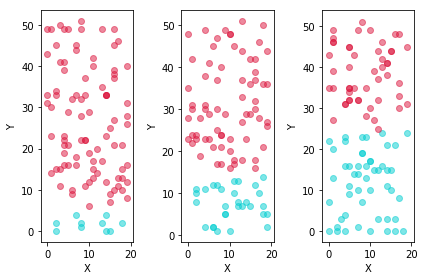

In [28]:
import numpy as np
import matplotlib.pyplot as plt

colors1 = '#00CED1' #点的颜色
colors2 = '#DC143C'
for i in range(3):
    plt.subplot(1,3,i+1)
    j = 2*i+1
    x1 = np.random.randint(0,20,size=j*10) 
    y1 = np.random.randint(0,j*5,size=j*10) 
    x2 = np.random.randint(0,20,size=100-j*10)
    y2 = np.random.randint(j*5,52,size=100-j*10)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.scatter(x1, y1, c=colors1, alpha=0.5)
    plt.scatter(x2, y2, c=colors2, alpha=0.5)
plt.tight_layout()
plt.show()

以上三个图中，分别有两个类别的数据，用红色（A）和蓝色（B）点标记。红色点和蓝色点的个数分别是：

| 标号 | 红色 | 蓝色|
| ---- | ---- | ----|
|图1| 90 | 10|
|图2| 70 | 30|
|图3| 50 | 50|

凭直觉感受，哪个图的纯度较高？

以上三个图中纯度：图1>图2>图3，也可以用不确定性来对纯度进行描述，图3的不确定性是最高的，因为两种类别的点各占50%。此时，数据混合均匀，纯度最低，所包含的信息熵也最大。信息熵是一种对不确定性的度量方式。熵越大，变量的不确定性越大。

用信息熵来选择属性特征：

如果找到了一个特征，对数据集划分所获得的“纯度提升”越大，选择这个属性作为当前的划分属性。

以下两个图中，对于分别选择特征X和特征Y来作为当前的划分属性，哪一种划分可以得到更好的“纯度提升”？

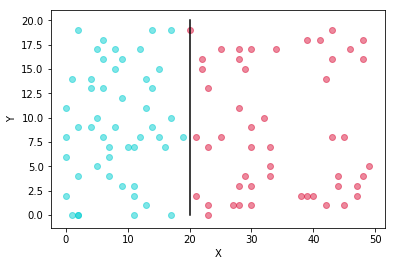

In [35]:
x1 = np.random.randint(0,20,size=50) 
y1 = np.random.randint(0,20,size=50) 
x2 = np.random.randint(20,50,size=50)
y2 = np.random.randint(0,20,size=50)
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x1, y1, c=colors1, alpha=0.5)
plt.scatter(x2, y2, c=colors2, alpha=0.5)
plt.plot([20,20],[0,20],c='black')
plt.show()

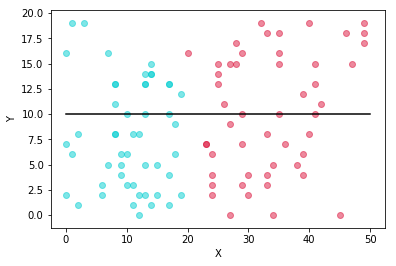

In [36]:
x1 = np.random.randint(0,20,size=50) 
y1 = np.random.randint(0,20,size=50) 
x2 = np.random.randint(20,50,size=50)
y2 = np.random.randint(0,20,size=50)
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x1, y1, c=colors1, alpha=0.5)
plt.scatter(x2, y2, c=colors2, alpha=0.5)
plt.plot([0,50],[10,10],c='black')
plt.show()

对于下图的两种划分，哪种划分可以得到更好的“纯度提升”？

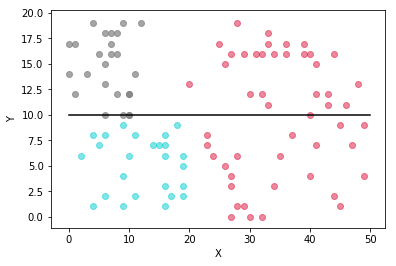

In [43]:
colors3="#808080"
x1 = np.random.randint(0,20,size=25) 
y1 = np.random.randint(0,10,size=25) 
x2 = np.random.randint(20,50,size=50)
y2 = np.random.randint(0,20,size=50)
x3 = np.random.randint(0,20,size=25)
y3 = np.random.randint(10,20,size=25)
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x1, y1, c=colors1, alpha=0.5)
plt.scatter(x2, y2, c=colors2, alpha=0.5)
plt.scatter(x3, y3, c=colors3, alpha=0.7)
plt.plot([0,50],[10,10],c='black')
plt.show()

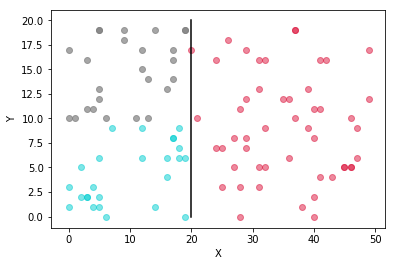

In [44]:
x1 = np.random.randint(0,20,size=25) 
y1 = np.random.randint(0,10,size=25) 
x2 = np.random.randint(20,50,size=50)
y2 = np.random.randint(0,20,size=50)
x3 = np.random.randint(0,20,size=25)
y3 = np.random.randint(10,20,size=25)
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x1, y1, c=colors1, alpha=0.5)
plt.scatter(x2, y2, c=colors2, alpha=0.5)
plt.scatter(x3, y3, c=colors3, alpha=0.7)
plt.plot([20,20],[0,20],c='black')
plt.show()

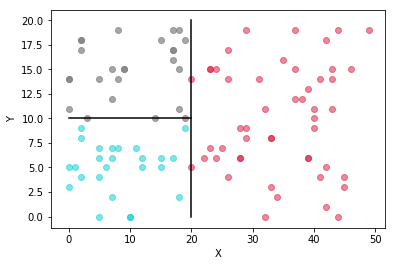

In [50]:
x1 = np.random.randint(0,20,size=25) 
y1 = np.random.randint(0,10,size=25) 
x2 = np.random.randint(20,50,size=50)
y2 = np.random.randint(0,20,size=50)
x3 = np.random.randint(0,20,size=25)
y3 = np.random.randint(10,20,size=25)
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x1, y1, c=colors1, alpha=0.5)
plt.scatter(x2, y2, c=colors2, alpha=0.5)
plt.scatter(x3, y3, c=colors3, alpha=0.7)
plt.plot([20,20],[0,20],c='black')
plt.plot([0,20],[10,10],c='black')
plt.show()

根据上图，如何画出决策树？
![avatar](DTpoint.jpg)

##### 2.2.2 何时停止

1）当前集合中只有一个类别的数据时

2）当前集合为空

3）没有可选择的特征

4）决策树达到一定高度

##### 2.2.3 剪枝

预剪枝：在决策树构造时就进行剪枝。方法是，在构造的过程中对节点进行评估，如果对某个节点进行划分，在验证集中不能带来准确性的提升，那么对这个节点进行划分就没有意义，这时就会把当前节点作为叶节点，不对其进行划分。

后剪枝：在生成决策树之后再进行剪枝。通常会从决策树的叶节点开始，逐层向上对每个节点进行评估。如果剪掉这个节点子树，与保留该节点子树在分类准确性上差别不大，或者剪掉该节点子树，能在验证集中带来准确性的提升，那么就可以把该节点子树进行剪枝。方法是：用这个节点子树的叶子节点来替代该节点，类标记为这个节点子树中最频繁的那个类。

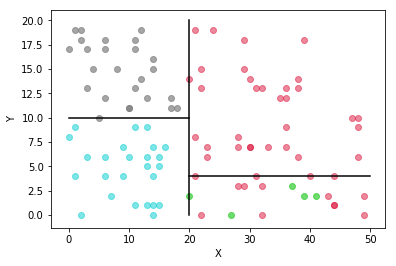

In [59]:
colors4="#32CD32"
x1 = np.random.randint(0,20,size=25) 
y1 = np.random.randint(0,10,size=25) 
x2 = np.random.randint(20,50,size=45)
y2 = np.random.randint(0,20,size=45)
x3 = np.random.randint(0,20,size=25)
y3 = np.random.randint(10,20,size=25)
x4 = np.random.randint(20,50,size=5)
y4 = np.random.randint(0,4,size=5)
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x1, y1, c=colors1, alpha=0.5)
plt.scatter(x2, y2, c=colors2, alpha=0.5)
plt.scatter(x3, y3, c=colors3, alpha=0.7)
plt.scatter(x4, y4, c=colors4, alpha=0.7)
plt.plot([20,20],[0,20],c='black')
plt.plot([0,20],[10,10],c='black')
plt.plot([20,50],[4,4],c='black')
plt.show()

对于红色与绿色标记点的分类是否有必要？

参考链接：

[1] https://www.cnblogs.com/molieren/articles/10664954.html

[2] https://blog.csdn.net/u012328159/article/details/70184415

[base64Tree]:b'/9j/4AAQSkZJRgABAQEASABIAAD/2wBDAAEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQICAQECAQEBAgICAgICAgICAQICAgICAgICAgL/2wBDAQEBAQEBAQEBAQECAQEBAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgL/wAARCAGQAfQDAREAAhEBAxEB/8QAHwABAAAGAwEBAAAAAAAAAAAAAAMEBwgJCgIFBgEL/8QASxAAAQMDAwIEBAMFBQYFAgUFAgEDBAAFBgcREgghCRMiMRQyQVEKYXEVFiNCgSRSkaGxFzNiwdHwJUOC4fFykhgZJjRTNTZEwtL/xAAbAQEAAgMBAQAAAAAAAAAAAAAABQYCAwQBB//EAEgRAAEDAgMEBgYHBwMEAgIDAAIAAQMEEQUSISIxMkEGE0JRUmFicXKBkfAUI4KSobHBM6KywtHS4QcV8SRD4vIWUyU0RFSz/9oADAMBAAIRAxEAPwDf4oiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJRFLTDQIzxqYNoIKSuOIqg3t7OEKJ6kRe+312oxZdq+5eOOZnHvWOLxFfEr6WfDO0YHWLqWzHyJVzcat+H6aY78BPzrUa8ihmwmPY89IE2YYK1zkzT2YjNj3PnxEvWISZ9NPx/wAo4szOO5akB+M749/iu3zJ43hwdOFu6eenFt5m0yNUL7ZhuM6zRjMXWLzcdS8hBtuNIdZ4kTNqgS0Bdw85R5Vsajkl2XZ3Yvdm5+taZKmOO7uWZ/RUCb4bf4lu8sOX66eKpEj5G4fxiWeFrPeo1tiR3k5tKsqNYWWoJ7rsrQx14IPfepalwOcoMwll/FchYtEJ5HF7W8l1L3VZ+KB8La2lkGpdvsXW5oVjToXbMsjCCxqU6NqYLzJTLeW22LEu1qJWvT5zcKYIou5tqqIVc0+GTQs1xYn9G/x12fyXRHXwzPbNldu9lsV+E54+3Sd4oERjAYkgtA+p+0xzPINBM3nxUkZCTQitwl6d3ySrI5BHakkguNmDM1oiETjki8xjDpnfk7uO8dq7LqGRri92sX3fwWdhRZDcVRFBG1YlyOarKYU/WDZ7Iuw907+1eMFmZmbZ/VdZyOeZ2ez8Qj2fWu6Z38sd9t+I9037pt2XdfdNqyXMVrvZRaLFKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoihOnwFVVVEdvn25cV3RETjt3ois469eszTjoF6U9XeqXVp5pcd02x1+TbLE04nxuXZdcCSBieJQUXdfOm3d+GDhIiq0wTr3EhbUaWzaWvdL5dVo/eGh0GaqeNf1D5N4tvijzZWQaP3PIrjF0F0TKVN/YuUyMcuBnbsZgW1dktultpRtGuKCiXSTzN5OJ+rvoqMjdncVw1NZGDOAvtP4Vub2614/iuO2nFsSsFlxHGLEEdLFjWOW6PaLPZAZbbbZYgQYQADIiCCO3f5au1FTC7Cz9yrk5kbuzbrLopsll2ZykPc3H3lkOIRK4696V81Uj7be6DstWKMYoKcYr63UPNFMZ3tm07l5Qps1kAlpHddQwlg/by2+ImR3HUaZFI5bgMcG1QjRRVCESFa4p6eORnEdGW6OY4mZi3LWf8AGN8Hi1ajwZnWz0RQoWlHV9o2v+0Sfb9L2isUDVKLjpLe5ORWeLb1Fu2ZxEFo1JG0/thCrTqEJVXqzBikE5o/q5Y2zMXit2S+dPwUrR4wASRwm+aMnYezo77iFZr/AABvF4Z8Trphm2/UlbfaOqzQJLZiWt1jITYdyOG2LcKzaiRoxtoQFPciyGpDG6o3PZdDdd0qpnBssbNlDM7O3gLu9nnmVr63aylo+/8A9fn/ADsGgu4ivtuiLttt2X27fSuF3Zrv3LJnZ9WXKvBLNfuZepWSJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIpWQDiqBNL613aUSVfK4GqcjIU91Tbt/9VEWjv8Ai2NU8o1X1p8O/wANvFnJLll1j1Ag6g5u1b5JhKko/k0TCLXCmttnubbNun3WcHJF4rHE077bb6WJp6mCLLmYiH4c/wAFoqpXhpppG4hF7evs/vLZL020xxbQDS3TzQfAIFus2N6T4rYsIx9mzxm44LAs8JlubMcFU4rIkKBeae3IzIjJSOr9S0DG7O1ht7XzoqSdSQXctoi2l6WTI850GdyZ+IYR9hXSReaK4oeR27/FoqDxb+YuXpqYGBoByubEy3QVISuzMDrE454ommTvigt+G6y7binHpY9kMfMgASfDU50EkP6YKqqhLe/hOLg7eltRIC9VRFXXOFb9HECzZBfyUsMQvBntzy7/AJ+fxyJPyGyd3R2eDsb+A4+8PkT2VBCBxhQc2RBIvft8tTdDHJLZ72ElC1YNtsHcvLuTzt+7jLbTLgOm8MaKHKEiHuCkIO7qTrgkXmCvoLv6alipxkhOG7XkEmzevmq9kMJoZHLMImJPp4VqV9ObCeF/+JRHDsSjyMd0c6vLdKKy45Gkm1a5L2ojL8yyXB9hfS+MHM411kMgm4iUoxEfavnGJYc+G1p05EMn0iPMVm2ScCt+IvrbtL6HTVLVVOJsOXqzy+oXbT95fogYlfv21biRxsm5tvdODO5kKq5JjkTbr47L2AzHkiL7cuNVqspniISZ2yTcPl5e5Swswhd31Zl6sD5cv+Fdv+/yqNiJnKVvA9kE2O9uSiVvWaURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiKC4QCYkRbekk+myIqpupL9E37f1oi0NPHQAMY/EYeGllGVi47i9zsWOpbmi2APNjy7rayRgjXYnFu70Xt/eUfrUlg7M+JUbPuzfo65a0c1LM3e36stqG8yXxnyRXkYA3s8O6rNbGVIQHXXR7/Jv6vqnGvqNPGLC7N95Uisiyvo9n8KobrzrLjWg+kmb6s36c2+1iUd1u3RW58ezyL9mBtJDsEKw/HIXxeQLJksk2wibOfDlXNVuTM9rrRTSdWd7rVH8XPp8100q0R6W+vq1aXYpiusXSrqLbM81b1hx7NLfcNQtbRz26xL6zkN1jwWW1YCNbQZhyU9SsetF9JcarsgGZvVG5S9S+bKLdlhykOnFs5i9rZU/T1OYmh0FpmIM3pPqP42H1ea2cdAOoDDOqPQzTTqFwSfGn2XVXDcfymUDEsZLthusiA0lysVzHZFj3BqUjnmASIqKtXagAWiF2bSzExKIqZHzEL7JC+Um9L5svcy5KrIQGCE39ubQe6Kqd9tvqldpnle/hUbkdyC3af+i1VPEwUbj+IG8K2DZCWTeII6PTrmSEriwrf++9yknDkA3uratR488l3/AJZA18+6QTDU4jTZdoxzu7tyC1vxVvw8eop6knfZuGnpLfV0/muQ8wvEBHFVmfcLg+rZqvIN5T6gip9F4f5VH4jSuNCxOPC11NRytK7C26yuAaTYnF+5Iu327e1Uune8lTr2vn9FuAMuZ+ZKNXUs0oiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlEUtIFCRAVFVHf4W6fyrvzEl/LcaItM38Xt0w5k5pl0p+Ibppap0/KOkvUaBa8wmW4XPMtOHXa9Q7/ZrrIcZXkENvMbbDadNU4tjcPV2Iq30spQVEU4u/1ZM+ndfa/d09SxIWICF2axLJ30bdXGJdafTBpR1K4RMjqWa46z+8BxzR6XjeYW+KELLLTeIw7+VMcltvIy0Sb+Xxd4/zV9Fw6uefKzPmb171UMUDq9MtnFVVz3CcC1Ossa06m4Lac+s0GU1JYt2WxR85y5CaORL3Gajv7KbC8VA1TkiBVkelacWvs5m4VXmMt4iukyHTTTfK7BFw3MMEx/LMRtUcWRtN8t4yrKyzxRBV+M++oz2OPERAkXbjUe1I0UwiLXzOsymNiy3e9l0mI4FgmmdsdxvTnC7Pp9jUl0nhsFghBCtjiqqqs+IyyfGMx37giJvVghiYIma3JY5szu19V3lzu1ssVpuWSZLdYljxbGLZPvV3vsnYW4lotcdyZcJbh/RpthklJVXZErjqytFIVuEXW2DWeJme20y1aPCYG8eKF45et/Xm7Zn5Gg3TtDudowSRc2yetjN2fZPH8FYgvEvljI5pMuRAPqFqc0a8d6+Ydb9JrTku5NHsD57WZ/hoytlQPUU4RXa8xZy8h5Le40/RXsujkDnmOIDhPub78nVIldLdU+rvLb8kqexYGDCjN20yrZh0mYgFn5krn21TkY/VFTf/AA/+K+YUv7Wr9v8Aqp52swv3qLXYsUoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIuC8t+3t/l+e9aRzdaW/KvWtzUNeS7dy3Tum3v+vt3robIzXJZs4W3W9apZrbpLpzrrpFqLo1q5jsbK9NdTsUu+G5nj8poXRuNlvkVyFJFpVbX4eYCui6w8icmH2W3gUTBCrQcoasxZfZXl7u2yz5X9y/OxyO09Wv4X3q7zDFL1iWXa5eGPrjlLdzx2/NpMkQrZCektpBlRbxHFY+O6n26I+MV9h9Wm7uzHFxrlzWpjDcQOjMHMnIPy+yo6uowqxew5Xb532Wzv039YXTb1kYxAzXpt1cxjP0u7CyCs8WXGtmW49IAEckWK44rc3QlpJaJVB5W2lbMhJQIgUVr6dhnSujiCN5Yo5G88ypVb0Trqh36iplhF/BZXAvsy3BCOcSS18SR/FlJbeF2M+CqiRmYRbIyBKicV+vKp4sTo8RBqyCnjjC1tjhuKiGwapwwvolVUSzTcdzsT2fhH2V4TUnUDB9HsVuWZ6sZtjOluPWmA7Mn3fM7xbLbHhxIqea46sOVJF2ePkCRJHjibzn8oFULVYmQDYXy/adTVJh/WMLOTs9lqidcfiPa1eLFqpF8NvwpsUyS9YLmVxjwNVtbIDdzgBldkkL5d3krJlg3+42mbbCvE+r5tPTlbKMAnzASqdXjslQT0sMr/X2EpWLZG5bTD3vbd61ZqfCo42aY42Io2vls3F5rbY8N/oB0l8NbpisPT9pc8sq9yRjZTq7mk9pJP79ajORGY9wC3vKKKMRpG1bZT2bbbBEQdq3QYcMLOIhlC+UbcTD4izdrN890dW9bOeZie5fu+pZUdJbQJLMvqtKy0G8WKK+tduym4Jl8xcl96hce60XCm+lHYm4c2yt2FU8wvnZ3Jhvoq6x20ASTmTiqW6kSqpLv3Tuv6/5VUKamKm63Mbn1hZrurO7OzMzqYrqWKURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlEUJfUe2/5f4J/1r3VrOs2dxYfN1xM/KT2VVXbbYVJEX89u+29aiZ5biOi1mbC2Z9GZSz6NvB5b2yg7tyTugr6t9j7psK9t0XsqLWmSjMhJ49ox7N1rCds4i9tpUe1z0o0Y1m0nzDTLqCxDDcy0hya2uQ8qsmctW93G3oagQtvos3ZLdKZXiTEhsm3WTFDbND710UUE7vkcHKbwjtfPzqvKieKEGkuzB3vp8/BaBnWb4FHSfi2qN9v3hadVusuOarzbwr9qwTA2L3edPsWbWSvO2xdSMbMJrYtryHZ6QYDx+3JK+qYF0UerBpqhpMNezbjAmLzICHIPZ0uXuJUqv6XPRGwgIVAM+vG33S/Vx+yrmtO/Cu8XCy6Vv4jfeo/VrJLrlVsiHNyhNQbEN+xV+MP9nG1SbhJInWSPjyR9VeRB7rvVwGLCsPhKkGrzNGW92C5FbXZHZt7Kq8mL1WKVH014G6vhy5iy7Pr2vUrCoPgj5/mGsLrHi09ZWvNsxF68R3LFLtMK8ZdZbgkYkGPGvV/nk9a8fdODyE5DAgQcl2WojEMEhrBIo5zqr8IZ+rAvJyAcxN2tc2Z1OU+PyQMIRUUdO1toszmV+9ifhH0dbd63GehjpT6NukvSiTh3Q9iGEWjDb01CLIcqxiczleTZxMiNCCXbLMxcM3ttk5/BofkNGXMQRahJMAjgieUmaIhZ3YdAHM24B35ibLxaOXorubpGZM4uzFmaxb/AJ+yr7cZxS65A5HiR4z0S1w5PnOyZJNknJ3/AHyw+f8AveSe6+9Viprqmna5Nq7eIl3Uko1BWZXRWy2QbPb41ut7SMRYzfBsE337KqkakvuqkpKtVGpxIjkeWQsxF4rq1QAMYswjZl2TSbIXffda8hqWqMztuFbZOSi1uWtKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJRFwFwTVRTdVT3RUr2z2vyWoJgMiAX2hXxHRX23/AMK9yF3LocCbkuSkiLsu9YrS8gs9n3r6qoibrWJGINcnsyzbXdqoZvNhtyLbf8lrlKugHfm+66zGMi3KEjo7qo8i9SKqCiqW3fdVTbsnvXWBNPCEgPsm2l9F4ewFybUe7VUJ1i6l9DND4Dk/U7U3G8VJoHCbtzlxak3+U62qco0KxRfMkSnVVdtkb99kqcwvAcVryAKWj6wT7R7Ae1nK34KArsbw2m/azkJNyEXd/VsqycurvqX1/ckQ+j7pwuMDG5zvlxdZ9fEk4hjEplCVDu9nxh1Ul3iOjfJWxFU5Eo9tqtEOA4Phpj/8oxNxaHLmipnEjbNyyttP5vmbRQ5Yu+IDJDgkLvVSMVnkBxC7b3cn0bKPDs8S7O3eH5mOqVxiZF1ka+5trfIB8n103xuc9hGkTDRetIT1gt6hIuTIuFtubyKSD/xLUbW9IMNjzRYHQfQYNdo2YjfuJrbn9ZP3LODB8WNs2IyjOZM3AZWa3J3P8xElfjgejemumFnCwae4HimG2gWkZSHj1niQVUBAQFXXxa5vnxHuRkRKvclIqrNXiuJy5HCoKUo+Rk7D8B0U9HhFE8ZjJCIkXcLP+8WYlAuOk9mlONyIO9tkIRG+60RGklC39Btr6BRPuib110nSHFbZqpx6zh0cnsP3lujwnC4o+rEC3l2R5+5eRvOg8O/W+ZaLy7Zr9Zp6Kki1ZBaG7tCdAk4kyceQhD5fFfdEQql4ulU8dmKLN55n+fiuGowOmkH6tyEvOzq0XK/DA0vizHMt0NzPOenbPQQpQSdM7w9Gw6XcA3cZO4YbJFyO/EV0R8xsEFTFVFK7oOm5jKzVdINRRtvbdJl7W1tC7/BRVT0bOQTaGTLL2eHL/X8F1rOp/XZ0y+TG1e0ns/U1pnEEWnNQdGiS1Z5bWW0RXJt6wuTyK4ehd1SPx3X08q6KqLov0gOM8EqpKGvnt9VM2xfwj5/ab1LRh9JieFhkr4QliF31B9r7w7XudXMaMdbvTdrSQ2nG86ax3LGXVhzMC1AiPYTmsGam6nDesV7UDeeFf/4icT29VQGL9C8coLTVFH10RM754SGVhYfHa7j4tW/op+DG8OMcnXuLj4hdr+e634q7IZLSihhzMDVEEgDkKoqboSEm6KOy++9VoKfqrs29S1NKNWxlEWkffp93v9yi+cO6ogmu23dETiu67bIqr3VPrWTi7b2Wxxdt7L6rwJ9V/om/+lYsTPudaSmAd91DaltPKqApLsqovIVRN0rTFURyuTBfZ8lhFUxSvYL3fyXMnmxXZVXf9FX/AArqaMna9tF2NEbtdmURCQvb/v8AOtd2va+qwdnZ7OuVerxKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoigCQpz2337/49/wA/ySvJzeOJ5H3CyxGBo3zM3GuKEm6e6KvdOypUPHikkkgxuPF6K6Xa7WvZcnOKoqoqIqd1VVRET6//AHd6kZwmliForMbPdlzMUcbuZvlGy664XW22eBIuN4uEG126K2Tr8+4y40OCw0KKZOPSpTgA0CCJKqqSJslbqeCS7Dlcjfsjr8+9apagGBzZ8rM297Wf1Pm19yx/aieIro5bL87gujFtyjqN1OFSCPi+lFlk3y2RZKbiI3nJSEYluj7/ADOCbuyeqrnh3ReapZ5K2QMPpNrORkOcbNvy3t5b1Vq3F5wJxp26+UX8BZCH+JU+PEvEO6nY4Jm+WY10b6bXLZxzGcCNcw1efgL6DiTsmfFpixzDDkq+UJcPMTspDXQ59GcIN/o4ni1XC7bejRE/iHwsPqJcmfGq0bTuFLEWbZymxey46mXlf7yrppB0BdNuk1zYyxnDJOoOobQ+a7qJqncX8wzKTKFNnZQS7kisxlM1UlQGU90qKrcfr53dhm+jxPm2Y+HK/J+0/k45VM0GDQO7lIDyMWXMR783ew7m+1dXmRV8pyPHbaEAbFRFrgLSMgIqiC2LQCCCnsiIidqqclXKdS8dtg9+y/8AE7urO1FBFFnF3vHw2y5dfR5e7cu6roWpKIlESiL4SbiSbqm6Km6Lsv8ARaO19HRdWjIqiiJEygHzLyXF3cVURFR0VTuO+26d68OpjoxfOGYXbw3t5stVRAUjOwm4t+frVuWs3Sb0/a9gj2pumtlvl4YZdC25NAZW1ZdaVc24ybTe7YrTrEkSXcSNTVNvr8tSmG9IqsBEKWrIY7FsHfI76s92In93xUNJhUZHeSNr34m4vs9n91Wqr01dXnT2iyemXqDc1HxKOSLB0h6ggduTUKIG5LAtubRf7QyvH0oTjfZePq2qwUdbgNa1QOM0ZjObjaSB2t5+bfB9N6jMQHEMNeAsPkEoyYiIT4tG8PD/AOS7CyeIbCwW6xMY6xtHsv6arvLklEtuU3FmXk2md4kgnE5ETKLbGX9nxnD5eV54DvyEVLfvXPPgQkLyYVXDWRk5aO4sVm5ek/2V00eJyuTfTYHp5LDuEuLvcSf8lkBw/OMOz6yMZBgeTWHLbDMaB6NcsauUS4tkDiIoIfkOl5LqIvcT2JPqKVV6nDpAMhqIzgMvFmEfcXO6ssNRAbMQm0he78W4l6xOSovJQ7JsvHZFX7ou319q0SVUEDaRn91dAnT3dgJviyjekW1XdPyVdt+3q+v9K0sRVl8txD4OvDciuwcShRt/Nc3VPl7JvuqJv9t+1ew0EVNeUHJzk0fMV2XLHHUCRHLlyFw5VPV0rclESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURdYrqAbiijjzrfvHFsUNEJe6oZLttt+aVrhlirHkid8oxvYr7vwXk8pALOIuXk291QrWHqV0O0Ktzlx1V1LxjF99kYtLlwal5NLdLsDECwQCclSHSNNh4tKil6amsM6LVlcYFQ4fITjtZyZxAWftZnbh77XUDPigBZ5ZW9kcpH93cP2iVmJdX3Uf1CI5A6Punm5MYs68UM9Ztd/iMMscZzbis214u+Pxt44iSGCEHlmm3Lbfap+LC8LwyYTxuu6zQvqoebt2b8TfguCulrMSpmhw2PKYmJZj2tn+HX8lHg+HzkOqs9i+9ZOvub66uKTEt7TWxvPYJo/BmNuIYst2O1Pit1joicFR7bmnze9aanG6WITjwmjGjiOzMZ2eV8r9ofP55rTS4RVAQ/S5fpBi+otfKPvf8AlZZA8B0y030nsjGN6bYbjeC2iOKCEHHrQxEaQUTZBNxttDe/JSItqqtdiNTM5PPMUxW2e74Nsq100UEIizCw3bxfq+0qgjzUUXzBPb6qicl907px7fWuIXmMRkHQS13cl2ZoczCzt8VyEi39Sf57fX233+9ehK93Y3ssnBrPZtV9TlyTuPFfbZfUvb6Lv2rpuDs9n1b59S4nepaUWJ26v1KYrFdCURKIlEXxV2RV+yKv+FF47sLO/coKqBjunt7fZPunsvb61yVlG9SwjdnSCRpNR3OjfFF7bf0Xfv8An3/73rVSUD0hO92dvetp3tqy4knf6bKq7799/ttv71uqZKmM4mh4S36LS3VGxM+uVdJkmO2HKbPLseS2a0ZBZZoI1OtV8gxbnbpbaqm4PxJjZA4nLunbsq+mu2mqDjMZGN45G3EL5S/ouSqg6yMhEWkF+yWv/l8H9yx55b4c+mbd5uGadO2a5r0zZrMdM3ntNrtLjYlNlAXNSnYXIdSI+iubqXFBRUJU41c6Lpi8ANTYpDFiVMTDo+RisP4O/wAFVKrAqiYnmpT6kx4uNx/u+8vGO6u9fnTQQua1aXWHqh02jOK1Iz7RJgLPqLAjAqC1LumCPqDEgEZ4k4TJqRFvUoVH0H6QMIYBXnhlaLPmjnMTAi3772G2vCV7clzsOM0h5quMZodnaEcrt3bQ8/aF/ZVymivXJ02a4yv3fx/PWrBmwqiTtO9QI7+I5hbZCLx8l2BePLR812XijBuc/pVcxbon0gw1jKOkeZmFnCaMSkie/qZ32eansOxujEhH6S8Zl2DtdvSc934MruISf2hwk2Xk0ioqKuypzTuKku5Cu/v7VRaWTF3qZosQISp4x2coZdq/i7WishV0NVGAQ3s212W8t36rt6k1ilESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURfF9l2+y0Xj3s9t6lwJxEVTcEvyRET7fVK2Ew9kHXNBHWX+tkYtfDZc1MlTt2Xb8lT9fauU5wiexNddJhJlfKTXZSrz7oKg8tkX+YUFePb7L771i9XGztkpynZ9+TXL61oCZoCf6U7Exbuz/AJUlNvMK2Q5Nxuk+FbLdAaV6bcLjLjxYUdgU9T8qTIMQjMovuRKifpXdHCUzswwk5nwjYr+5apK+nZjcSYWF7XzDZvXzVhOo3iPaPWXI5On+jVryvqS1Ma3aHGtI7S9fLJFloqijV3zBlo4NsRDT1Kbi7VbaHoZXVcLz1dRDhMD7jnPLv3Xto3xzeioioxsQJmhJ5i9Ftn+5/wB1U4/dHxDepZgGc6y3H+jfTuc6qS8awP4XL9WbhbnvWgFk7qHEtDhNrxcRtUIVUq6cvQXBqZ48NoZcSxEXIjlM7R9Y3ay7iAivbnZczljVQbfSJ+qgl1ZhDsl7P6qvmjnQF01aSXH96Bw53UTP3REpmoGqs5/OMlffEkMn453knWbYnmpyEY7YcFL0lUbiHTXHammGk/3D6NSg7ZQhsFrdx8f4s3qUjS4RQu+eWmeQ35n/AE/ySvOCDHRRHygVsETyg4pxZQewICJsgoiKm32Squ1W8zvYrG+r+J/MlLQ0sFI/WU4vGdnHR33eFm5CptWWy25ChIPshd03+i7L9a8d3fV1vd3fevqtNrvuKer3/OvFoKCIr3HeuIR2m13Ee/5qq/6rWbmTsw3szLAKSCMswhtKIQCXzJv/AFX/AK1oKIDe7jqupidtzr4jYJ7J/mv/AFr0YxDhay9cife651msUoiURKIipuip902ovHZnZ2fc64I2CJsg9vtuv/Wssxd+5YxgMXA2VfUAU9k2/RVT/nXjk773Wxyd9HdFAVXkqd/vuv8A1/OvWIm0utJQxk+Zx1XxWwJOJCij27L6k7Luirv9d61SRhK1jbMtgtk4dFw8hr3Ud1+6qqqm/bt9q5noKV3zPFr63/qtnWH4lJx44t8+I/MSoS7KpkiKqoJEu+6eqvKTDKDChk+gwtC8z3LaJ8z/AGrrKojjlZmLfbvVt2tnSJ08a+sPN6jaZ2a4XQ/LVrLLSLmPZdb3QFSYkQ8ktCtSkfAkVQ3NUFfpVzwLpp0kwgSGjxYxjtlyHYwt3WLh91lVsQwDCp3dyomYm5s5D7+4lZ4XTP1k9N7C3DpY6gntVcWgqZs6L6/MndXp0Rr1DbbPnu3xcCQgjxBx80b4/N3qyx9JuiNZFOPS3o9NVVMw5YpaEwiKKUiv1z//AGNzIDzN8VBSYZimHZZMAn6s5SYSEwI8wD2bFdhy+Jd/YvEdTArjCxnrD0czrptvr7jEL95ZdvkZTpjPubxiLce35daGHG2mi5KqE6vpRfWo1hVdBIKygCt6OY1T4gUzMQ0xSt9KFn4rgOzmbw6P+vfR4xiAG7Ym3VsPE4Bbd2cpelzzLILiGouHajWVjItPczxvLrHIFDG5WG6Qbow2pJuLTqxHS+Hc99xNBJPqlUGvwbGMPPqa2lkoJCuw9bEYZrb8mZrF7rqzRYthhg0l2kZ21ymOz7bO9x/JeyafdIQVUUxNN1JFBURF9tlT5kqCfEWjlOnOmOQ4XsRtud+9m5LpF+uFpYJG6uTaHnsqY5mu6bqijsi7jt3VN023T2/611tIU43jZ4X9Je5JLtc2s6+Nk4pohEi9l3RET3/NUrWEFcEgnNUAcLNqzDZ7+tbHB2a6ma7FilESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURcDNA47qiciQU3XbdV77e32RaIpdySIFwNtxN035CPMETZV3Uk/p/jXjuws79yXtr3KD5gonJRJWyFFFzZe6r7Iibe2319u1e00hzjmyuHrWqatGJs9sw9l+T/gqGax9TehWgNsduWq2o+NYmogRRrTJuDEnILmSJ6WLXY4hHImvqvYREO6rUzQdG8QxkhaloinGS+2QuINbiuZW/VRdTjlPETscjCQu2yJMRlfw22fiSsqc6x+pLqFeSF0f9N12j4m6vlJrdrsD2KY1wkIox5tjxNSCZeBBRMj9aJx29PerVSdFujmAPKXSLFRjmIQPqIHsXeQmT3ch7I5cqjSqp8ZdmpoHFob7ZiJ7+G3ZF1OWbw+Mq1Snx751oa/ZbrnMakLLTTnGXpeDaVQxc9f7PK12t5uTdoIuL7SHO/BN64K/pThLGwdHsMGhjFy2zK55vELXfK/dtLMMAOQ3kqpuufTRh5dzv/S6v70/0m040ksbONaZ4bjmEWaOKCkPHLXFt6viKdimSWw82a4v1N0zJf71UvFccxOoPPLFNXkL+LTT0dylIcHaNrQk0HqbX1OW/L6O5VDFoU4En8MkHb0biCqu6+sd++67b/Wss0kkY65XKxa728lJhTxgwiw8LfP6qM2AjvuiIqkpEqb7Kq9uyb9u1cpUjPtO7E/qWzIwtYNz+pRxRPdN+/wB/9P8AKvYoBjJyZ9XWN3tbkuVb14lESiJREoiURKIlESiJREoiURKIlESiLiKJ77bL+deEzu1rrFiN+Lcoaj3VVVVTsqf3RVBVPT+S7/51xB1gncWdZOwk1nZcFFVREEz377lsnJUX6bontXYJuWjjlYVkIALu5M1yXn8gxqwZRbJNoyW02rIbNKbVuTaL1bodytxpxIFNY0xkxU+JkiLtunLtWEWLfQpopcOJyqad849SVjFxfNf4rmqaEalurdmYCZ2s7Zm17vC/srHhm3hpaTje5OddPGZZh0y555hzjkadXeWmI3O5fMy9f8RmSTjSWue3IWka3FeNfRab/VbEDjgm6b0/+74RTu+YKogjIR9CQW2VT8Q6CR1Dv9HnemMvQd2+9ce/h1Xl/wDbL199MyJC1j0hs/VPgURGIkLULQ8f2PmptNpycmX3CppuKJiyhE440XAiDiHzV0y4d/p90pjlxPBa5sCkqcsoxSbcW3yjPN9YPmJDxbS7IqyuwmOKiqIvpTUrZM42G+Tteh9pXIaH9eHTVrvICz4tn0eyZmUg4UjT7PGyxHNYtwZRPiYjdku6NlLBt3kHmNKYkQemqlXdHcQpWOOGNpo42K0sIkYZR7b+Hvsu+DG6aTViceHQyESuXZblb0idleAy5ycRUFVHYvUKchX39jHdC+tVaOnro6hilretgs+xky+rXyUpFXNUP1fVuNu1e46ebbKmDkI0ik4PAPNFsSUk9SEm6Eibdu/bau1dC4NzG3VIW9lcERIme6OihpyRXB29H+dEUyBchQuKjv7ovui/X9e9EXKiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJRFCV9oXPKIxRzhzQFXZVFV23Tf37pWLkLPZ31WOYb5b6rH34gXib9HPhtacRs96pNUImNP3oZK4dp/ZQG8ah51IhgBPx8exhg0dejD5oebIdVpgE3/iEacKybVrtuWS1PMg/EX+Lj15ZC9YvCd6CH7RgMK6S7eGpOc4xLzwplt80hjXOc/Jet9rx9PIUXCEH5ZN8uPrP0p2xYdWziJxUxEBdq2m/wCfeuaWrpoXcJZxjL1/4Xftahfig3dP79kGcW1q7Z/cLi61YLDhmW2LErXa7YTGzh3KxhDdSUvm+YjaC6ioPH1cquFBgkUAtJUQhNM2uVr2v2bO+vdy4lC1RxyE4BXk0cm9ruW8fuqyPQvxYOqPw1tQRuviq+GLLzWXdcoV2PrvNtsprJ7NEflGUmXb3Lp+0LVeF4Oc2t3Yjpo2KBsW417jeMY5DSSQ00clFENxvEbZDZ+RZRu2zz0171z0mEULzMbGNQbtwmxNYu/R7F7Pct4boH8Rfo/8RrTH/aZ0o6lW7JYdqGNEybCJrY2HOsFmuNea3bslxBxznbxVtVVt1sTYcH5HS34p8sqY67FmB5gOgaAisR5Tzk45Xdi2tkeztX8hZWKCKKmeTqmYiJmu3Db7th+DK/RHNnBHnz57kiCCfKPZeS7+yKo1tho5KZ3eSr6y3LLlW/rDf/sv7mXMhIl3QV9u/t/ivf8A72roeqmZrhTvI3rWwZSbRxdnXMeSd0a90/L/AJV7FLMT7cbxsX4LUUkl3sL/AD71E4rtvt3+3/a/+9bjJxZ3HadlmBk7MxbLLmirv8uybf8AxXPHLMUriULiFt69s1r31XKuleJREoiURKIlESiJREoiURKIlESiJREoihbmv0VP8v8APevWtfXctlgbmvq8i9xT+qKn/OmUO/8ABY2Zu1qyguo7sPl8t+SckRUTcU7bL/hUfW0c1UMIwVz0XVmxFlbNnHwF5Os4+ru7HazsoTjR8lVE9JKiqKCm23uqL29t6xztSTv9FwzMRaPI1mvdZNIwi1muXzqoKowKmqiCCgczDt2Bd9l9t9t960VOFniJEFfVPUUUj7UBjcLdy5iralrM0JEQ88ypBrbrVo/016aZTrFrfqBi2lWmGIxCumRZhll1atlpiMdyVhsnDQp853bizHZRxx0vSAEvprqpqY6TJDT1Tx0lPsxRszZADsgN+QrnKgppROY/qpqh8x8W9/Htaj/nZWjv1vfiBcL66c7yHQ7w1/DpvXUhnARXLdhuvV5xmVbMpg3dJC+fcrPjmOQ1eZgdmzZOfcWScFxDJkO/G74BjFdQG7gMtZEP/az2j173JiL4fBRtdhtEWXM4U5X3i2rt6hs3vy/aXcaK338Tjb9Jr1jqYrcdPMjseOpcsMPJM0tkOE/Mf9aWJzH5DUkzmNh28opHYu3Op/HK7/e8Pkij6KjDiZ5LVAPmMWEtprDYX8Kj6E4aOsAvpr/R9cwlsj5Xba1+bKGz40v4inoYFMv63+iuya26J2aDHi3e/YrhT2NOx391Dzbhl2NuTVKTsn8RXIItp8/NU3qkng+KAzlJQSAw+j/arE1bSE7MNSBOXpLYM8LDx9uibxN2bZgmMXg9FupFuGZ3LQXUCXFh3a4uRRH4wsGvZcGMwYbVwEUA8uQBObEwXFSqMN2jvn2cvi0XTdtNd6zmRpI8A84AjOSHnUaZ5qRruKup5ibfw3VbTch+lYjIBtcSZ2WVnte2inhIS+VU+qf4Vkzs+514uVeolESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIsc/ihdfOmPho9JmofVVqGy3fbljsIbBpxg5ykZdzbUW8I63jdjZ7qbEYpSc5j4IvlRmTIlFeK1rKMSJi+fWtJj9YJcT9lvPv9y00vDI8L7VHxfdRL14q/ix5LkGZYznd3W56G6OSZLkOy5XYmpXmQLwcNTJuzaRwTaKLFgMoKzPJNx/ly5VO4ZQOZARM5Pvb+r+awmqGFnYdp2W5PjlhxHTrGoGn2nmN4tgeK2WC1DxzEsPx+NYbHb4MYEBFscWC2Lb4qI+tx41JfUVXimbqhZrvcm2lUa52kkzXy5V1s+a8PcnXBJEVVInD32XbbvvvsqJUlTxsbuLPmsuLr8u1beqTakYbhequNXrAtTsPsOouHX6A6F1wXNLVEutkyJpoVU5z5yxVUabbX0iJi6JDyEaxrKJ5Iia1mJZhWk21/MtObr76GtWfBa1+w7xPvDKut8smk9kvdtu+rmjzUyfPsuMWuVPb+Kst5bZXheNN7k2UxkgeAltimhoSDxSqRieGFT3mja4kz5w7L5R3j3OLfH717FhGJvU54pN8dhYvX2X/AJVvZeHh126ReIr0u6Z9T+kLzcaHnEAmcpxGVJB67YLl9rBuPlGMXAWt93o1xLYXNkF9pwDFfdKq08OUmfiG2nsv+qnBlzbD8V9WV9h+6/mP/wDtWADlFmWbNfcuY+yfon+lZIvtESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiLiRcRUtlXZN9k91/JE+9EXh81y7GNOMPyvUDN77b8dxDDLBdcqye/3J9piHZrNaYb1wu82Wb5IDccYcZzbv3VfSPKiL86u9XbqW/FP9eOYsnleQ6IeGL0zXiLyiR5ckrY9bWZ0mFargxAREbvWp2Qx2Xn1IhcC0xCEQFpSTn301CUzMbC+Xl6Xiy/P82XnmmaLS7Zn/Jbh3TL0sdOXRfgNu0t6ZNK8e07xy0Q2oLlzt9uiOZfk0iOykccgyXIJDfnSrg+KGQuofJwXNzRCq2UVG4CLZcl1BTyZjd82d3VVrhOeFPLOTKjE26rppKV2U89K3RWV83dUEVcXvtVjB+psY7OVlCTBZi7rrzM+dOfZfYkGryywJq5W6ezGu9hktEJAXxFunIYcVbJUXcd/VW571IPd8zLOGTUXdtBdaxfiveCLhGq1tuHV30HRGdB+rTTFuVnMPCtNifsdt1Ofxp5LlJyPHHoiAdgzUEbccbQFAX1Hb1D6aquK9HXnJyZnuTdzZftKw01awiw8Qc2/tWWn8Ox4xU3xG9E73opr44Fp6yemy2Rce1DSYflTdScWgElmiZ89FeRCav4T43w93FE7S1835XSWqPJRlTmcRRvHJHxNzH2u/lr7lNNIOULHcT3ea2UmuKGKLv5gtCJqi+lF334qidkPf/KsGazaLLRTNeolESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURSR+ciOLsqqroK2DZLugDtuqqnuij9KItCj8RTf774gvjB9DXhbWG4Sy02ws8XzDVRqFIcUY8rN7wUnKJ8tsXNiWHgtrZACIVIDuJEOw+qummj60wF20vte7/la5HcQIhbastsWxYzjen9gxbTDC7HEs+C4FZYWG4jCtrTMSBGx+1Q2YEOQ1DaRAbjEsQnCFE2U3iL5ir6RhtE3VZyHatw7Kq9ZVMBE2bh5K0Pru6mMk6Rek3WDqfs1gsOd2fQKyxMquWG3Sa5bLjeCk3ONa/LhOJ/8A4olKE+Pcdh9lrVXSfRRMia+USL3C2b7y44GepIRF2brCEdfPZWKLUTxqcz0Q6X+k/rb1e6fbAvTX1IZO9ZJzenuQHP1H0/lzISyguNyj3k/h7zHFee8eNyVOPEfVXNQ4sLZTu7iRM3a3m4sL/F2XQeGE5HEztnjzF68qzW22+WrJcaxzJLM6T+P5TY7NmFjcMXgNYWQ25i5xXnmJKc48pY8oUcFURBLkiemrpHIMsYuzNayg54SDM3NeJz/CsY1PwjLdL83tLV5wTUHG7zhmVQn0A4ZWe/xjjOtHHcRRLeSbLqLt2WPUbiNOEgiWVmK/cvKGU6eSXV7F8itaz8Nln+SdDPiMddPhpZJcrg7jr0i5ZxgkyQ68rEiXp3c3Y0NLdHdLaO3drHe4BukCJ5q2see/Gvm1ZSDDNUQ2vlfOPsFrs+HaZ9FcQqSkipqliYszZD4uIfnet/q03WPebfGnRz3R5pOaIu6AfbkmyLsi8qiJI3jKztcWU1CWcWJ9LLuU7IifZErUsl9oiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURfCVUFVRFVURdkT3VfpRFqu/iy+rG5aFeGxF0Nxe8yIeoHVjntt02A4ZkwNywa3Es/NbW6TZIpDIaftrG2+3Ej5cvlJuRXD+E30gY10MdA+h2ikK3LbMyueK2/UTWeabKN3K555nEJqbLiMyeKG9DZaKOjYqqiCfLxr6HhsQtQ0xdWI3Bsvn4if0r3/AIu0qzV1LNUTNnuQlz8uSv0yPJLPYrVcMgv8yDZsfxa2O3S+XG9SPhrdAsVjhG9dHJjo7GUn4NpxwED1EfGuiSQQvuFlwySXvZ/esPvT54hGuviB3LOMn6GtL9NrF00ac324YbH116jbpe48PVjMIE94HbdhdgxflMh2uPHES+JlCiGiJ3rSFcM7jEL8T/w6EtFXEcURZxylsv8Ae4fJXI6Da+6k6mZ3rDp5qvo5J0jyrStiwsLPbkJeLbqFKuzzgTcpxh8FJpNOzFr+xK4vx3NTQ09NWKgawtbsqO6wm3aK49H7jFkHLjutOSY8k7ow+Roy1Ph+WTJwhRdtw4ESIPt6qkz6t2e7NdZfTT5PldafXULbYXhTeP10wdS+mjEvFtJOrK4sftrFLSbkOH8ZlNzj4pkcK8MsKjUyE7lc213BGyTsran/AC183x+EHxYnja0VQLC/CO0wbPxFWfD6p5aB3J9une/2b2X6J2E5DHyCLObF9POakKijuovmqCKuyd/5mXHuSh/wVWaqLqzZ2HZtqpWllI2uT632V7tNjcRUVVEB4r3XZVX7p9V71Hu+0zNuFd+lvNRq2LxKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJRFKKX8YRUlQyZdQdl2FfWnH378kRKItBpHUa/GH6qlmUcXoK6e3gccaIuKvRC0QsYQEZI/le+OWfx2/mGuyhNwqAdmvdcOITnBT5wFidyEXv4X+fzW1u4U5qN8PKjuuXF8G2WEB1XGoUZgkcYV9Wz9LKiux7+6qtfWcMNzh0Fr2VGqZjMizs20+ZYtfGzmDK8JbruJyTHdcb04jttywcikSulkNqRy3xG9hJYiMo5uvcx+aofG4yKGps3/bP+El3Ye7tPSsOovIH8S1e+oDBm9IvB28MzrBvupjuvVj03yW2pjXSfqw/bp2jUi8TnQbcmY9b8SeYuT19j77uhON1vgJbivsVRpIzpoilceuGCxWd+ItPRfXu03929Wc3A5jiY3FycmzZeX9q3OtKM4k6iaNaQ6gy7AWJy820vwfJpGKG2jI40d2x6BL/YbLKinkRI3mq00BIhCAJv6q+kUHWGLCXCqtWPHcmZ8z39y9C86Pmsm4PmsOOhEOIKknxD8gwRhE2XuImnJfr6amxpIJIJ5DMs0baKu1VRJFNShGLWnLK61dOn6S8P4qO7BiJxpsVMClxcqdeHky+0FjZC8LHFvbgfxXw6By9lb9VfKK+0uKSRluKNm07hMlfaamAMNjy3bKWf35fyW+LpJcXV/bFm5CbcN43mVNSVz1uKiCvfbim/8AnUfilHFTxxmDkTk/Nb8PrZZTeNxHL+98/Pqrim+yb++yb/r9ahFMr7REoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoi4OCpgQoZApIqIY7chX6Km6L3RaItFv8ZPu1lnhdx7nv+6X+1fOHLqiduRjdNOkkkS+yF+zjlbf/AFLXhbn9SLZ/kzVeasiFIR42sYxkY3LigqyWO2zyD9KbEoN8ONfTcKib/baJtzsH/kqhXRxjUzm5PmInVlPiEYZm2qfQ31V6cadtTTzvLNHcojWR4TWO5OuEC2vyygQpid1uklhsmWmm/wCI4riCNZVWHsQG+YszMuKKUetjZ20EhWKz8N/qHh998Nm1aU2uXDs+oejWo+X4rqxg92KHacptWR3O8S58SVdLXMJp9qA5bnWWlIh8xHBICJFEhqDwanJ6mnCS45RcX9F2+fePoqSxUIuqlkEnLrXEm8Nif59lZtIuQY/eLpdQx252S4XCxkeP5QtmksvvWZyAKOuWq6miqqRo7bgmAIZIKvch96ucYvEzsD6OqhPK4XFm1UnPfB9txp1EfaI+cYSUkGIiInaOoqio2W2/eurJLM222VvRdcscpzFq20tU/wDEktspqR4bxwlFMrLWS0haCRU+MSGmS2xGRY77rG/aKx/btz2qk9IQaGsjjZ3sMkdn9rNf8Lq7YHGw002ubNGd7reU0guU+AmClcDUbjMxbH4d4ZeRRfSY1aYqPE7/AMfmf1qNqaQDikd3fNZ11UtQYGDWZmJ1d+SbKiht6j5b/Vd+yp+neqqTNcX53VlCzs9+bKNWaxSiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURSxi7yMuAOceCsoq8V339W5cV2oi0IfxFuPXPw+vF96G/E3sdvlW/TnOP2HiOqc23NuPuzLhiN5kN5a0qe3mPYNd4pi2pIpnA9CEikI9lHaOQJm3Zspeou1/VctTE8omNtbCQ+0P+Fs3WLNsWz/AB2z5/g8lbxg2otpt+UYpc4UxH4M7HrrFbnWyUxOaNRF4DfcB9vfiBN7EXpr6jhVQHVszqj1cRBI7NuFU81f0s0q13wy6ab604Hj2qGn93hBCvOIZGzKSzyHG3gfacfegyGkmoLwNqqbly4+qpealCcbs3EvITcbOL5SDazK2eyeH/0MYbMxKXjXS7gFpc08ljdsGRt25zrbjt9OQJvT7Xj92mvwY7flewrHVd/Tyriiw8AJtF4dcTtZ3V1k6cj5vui4hso4jCuAyMdpp7ZPKhIw0iCwaCiIIiKNony8alogCJRs8hlr4l4bLczx3TjEMw1Pza6R7BiOm+OXjML5dri6DEe3DYYrk1tt1HTRFcccabaFEVeSvbDvWGIVgR0ztfV2cVjSUr1VSDPujda334cKwXzrC8Rfr18UDIrM9CxURvmIYPDmNONtsXTUW5hIipaScHg8tvs1nho6DZfwCuC8u5dvlkTtU100oE7Zjs2YewG/l2nzL6FVXp6MQJuX4reY0mTlkF4kNqvD4dFdRfqu38qJ796yxvKMAi2ru7Lhwd3OoO6uJRd0RfuiL/ilVZWRfaIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlEXE1FBJS+VEVV/RO60RasP4sjpPvGv3hrxtb8OsMi6530pZ9bdSlRkN5FswGfygZlczbTclFhqPa3eKfMKEv0pv8ANF7zwtesqydbnQronq5EuYXDKrJjFm061OIeIybJqPjkFuJNhXBvmpNMPR2WTjOlsjw78Pavp2C1Mb0VA1+EBH7Q7P7vNUzFIzaepd24yIlfoVylNoAG6vxKK3zOQiOLaXAdR5q5MRF3FybxT0ct9x9JJVmeAJQdm4SVZczE9XtrdWc5h0SdJ2Vah3PVh7RbHbHqLfZj03KsvxaTcscuGaPuNq0buTx7NLYZnPOD6uSt8gIveoySjGEutbeK7mqCKLJydVgxXC8I04xyFieBWCJiuN2SQFwtkFPNuLqS2SN1tZMxxxXpf8V15VKQbqkhChckEalqOHOwuTKNn2ybXRd4YyXZLLRinny22JABum/kzFJWXyQV2Boi5fold8pwwNld32V1UVM5O9ty1MOo2bbPFj8fbpf6ZdP5c2+6U9J83/8AV+S2xoit1sm4bdW8tyqVMdDkHw7OT2+2QEdVdjN7gP8ANXzXpDPHU407g2aOEWIm88ux9rerhTB9HoSdtl5NgfFlHQlvlWV9bjldvfaaESemo2Dg7Im0RsY/lbJsgKjbe/23rllsIETvoLLng/ah6/0V26KXIE22FBEV/vct090+1Uw9CZ+T3Vtjt1b9/wDhTFerFKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoix4+J/4femPiX9IuovTJqKDNtuF6h/trTjNfhgdn4LqHaxN/G77DPjz+G+KEWpjQqgvxnjAxLslYtJlLLbQvmyyYXIXdnv87/ctIfw+vES1X8IjUm7+F34pVlyPCsNwa8SbbpBq2sWVKsths0uVxZYclq1xvmmEjzEebfjqaxleJpzjxRSs2E4oUbxxyFlctBd/wBfSVZxOj65imgFy6t3zhzHzYeberl+G2ljOaYtqJj0XLdPsisue4POhtTcUyPELlEvGJX6G82j3n2t2A6ZWx0AXcwleWSKPHavpFBVwyMLFKNyy821Vc6uSzv1ZW9RLicwjLie4ko8uCiiKo79jQffj39/apSchhPLKXVl4X0L95coAB36smk9l7/kvK5vl+Fab4vdc61IzCzYFiNnaJ6833IrhCs0VLa0CuvNEdwdbCdH4iSoLKlIUuwpULVVscZZXlGNr7OYhH+ZdDUZ2u8JfAlqP9dvXJq94zeteP8Ahq+GpZcgvulN7yWIxqlq8cWXEtuRWBiUAlOv0tGxG1aeW0QlPB5pA5PJsW2xPlVWxfEZaoPo9MTyMLlnMR0EeeUm0z+iPtKw4Thz0xvPO7Ru/AxPtPl7Rdw/PtblnQ30Z6S+H50wac9LukskZ9hwUJc/JspfYGNdc41EuLTH725XNVURVgS5o7MskvFkI4i16VqNwqMQqRdxeNh8WjKUxaz09hdidvDtLJdpRa/h4Uu6mBgUvdEQhUeQp3RURUTcV/L7Vp6STjaKISYmFsxZdpcGBRyvPMRC4sNm1HKqyj7J+if6VWWe7M/erIW9/WvterxKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIuDiKoGiChqorsJexfkv5UReDz3DMZ1Cw3LsAzmwRcoxDNrFdMWymxzIrb8a82O9QnbdMtjrDnpcAo0h7ZV24/MiiVEX5zGo2BdR34X3rnyu4wscyrV/w1upK4EsCYLMl6yRI5Thfiw5ps8mrVqRj7EpWY5Oq0U6OQG2TqotTGF1pQPlK5Qjrm1JgvxX9F/z9p1H11INSOzbrbfeH+v4efdtI9O3VdoH1c4Ba9RunTUvHNRceuURufJt8CWwOYY+/IAXJFuymwmSSos+O8pNuuE2jfIfQVfScOrIZYxHrwIja4ixjmL1DfVUiqpCjkyuJC4+viVaHpbu5AaKhIuxKqexe+yKqe+30+1ShuJtkfZcvFs7K0GDCGdna97Zeakn1Vph24SlCJb4zayZVxnONw7dHjh6jflzZBC1HjogluZkgJt3Ku6M4oo2dqgA07RiuIgMysIOWnhda5/in+NfhWkdmyDpR6GLo3rl1U6nuS8OkX/A48i/QdL5N9D9ntwsfmQGnEvuXti+TTMaKrsZpZHmEabV8/wCkeMlEZwwSNJI3h29nxaK0YPRO4DLKzwQC/EWl7cmzfP2lka8BbwoLr4eeh9+1c12ivO9X/UnaI+Rai3Se4sy/adY29IW8R9NJz7hmqZBMkO/F3NxCJVfHgR+lEGuYXIU1M05iQyTEWbOOVytsj7vCpKrlzyZGduribZEfcti3TW0jc8gj3GPGONGgtfHPNGqkCSpB7bIvfcuHdU+m9dVbKMdObO+1IxMK004uUoWZXOKSIol3XckFVRPqi/6VUzZxIPNWmN8wlyUeslilESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURSbqkkgCFF2QC5kRFxQe6IgCnue9ZWbIRO+rLF5GYmDmSx3eIJ4Z3SP4mWlcXTDqewIb/LtRSncF1HtIOWXUTA7w8y+EeVZL/CEHTtnmu8pEF4iiSePFwORc05AqmztHqTEvCpCzNMztmHtc/ZLvb1rTq1C/D5eKT4ddyyHLOgHrjavGneNHMu9v0/zG9SsWkTYUXzZb7tztUrzLDKBGQ5En8IlUS7Ly2q7YPhEtV1NRSVA9ZCQmwGJFldizDwuL6F95QVXjUNJ1sE8b7bOBOJDtXbKVr+JdZJ1K8eqN0vQ9XYevtjlTrhk42BvJz0vwwMPQZLyw/wB1Tv7lr2gRhnr5w3RxtIhKPkif81fVazDqbHsLCesqoQ6TiBE2YerZyAtGanE+1uHxEWfKW5U2jnosMqzlChOGkZ9Bz5jb0icu0Xh3Muzw38Pb4i3XFcMezTxKOuhIOm10WLkZ6dYPd5OTzJMl8wkBGtMZoWrBEcJgiQXRR0g8xCDYkr5seET1NUX++O5fRX3bMWQi3kdxuLdnZ2lcqfH46wWCIOrs2zmcfday2k+i/oR6WPD30ua0k6YdOouM2qWbc3K8zuiLcdSctu7Sbk9luTOorkyGDnIosUT8ljzC4JXlFVTDNX0f7OiorDTt2LFtGQn/AN3XtPtLyrpTzBMZdYU3r+R/JXyYrij+V3AdmnHbf5gpcJT6KO4DuSC0v1Xkg1oxGrEI3ci9lbKWJ8w6a2V1sGE3BhxYTX+6jtI2GyL7J7f5VT5DZ3I2HKz8lPM9tynq8XiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiKh2uuhukHUjpvmOjOt+A4/qZpzmENYeR4hkcFq4RZDTrZAEyL5uxW64NqXJqSwQvNl8hJXBNV1NFLEdCTk8jv1whr4eLfa497e7msxiZmcvEtL/qf/AArepmhGq111m8K7q2yDQePe5vnxtN8rvGSst2yOZITONW3JLS67JyKEslOaDcmnUbFwk3EOJDb8Lp6U4YsQhkKnxikZnHMIuBPz7OjFe2W7DfhZRlfLHEDvIHXR7Wjcf2fn9FQPQiP4/wCk/WnTi/682W93rRKBOtpLh+J4Lm8W3XhhvzLffrvkLkMWbrDFkC+IhtG5NTlxUAJPV9Yw7DZ63DJK7HamMcUIgjphcXiOxZs2zm283ZszZcr8V9PnmI1NE1TEdLRmJRvmPO98zeHTh9pUzwPw5/G88UizzLnrb1u4jp9oqdxm2q/O2C+FakvMOE6rFwtqYthzbBt3E+LiDCmK2PIu4Enaqhi/R+paSMZ6ocxFbLDEeZy8XEeVu97ZW4bqaoMToRt9HpDK+1mlMdn7ItrbkthDw1PBD6NvDRG3Zjitnk6udQUlkWZesGcxIsmZaQ+ZSxe0yuUTEn+RF/Fa4ukgoRFvUJFRNQSk+9+b96kqic6sBzPs8m4bf+qzLwYMm73Eo0UHnnnpCq+/5jzyeY6frdded3UzLfdSRVFfp6aznqAIid9gRH0eEVzxwuzNlbaV0WHY61jVsbgDwN9VJ2Q8KbK6R+yb7eyVWquVpicg4FPUcbxtq2v+F6/inb8vao0to7v3/wCFJXfXzX2ty8SiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIpGTwV1kXC4IpCTey+pwwVSUFRO/HjXrGLNkd9p1pONyNpOUa6y4zo1rj3C4zpsaJHjRnZcqRIkhGiQIsUVckSZUl4uDLYNoRERbJsP5V7TUAyTg7RORmVmszkTu+7KKTYhAANGzsxRsTvq34rEVlFwyHxM8+nYTiLtyx7ob06u4x801Ci+bbrtrtmNrfRHsdw5wkRz9yWHRJuTLHcJHqEd+QjV6oK2PorTS1Egddi9QL5BvsgDb2L+bxdlUvEcPkxiphcHy0lOYO724rvtet35DuH4kr8rv054Y/iErTiFa7QOmFwxtMXk4Q/BaGzJbEY+HYaS3o2jSkA+pCUeXmevfl3rhw3pbLNVw4xPtzRlnHQXa4F3vuHS3s7K7cX6PlOBPA2z3ZSusXjeO5v4dGX23Fs/uk3L+ifMrqzAxPKnhmXSZobmc17a2WrKN1I2cLJ4xUX1Xi2icOQ8avtdjFH/qHHKFHCNLiVOFzIyYnmHfkG3c/Dm3X9JV2mw+pwoxKcXGK+bh3eVu/vFZa8TwGx3mDbbyuRxsit9yix7rHlWYmytFyGU2jgvQn21JDtytK3w9SrXzerr6imhioTpHpZqNyB2LZf7Qv2lfaeaKuZhE2kanEdWK7Ffu/LXmq2RIUK3MMxYbDcVhEQG2mR4ii8V91T3XZfqtQEk0hu5SHd/NdzRAO5lPIKCmyJ2X3TdV+n5r2rnM8z77sti5VmO5vUiV6iURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlEXQvI4T8kXCaRt8wbjCzukhCHl5vnOIvdfqIp7IJb1yUVMeH1NTNbrRrDz8PDpue/F61hJVjHlBuJ9FjF1+13z/AKi9Rbp0f9J9zFu4W0hgdQevsDi7Z9LsfkorNwxnErsHJqXqM7EMgMAVSjISoXE/l+m4RhcWCU8HSnFRZqcSZ4aQtmSUuyW1pZi2xF8zMw3fygaqV6ojigcTkK9zbXZ9Ev17SuN0q6TMB0LwSy6daUgVmtluaV+9znG0fud/ukgiKdlV4muorlzv8h5SVzziMVRwh22rXP07mxGqlr65wKEWyADONg7gJ/C2+++/coqp6PvJH9VcjHifKWo79P6KyjWrpE1V0Ly669TPShCgSr0kg7vq1oPbwOLimqNrYQjkX+wwNuELPkYFw9mkFHXP+JanaXpbh1cA01QZxjM1mkIu1zEnHczdk+1z14uAMIqKS5s2sbZreX83mPZV1XTdm+nPUpgEbUPCb6+kM0cg5fht1BGMmxDKGTIJdgyu2ur5keaDwuCG4ohCKKnKoTHZygn+jSQbUmoGPAYPvIfC7c77+JTFEJSRk7m2zp6Q+HTwl/7K9PHsftVmgtswIrbPIBR5VLzHFNE7gri/RPoidk2qjzzm5uJFoPCp+mpx6oC5k2q9CLYj3RO+3H3Veydtu/vWlycud11jGIvdlErB2Z97LNK9RKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlEXxV2RV+1ePez23r1mu7N3rhzXiiiCrv9EVE/09qyBs3E+V1qmMo+EHNS3xaqJOI0RAhcE49yU99lFR23RE+9ZELMOj5i7l7SuVQ7sQ9T6110uYLW8p/y2BjtSnRKQ6DbQstN83pL7hbIwyAISkSqiIg1phpDqJ453cgCPZIcuZ3zbreb8m/BY1lUNIz04C0xzBmve2W2/wB3eSxF5tl2Q+I5nN30R0pu13x7pEwe8rD1v1UtRvQ52sN2gyCF7TbB5g8S/dg3AJJlxaIhNGyAf5a+m0T0XRuhLEauMKjGJ9iGMi2Yx8WnPxv9keeb55M1XiE7xQuUdML5jIW2if0v4QH3l2llNw3AMb08xPFMHwq2R8bxbEIES1WCy2poI8OJbIbKMNQ32xTZ8F4oZmv8QzXmRKqkq/NcXxGWWYpSByOqPbtw7RdnwtlLhX0DC6cIqUBJmJo2s2bi3d/i817oo5KYkLgoK7KSKCKq7fVPt2VKh5aCr68HpsQeloxdvqWAXH0mv6S72lFhdnC5P5rx2ZYdjub47f8AEcvtcPJsdvdtkQrxYLnFakW+5W+UJNutvNuCqE6KJ6TTYhURUdiTlVjoqwsOlinoG+jTQvcSB9q/9PL/AAyjq+mjrgyN9SBNr2tfF6JD2Vios94zTwxsuhYvksu7Zr0M5rfIsfFc0nuuT73oDe7zJcRvHr84gk5Kw52Q4Ix314hFEfXt6kr6jBS4d/qTh9XKFRBgHSnA4g6qEyc5sellf9lC2yISRWvlJrluvlVE6yr6ETwREEuOUmMS5XILANJk7TsV8+dnzZRLsrLhar5b7nDgz7TJj3O1XNpudAucaQ1IhS4cpoXo8qG+0SjIjqBjsQrtXxyfr6WsqqDEoSw2uhkKNoZdkzceJmH0ea+jxS09TA00dQJEQ3Zh1uu3GSSoe7SoqLsiISKpL9V7e30rIWHOEUhtGZbh8VlogOWRy66F6cR5l/RTaeyb/ZK2ravtESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlEUB5wm+HFtXOZoK7KicUX+Zd/on/KofFq+sw8aQqTDJMS66VgPIQj1IPvkK/ZFbIwE82Y8uVlw88tz5t7ACKSH7oqCm/ZNvdUqV6yM4yKCRpjFr5WQo2EWLrLv3KXbuCOMg75DraluSsOjwkttovHkbXdRJd90T7VqpagKm4XaOcOKPNch9dvn8VpMmF2Hid1i41/1+1E6gdSr10g9IF3atl4ZRf9vGvcVfibRpRjUxUZn27E57ZKzM1AeZJxsUEi+GUuW3JNx+k0GC0eF4fDjXSJnPMzNDSPoR92cdC2uQ9ltp+5qXNiFRV4lWYfSwPlEnYpb7Omr28OzxP2uHhV7XT/ANPOm3TfpvZ9MtMLSFss0FFmXa6vL51+yy/zBR26ZZklzcVXLhfZcxXXnXTVU3c4gIgiDVTxbG6ivnaWo2gibJFHe4QxX0ibxD3va7qw02GDDHHkks3a04y8Xl5Du8rqtxMOoICj3YQVCUxRVIh+UlVF9/vVKrsJqq2oGSixB8PpOI4WAXYi8V1LtOEY5TjzO/O+VQ1ggjaIBK0Kkr+4KqED30ca5KvFV3TdPZUWpmieShiaOWR6orW2tGy+G3zquWWnGosYfVve/qLv/wALGz1EdMuoOnedTOq7o4CBatYG2W39SNKpP9kwnW7H47nmz47kYFFq05qrHmeTP4qpHtv6vmuOHYgGIQx4fiUjDTlZgkPUo/RftZfC6r+IhLQE89PC9RLG13BtGdrcY/zD93Tdct0x9VOnnU7gbmU4eki0X/HZy2DUjAr0vw2TaeZax6ZdkvcJ0Uc8onhcWLJQEaksijgKnqEYjFcGq8NrihnZyp5BzRTCN4pR7xfh0He3ZXXhWMQ11JHKEDw5XymLvoD9na7TP3/e87k2JyPOPijJi2wXBXiRBBw+y/wv7wd/f71EGUQxOUMrVUtr9WG9vX4SVhYANmcDYnJTwucttk7Kv3/pWuGYzFnmienInszFvdeEFmvdRK6FglESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiL4vsvbft7fei8d7M79ygG4gIie3Ne3uv9OyfdK5aiQxJmG+a3xWyNutbNbkpKTJVpv8AibMq75yI5yTyWW2QJw3XTVdm0QB3VV7JXZQgcodYbahbTm+1lZh8S466VqcR6l9ou1w5dL5i9nvWJXVPULOuu7UC6dNegd/uWM9O1glzLN1F662Z11m4XuVEJEl6Z6f3AFRHifQSauEkF4i08QCXzVfv9rp8DoBxPEbFXy2eGFn2WYm0u3iHeRdndv4qW2JT4vVNBGTtANhMi1fZ3/Z7WTnxLJpptp3iGkuFYzp7gNgt2N4di9rj2mx2aEwLYx2Yo8SfcNtP7Q+8qqbpl6iMiIl5LVHxLECOYpZpXklJ9dezyZm5MOvtK50dBAMA2jbMLN2W387l2i/h3CqhEu3FUQe6onbvtv8AZfpXGIDUM0hbvisppHhcRFtHeyma2LoUsYKjvJBUzcEwQ9k8tsUTdEc77rutEXkMyxHH84x674jllgt+RY5kVumWe82C6MtSbTcLfKb4PA8w6CorioqcSREISFCEhVN68Crr8MqKbFcLqShxDDS6yEBLK5mPC2blbxfyrXNT0tTTyw1LCTk2xffm9Hu9axQWW7Zn4auYwsZzC43vN+ifLrwMDFcvuRP3C59P92nyCFvHr242JuOYarpcGHVTZvdN+IitfaWpMG/1iwtqmN4sN/1Fw8LBTgBHNVm7Dn29GEx7/wBHZfOqWLFujWJSy1Mh1OEyFsk+gi3iHLtD5j2llrtl3tN3t8a72i7x7ha7vCauFunw3gkRZMWQ2LrMmM62Si42TZiqKir2WvidTHPQ1v8AtWJQ/R8YpzMAA/2hZNk9OVu0vobVkOL0rRUMjFK4tlIN/wAtzXpmiTYQUlIuAkiqi9x4onLfb862WdtC3stgiQiwk+0LWf1/N1GoskoiURKIlESiJREoiURKIlESiJREoiURKIlESiJRFKySEREzdRoBNNyIkES3VEQFVV+q9tvrWJTQwt9c7M0my1+91mDs2a430Ug+bom4DLp8iFVTbj/C5KqoXFffZfpVZiw7E8OxIp4SkraSofUNkQjYn5eKy5KqqHK8YvkMW4li61+1+1I6g9SLp0hdIl3dtV2bBuL1A9RsMPjLFo7jT48J1ow9/fyrvqJJZR1oW0NBiq5zUuSbp90wzonRdGMLj6b9JYIoYS+spaaVturcf/s7TD2h8IjmKyrx1ks0gw0h5j7Z5tAHmV/z7RdnzvZ0B6edOOnHTe16caY2hIdohKs253Ke58RfMvvkj1XDIMjuZirk2a/IVxwuSqiKWyCI1TMY6Rz45VS4jLIzNUXeIBv1UIO+gBfyytm3/CylqTDoYxaQW1ne5uTbRl6XPLzEfiq9tCQrsqqqbrsiryROX8qf8KdkT8qrJm5vd1MOwsLsKiEmyr+aqv8AmtdsTWBrcS4JuL58kX5R/wDV/rWie95Lb10w8Dey6k/JMxTzDUlJ9XSUlVfLBU9Lbeyd0SsqeocGs7XdY1VIM7Mz7hWOXqd6XMxYz5OqbpNnRcQ6j8YgeVfsUNAh4Zr5jrCcjxHNoQELaXZWRNIdyVFeaLYS9Per3g/SamrcPk6LYvMB0jvmaYxI5KXNu2uJ43K2z2H523VGrpTp60vojNGUeXYEconfsi272vEq4dK3VVhPUzit0kwoMrDdSMLlfu3qppRfx8jJMFyuIgNzoXwxoizrKUgXFjTG0Vt0Nl3Eu1RHSHoViHRaqaqsVVR1o56eURyxSDvtfXIfo3e7blO0WICYMRfVuOW437XeHo/wq65t5sdgVeKo4LXHZfSapuie3fsvv7VVmnCfL19oZ4y4d+qlutGTXNr+fzZT1dSxSiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJRFDdJQbIhHmqJug/etU8nVRSSeBrr0RY3YX3OpN97gK9wEEHclVN1BV9l7+ybJWdEI1EQSu2Yi5LkqatqNmdmawrFJrnq1nfV7qJeek7pmv0q0YJa5A23qW13tjhgGMxNhJ/A8NmIXE8hktATMgm13aRwk+XkS3enw18EhjxHEYmjkB/qY9L5t/D2n/hVcqK7/AHQ5KanN+rK2cuX/AIj+ZfdWQXR3R7ANCtPcd0w04s7WO4tjkVGI0dtEdlXB5d/i7pcpZbnLuMh/zHHXDVSUnPsgilVxXHTqKzPWy9bOQ7LPewtyYeWn7ylMLwkIqe8UfVxuXlcytxF6+yPJVYQmdxD0oiDs2JbclFPmVEXuqb1HlB9JZ5D7SknqhivCz5VEdcEFAdk904pt99tq6IorBYXswtZdYwjOOcmvzU1WC1pRFIzBQlYXn5flueahrsgpt7IqrWBRmQEYD1kse0I9793q71okgKaSA2NwGEsxebeF147KMWx/McdyDFcmtsDIcfv0N+FebJeGW5MCbClNkzJbUHBXi4oGaiSbEJcVEhJEKkNdieF1cOKYLIVLjFMwkIRH1eY+bEY/nz7Wysa46TGKc8PARkMmyvYdfs5tm7dl1insF0zTw1cvhYjk7l3zbofyy8fDYZm1wN25ZDoBc7q8ZrjN/cIScfwpZBEjMg0/hB9vUlfY2pMM/wBZqOngwuF4f9U4B6sKaENuryazk857LGw63zXLh4WFfPrl/p5NNU4jUFPhshbJm98u7abJwvl3twrL5Z7rbb1abXebLcIt0st1ix5sC4xXRdjS4UpsHYr8d0F2NomiFRX7L718hkhkpp56SZnCoozOGUX4hkiLIYl6QkO15r6NFKE8UNQBZwnETF+8TbMJe9iZduCkqmhCqIhbCq9+Q7J3rFbFEoiURKIlESiJREoiURKIlESiJREoiURKIlESiJRFJTGm3kZB6P8AEN+aJLuiELRh6m3VBfm2NB2+y961SwhPGQmWV+Xk/e3m3JLu2rb1iv191+1K6g9R7l0i9IF2Bi8WziPUP1ERlR/HdHLBKVEdxrHJibt3vPprIuNeUyRrDQubmyj6fpvRTBKTofQw9KOmMZTUsbEdJTzDmKpMdrbHiHJxDm08XZtV6+SWWV6eKNusLNnO9mAeEtfDrtO/PZ9d6GgGgOnfTfpxa9NtNbcUW1Mm7crrd5xOSb1l2RStnLrf79cHN3JMt6QqnsRbDy4j6U70npH0oxHptib18jM+HE9gAHyxwRE+zHGD8u98u0+vDYWlMNoA6towuMY2d3cW2y7/AFNyH36q4RtQVsOKKicU2TZPt/8AFQzUpRs0Y3yR6Nw7vn1KSIwhd478OyoyEP0Tb+ndf8K9aBms7vvXjSiXP4rkqIvulZNILPl7l64s73dl8XZPfZE+231rNxZ96O+S1m0XHcfuP/2L/wBadS/n+Cx69vF+f9F1kryVcVFFOTYgSEIp5gKu/Fwd/dE771oykEl6cc8/abdsekS9OhCpBpitnLhfut59/wCix99UPSXkeQZbC6kumO9wtNOqfD4riRpxjxxHVmxI3ymYfnVqBUalFJZQm40sx5sOkKkvHuP0To906hpKEuj3SqFsRwSqbIIGREdM+bQoi4tniFh2h3CoGanIJ3KJ+rqo3v5GPojuuXd2uz3PULpV6rsb6iYEmw3yBN041408fK1ap6OX4/Iv2O3YFVuRPgMObLesbfMVcYltcwEXOJkO3qq/STok5TUmO4bVSSYFDIRRTAGUJL7op78L20C/H2bkttHVvOUbg7kTbJD2W9Ju/wDlV7NRanEoiURKIlESiJREoiURKIlESiJREoiURKIlESiJRFw3Tkvdd+2yfTulc/Ul1zyub5e7Ns/Be9ndzXDbYl7qm6p9fZP6L2reUw7uazctGfR1Ce34kQlsqIqpvuqey79kT2rh+hSS1cMxGTxCWo30JvNlokqAjjN+0LdyxX9RWuGomv8AqRO6Nekm/Dbr8y0xJ6hdf2ASdjuk2JyCUJeL2uQ0XCZqHPjKTbTbZosTlzPjxLa/4dBFhQhiddTtcf2MGXXN35e/mzFu3vtcNRxIixZ/o9NKwiT7couQjbw+yL+Hie1vSvk0K0IwLp8wKy6dafWn4Gx24FkTrnLIHbxkd5e3WVe8hmKPmXK6vvqpm44qruXFPlqIxbFZsSkmqJjZpLZRBtBAfJ/PtPz9nRd2EYV9AcRYXKPeRm43N37x9Hkq1wxMWlR7irgm5zVEQUTdd0RET+XZarVLETCTzbcmYtS1K3LVWibJmtE2WO2jKaUBVUJRRSHdEIkRSRF99l+ldt3ta+i0OAu93FndFES90RaXdtz2WbO7bnsuVeLxKIuJCJJsQiSfYkQk/wAFr1ndtz2RQnRBGzXYQUhVE5CPv9O23fv/AK15zvzWIMwvmGwl3svJZViFhzrHbpi2YWWBkGN5FaH7VfbHcmAkR5sV9s23EVhwVFSVC7KmxCqCSLyEa2U89RRy9fQ1UlDUtmyywm8Ug5uYmGUhJYTQwVAsFTAFQF+GQBMfg+ZYnLPecy8NLNmMTyubfMs6Hc8uwMYPmEkpd1yPp/yGY56scyZxxCORhzrxbRn19McB4dtiSvr0wYd/rThLy0wwYH0xwMIqZoaUOpjro4B26ioM/wD+WZZs57ivmLeLr59CM/Qarqpq2eSrw6ulcwGQs4xMW5gYeDIL5bbllqtF2t95ssK82uc1cbRc2GbhbrjAlDKizIcoRcZfjPtkqOsm0okiou3q2r4sw10VVLQ4xTtR18JEAgPhB7CRP4i7SvtPJFj8EFRFJkAm0INli+dz/wBV37LoE6iIZcyZQkFVVR4iuyqqL9a2AcuXq5wGOVnfZba09pbSlGKX6C73ONr+fxU9Wa2JREoiURKIlESiJREoiURKIlESiJRErx2uzt3ouq9AtJu47xV0vVuvJV5dx9vl9qqovF0Ni6maplrIayQjY5yKUxI3vkbLuBuS7Xc+s0iHNlZQX3DSQjzUhwhZbBsoQCiipOqig+525ck32TZeKJ3WpuRp52ircPbrilZriZZQy+K3i/youWqAM7PxD5LF/wBQXUFqP1B6j33o86QLv8PerZwj6+a+RuUjHtGrfKADk4vbJgJ5dxzaVDVxBBo1WKrnfiaen6tgmCwYLhkHSrpBE2Sd3GkpisXWkI3zZN+j8N+Hif0a1jRT4jFFR0E5Rm8l5DAsthy7s/h8T9rRXs9PegenPTjpzadNtN7MEC1Mkc253V9CevGV5C8Xm3fI7/NdVXJc6RINw93CXblxHtVSx/GKvFag562V5MlxCLNmCIH4QHNz3Zy7SmMMohp4WjdnkEW1I9SMu/2e5viq9IiImyIiJt7ImyfX6VXYMrGzALC3o6MpOTYF3HZ05foowimydk9vtXUW9/WsQZnEXdtbL7sn2T/BK8WVm7mX2vLN3MvUr1eOzPva6+bJ9k/wSiWbuZQjb5EpIicttt+2+32/TfesmdmbdtLaBMwsN9GUq+CoIiAATpEIDyVEJAUt3CD7qId65hICnzGzE/pDmWqURJndha9lYT1X9JFx1UvNr1w0QvrGl/VBgDBHhGbRUALdl8CKvnHieastIiXK1PorjW7vLy/M/u+17wTG46amLCMSM5MErXbrmbMTwuT8YjuJm4m5tyVUxHD55pilgkennFtjI9s+X8j/AD9fF2/Sf1cW/X79u6c5hZZWmHUPpmaW/UTTK9kcd+W4wgNvZViCyFQrxiEp4XDadBCVtHBE1+pRPSWhfCa2WGgMKymm2ojPZfJs2J8ulxYl34JUEDMErP1gjlfMRPcu0Q+lzcftD3K+ABVVD1Gm6eykq7Ltsqf4pVKhwZo6kK06yYpBLO4Z9i5b2y93rU884VEUjR82flZRIokIuCSqvqX3XdU39/8ALauymrRretIRYepJw0a25ctNTHTCQmbk5PfV7qbrrXSlESiJREoiURKIlESiJREoiURKIlESiJRFD2/iKu/27b/l9E/pWTk2Vh5rO+wzW3qRkm4CjwDzCUtlBF9XFPmIUT5lTt2+tcUVGRSFIT5RvfiUfUzk1hFsxd2Xa9yxp9T/AFEag6k5vN6Oek2aL2qt5ithqvqvF2esmhGIz/4cuQUgNwkZo9GUxjsoSrHJwSNOfHa84LQU1N1eLYp9XT0zsQBlv1rtq2z6T6CygMRqTnhqKGlLrJ6hnHM2YcubssX5lw/ZV1nTv08af9OGmsPTPAYRgEST+2L/AH+SvnXvK8pnKj11yG+XB3c58194nF/iESAJcQ241GY7ik+IzlWm3VjIxCAD2Qv/ABd5dr1Lu6PYeNHH9HksfV8ReIsvK+uVuz/5K4RtrmZK4iLy2Xjv2RU3VO38tVQWkeRmLcTqzG7dWwtuZTYey/r/AMkqQXHHez371zotiURKIlESiJRFL/DgqJyUzJD5oakqEnqVURNtk4oi7bfaiLw2X4xjOZ47fcZyq0Rb9YL6xJtN8tVxZCXGn26W0rb4Ey4KihI2foJE5CoIqbKm9aYJaukxCLGsPJ4a6hawiJkIEF2Is4jvLz+yuQ6WDpFFNSTxs0cexutw67Lvzv2littd6zLw0M3g4vlk66Zp0T6gX5YGJZc+Mu5XrQC93IgWJZMrfXkpYO44flxXdkRleW/y7V90qpMH/wBZMHCePLQ9O8PbWOMAp6eohhbxZs3XO9tS/hykqHV1c/QqpaAReWhm3FtGQvu7O4h327Sy3WS6x7xCt92gzIM623KC1Kt86C8EqNKjyU8xiTHkMqoPMG2u6KK18Ij+l0881Bi9O9Li9OR5wZiyMDFZtSYdvxL6DSywVlHDWi310zN4bOz/AIt32XogLdO5CSoqopDsiJ+Xv+ldK3LnREoiURKIlESiJREoiURKIlESiJREoi6bz3zR5p1gWDVwhjBy5q4wm3B4+38MyVC9P0+9RXWR1ZlQV4/WyZrZRzNl9b7i3rTVykIswPmIli519191E6gNR7l0g9Il2ct16YVy3a+6/Qg+Ks+jlpJOM/HLTLFPLl5rIj+Y2HAy+HIxX5q+1dEehuEdD8DDpX0sYpMPPMVDSEYlLPNlzA5i+oh2hzaDvfwtWZqiapqfo8LMJE2Uz7It2h9XiLmr3enjp/076cdNrPphpraxhWO1iUu53OSSv3vK7/KNX7rkWSXFxFduVzlSyccI3CJUQkAfQiJXzjG+k9fj+NVdfOIQ00jfUgF8sfLKLbuG2YmHafXyUvhtIMAuI7QeLTbLz8m7I8veq8/Dt8iNBRFMhI1Ql7qPt2X5dk2qEMyPfyUyx5WszqNt6UFfdN1T+i/n+tbqdnazv87lol2m15rknZET7e/610Pq7v3r0GsIt5L7XiySiJREoi4rtv77Ltt/z9qLHLtZmUBxoHDbIk/iNoXlup8wKaKhcVX7p2rjOMszuz5XWSljZjNRzZRviz6jIQRVIlLdS2333VT7/St4de9hC2Yu8tFl1LSszO2pKxzqv6Tz1rPH9RtOL+el3UZpordw001VtaDHcuriNm4WI5YyyIldMdf4i2627zRBcLjt9Lx0b6Q0+FgdBikY1lBXsQSg4CRwv44SfeJdoPtDtXvWMYpJGbNC+WeHcWbLnK+yz5e16ShdKPVzJ1PuNw0W1tsbWmHVJp+0rGb4A+hMwsriRh8sc309ffJEuuOSeIuqIERx/MUD3rmxzo1JDG2JUN58HkfYPNqDFu6zLrlLcJfFa8JrycijqR6mePQhy8Xst2S7+9X1wSeIXldQFRXVVpwF/wB42u6ipCvcCRV22X7VVz6nRohccvE1ra/qrWU0UogUTvltzU/WKxSiJREoiURKIlESiJREoiURKIlEXxVRE3WvWZ3ezLEiYWu6+KSJtvv3/KvFkNya7MvnNPsv+H/vWo5Rjd2fey9s/l8WUqUgPOIE3VU4psiKqoSpvt2/4e9cMUU89acw2GnHLxb8yzkHJA5uscvVh1LZtcMwhdKHS2Llx6gMvioeTZm0ykuwaG4jNXyFyvIZTSkLF2dJHAhRy2NXG+SoicVr6Xg/R5xoTxvFXAMPEXIAI7HJbtZN+/gbtcXDvplZi0JS/RqUDaoJ8rvl0bNs6F3W4iVwXTP00YX0zYJCxPFRK7ZFcHjuefZ5c1KTkeb5bNRHrte7tOd3M23JZuK0zy4NBsKJ9VrGLYu9TJ1TsQjJ+xDkItucuV3bn9lSNFhU0U9NUC4ZI3vKVyzF4hBvD/E+16KubFpzjs75Z+ld0EeKmSLum/5dkqMjc7N1jtfyurCbxszvELi6jjz2Tkgou3sm+yL/ANKze3J7rQPWX27WXJN/rt/T/wB6wHNZ82+62L7WSJREoiURKIlESiLrzjvkhCHljv6kcUlUlVVRFEkRO6bfWsZAjKQagb9eA5W8Nn9Fa5WkAP8Ao3EZCfXO12XlMvwrHc5sN5xLMLRbL/jmSWuRbL/ZbgwkmLdYTzZNPMmya7CqCoqJoqEJChDso71rpiqsNroMawyV4cXp3FhLM/V5GLMTZOG/+e9YnSU1VSnFXA8ks1r22R2dxLFXZbzmnhpZpBxrJHb5mHQ5mV2RrF8sk/EXi8aA3S5yERuzZPNcJSbwpXHNm5Jbo0uw+n1V9ulfD/8AVXDheK8P+qFMJzVMh9XTYbNh9MFgCFv/AO56Pb3kqJEGKdF8SqKqumCTo1L9VCETEdQMz3cXJuQW0fLp61lqtl7tF6t0W52eW3crTcosW5QbjbnUlRpkKYgvsS48hslF2MYEKioqvYq+LyMUVdLQSxlDUwtt52yi32i5q90U8VcwvAWhcN9NF3rUgXBUuJiibdyTbff7d+/tWMrtEQi75us5tqK6ZY3ia7uxepR0XdEX71ktbPdmfvX2i9SiJREoiURKIlESiJREoil3pLTDTjrpKDbQE4ZqKqIiI8iLtvvsn0Tda1FMIkwuzrJgd7W5qEkxkhZIeSo+ImC8VRNjHk3z37gpJ3Tfun1rpGMiFya1mXPNOEJZTfW9liy19181I6hdQrl0idHl2WFdYRFbtfeoJsBmWrR6wSCUbjjVhkIvGfnkuMrgMkJKsRV5/MPb6HguB4ZgsA4/0sEyzNemporMZna4Eeb0h4H7OpWVY/3imxaSWjoQk66NyYjIcoiPPa8PpdrlxK9fQDp2056b9PLXplphZ/2fY4AK9dLrPeKfkmWXxz1Tciyi7vbu3e6yJJE4ZuEvzcR2HtVF6TY5jXSPE/pGIzAdDlYBiC49UPhAeEd20/aLVS9LhrU7AI/s31Ir7Rl6Xos+5vjdV1jsuARbkBKQohkIqPIk7Ivuu3auCOKCOAIYhJo43e1yu/xUxLIJswxtlIVNcS/4f8E//wCazZo23M65/rvJRK1mzvay2izs2r3dKya9mvvXqV6iURKIlEUEwNT5Iqce367p+e9ZsTZbOtgkLDZ96iKi9kReye+9YLnNid7jv+fUoRAf047bd1X6f51jKcgxSPFbrLaX3X810MbM2u9S7zRmIohICptuXHf67Egovt+v0rhAon6mWrEpKgW7Gg3Wo4wlY2PtKznqp6Q7L1DWy2ZNjd9laX6/4IQ3DSzWiwAiX/Hp8Vzz2rTcxQx/bGNSjHy5UZ1VRRcIw9ScSuOD9IKqgjOnIutw6d7HETXbKXE4sW5/181XsQweepjMoCEZx4Tdy3NuYrfn7n9Hw3Sl1d3rLcju3T71GY6GmvUtiTO71sJfKx7VWzwkSJ++2ATJHFJsZ91siejD6mDc4hyAfTM4/wBGY/oY47gZvNg7EwSZyHPCb68LbRQl2Ty3HcXeuPD6ubCJf9uxd2Ktqs0sTx5iYwHTKTv/AN3y5+1xX/pcGVeBhRdE3GycBFBVQ1Ds4Aqi9iHtui7V89adnqHpspZnzbVtjT0lbYfr42lB7D6Wy7etlNecPBDVC2VUH2Xfdfbt9qyqJhpxZyZzZ3ts6rI2yPYtFFrcvEoiURKIlESiJREoiURKIlEUNwhEFIlERHuREqIIonuqqvslejvb1rXLwP8APJ1wUwVA2cFVNFUPUi807Kqj39SV4sg3N881yIkAe699u4pt9e30T+9XjxtJo7LGSRgbzWPTqz6psoxzJ7Z0z9Ntvg5v1QahxEaiQye3suk+KSt2p+oWayWd0hBHaInIsY1F19wUXbh72vCsDd6AsWrPqcNp3vr/AN1/7e7x7vXW6nF3bEDwwGeSUmHZs2Ubt6978+718NW+lzpZxXpgwd+0QbnLyvUbLZaX3VDVG+p8TkecZI+pPS35ct3c2bW0644ESOi8GW17DyJajcTxs6+aN59KWJnGOPdb0n9L+Hd65qjwuEBIhHbNtohfa9n2c3xV1QcSJvjtw25iSbetfv2907+/51CkAyOMpPmcd3ku2/UWhYbNuU3WS9SiJREoiURKIlESiJREoiURSb/AXWnXCQeCqjaIqoSqaIhc9vYO3v7JRF5HMcUxnO8XvOHZXZoN+xXJIcm1XzHrmw1Ltt7gTmyF2IQH6e4ryEk2USESFRJBVM4paynmhqKGUYZqc2PM432W3j7/AFLmqqIK6F4JB6yO93b2f4bFuWKmz3bOPDPy2FiOXT7vnHRHl92WNhmSyPPn37p/ulxkiEXHckmmS/EYgTrwgw8ZIDI/MScSSvq08WE/6kYWLUkQ0PSelDLMZGPVVAC3CAjtXvtMVrjue7KunU/7GccTi5U5bvL/AMm7v/ZZa7ReLdfLbb7zaJ8e52u5xGpltnwX25cOdGdBHGZEaSySi+0QFuhIqptXxyWOXCJv9nrqcxlF8j6Zcrv4r7Ss2H1TVkbSs+xJq36rvo5q4yBFsi91VO3buvv9q6urGL6sOEV0yiwyELbmUbkO2/JNtt99022++/2otaISLsqKiovsu/v+n3oi+0RKIlESiJREoi+IqLvsqLsuy7fRfsv50RcVUVVUQh9K+pN0Xb69+/asXJmdmfe6KVkGqtp5PluGRioCWygYiSKSD37lxQtvzWtscYuTvI2zz8lolmcBsDZjLh9axY6/6/akdQOo946QOkG8Nwrmzu11B9QggsrHtH8Zf3auGK43Ja3G5alSo5OAwoEoQ1XmZCQ+i1UFJDRxx4hiAuLh+yi7Rnye35DuHeSqNbWTTyS01M7fWcZlwiPab7PMu1uH0r1NAenrTnpx09ten2m1qJm2MeW9er3LIX8kzK+GnKZkmT3MlRy5TXHicNVMl25bJ6feLxbGqvEpnqKs80wtYBbLliDwg3iftOrBh2ExUgMMfCTZnLUSO/i7m8IqvzXLiiESKQoqKaIg81TtyVE7DvVZI+sOymSZmazOoo/OX9f9UruZsoCzLmH9ofq/V1ErxbUoiURKIlESiJREoiURKIlaShF3uyKXcAF4ofZBLkhke2xEvsiqX1+1bRLq2ez6EvWezs/crSeq7pMwzqdx61BMnS8P1OwqUl80x1Rx8lhZDh96i7vRQdmMKjsuxuyUHzo6qo+ojEeXLlL4VjMmGziIi81LM/1sXEBNz8mJ2/T1qMxDDYa9wlJsskHCX8vs8/JUW6YOq/MG82DpY6rIMbDOpKxsTAx67ICM4trXjVtEUYybGZ5ijS3go5Nm/EAlNV5Eg8uSVYukGA0J0v8Au+ATfSMLqGu8eZylpzfizDvyX35uH2VGQ4mUVR9Dlbq6gNMz5Wz5e8n7Xhftc1kWJ7j5YcgR1wl2BVTmojt5ioHuSJum/wBt6+f0dPLTNK1TIJM76OOjfjzVopiGcM7i4tbtd67BCRfqm6bbpv3RV+i/Za6FgvtEXwSEkVRJCRFVFVFRdlT3RdvrRF9oiURKIlESiJREoiURSVwOO1Ckuy324sVll16RKfcbbjxmGQJx2RIceJAbjg2JEZGqCiAqrXrPZ20v5Lx2uzt3rWc68PxRPh9dGuZzNKNLv3o6xtZre6dmuVp0aehO4pa7wIk3Ft72ZPCcK6zRllwkRrajzg+Xx5EaoiYE2t8t16sY+OfiFPGb1kvPxGNeGPkOnOjNzKY7+/sHTDUy75nDtj0KQ7bpNqG9qNvnTDmJGBXEjuMojvPmHZKtXR7CQxGqB5oCkprdora+iLau3r0UZXVHUxvaT6x+4ez7XZVtfTv4/PV54f8AftSMt6wfC81Dl2PNczm3zNtc1suVY9qTkTlwJStcS8ZhkcNy0txmYyN+XHYMGG1VQEEX1VLdJ6lwkfC5GmhHDhsAAQPC9xYhMwzXzctW0FuyoyhwsZJP9yF45mqsuYnAmMcnID5ekXa9S2svDs8ajoJ8TaPHsug2qjWOaxHbguN60Pz9FsGosFxIwvXJbDGuBCxl8CMK7OP25Xm04qSoHfb5xVU5SHcTbZf5dWqGoGJshNqW4Sf5/NZbmHxF2OwjLjbjjpm2jvMScZbFBee4Kn9nLkvyLsi11RO4xuN9LLAxzv1nhdd5Xi8SiJREoiURKIlESiJREoiURSL6J5wEoI4SJwbQEVTAXezpOJ7K1sKe9EVFdbNcNGun7T69apa56nYzpVprZfXcMlze7wsftTRR23SS3QFlkBzpjwtuq2ywhvOK3xaAvlrzr2p7mWjFs/e2f1/mW2GV4jzjxWt+S1Hurn8WFoFml2yHQLob6Qc760rhelcxz43KbHcv9n2VwiVY8uHDw2FFdutyacRN2X1BtFTiYjvx2kKKjqcPlhnwUyeeEhJ3haV8jMWbi3bW03xzKDxSjeqcndwHO1rybQ/Ybk/p8TclaNoD4uPjT9P+h0uNp74dWcTnY+W3y+RdKs2031GnYfh+BSjcdh2TEJjbzV0hnHMhEYUlzzDFCJlpewF9JxubAulOBNUNFGPTUhK/1wlKRMWX9iGhGQbQCQ+i9tVx4c8eGSPAM7lTM47XDtd+u7a8P4q6rRX8XRP00ym06ceJb0M6q9Od7ujzDj2T4vZr7FgWi2OCiOzpWFZjHZudwYRSHZYpKqD8wrvyT5IEFVTB9HricqyHZN3DIV97XDsFa2ismbPc2fMz+/8AeW2F0y9YnTf1paYwNWumPVvFtUsHlMR3Zs3F7jGlXfH5D7fmhaclx00+LsVxUfMQmZDQGisnshIPKs14rlWj3KOLZtGRp5y8kUSWMu/AmxRNhPdRRU7fzURdjREoiURKIlESiKn+oGdYZphiuRag6i5hjeBYZidvfu18zHL7xCx/GrDbw/8A3Ei83S4PtMRoyIo8SM0VVJBEuS+oi1Peqn8W90rafZ3ctG+h7RLUnrHzlJUu3QMmsDEu2YJNvTDxsOjZYSxnLnlEEzHk1IjNiy4PqAlFR5Y2Z5I3drtf5t5rAyytd3YW81Zve/HF8bzWnTvUW33fw6sz0cg3PG5rOCfuBppqQOY5Fc5Skyxbps3JCJbVb/hXFJ2S0ww4aFsxyKrxgeGR5Tq6imzEL/VZzu+naIeEfRu+bNfdsk8HWS9awxRytc+MhHL+O914rpF/Eu5H0LY1ZdF+tzwys80QtSTQcl5fgdryXHbndru/JVy75ZmEXUBjzslnuE44biMyCNV7BunpqFxetl+kOcjHDPbLkJwIG9GN+ebxaEvYcKhIcoiE0F83aA39p/C3c+nNbiXRV4hvSR4hGCLqL0o6yY3qDAjsMHfsTfeatud4cji8PLyLDX3EnWUlcXihutq0aj6DIePKtFGRu73U+0rCOV9lh/T9PllfFFUCYaISQkIdxJHEcQt1X1IYlsSfpXo07i+vZXnWtJrfiU3W4TEty8YWZ3fm6VkvUoiURKIlESiJREoiURfFXZFX7VhIWQCLwsi+CXLftttWqCcZmuy9dnZ7OuuNwBJ9XfU40iK4baGYtiqqrCC2u6E9tx9k7rWyYXcL8l4sfPXd4nHRt4cGFN5h1T6x2vFrnKiFIxrTy1E1fNU8w5mbLL1ow23EUpbar4eUctxtuM0SLzeHbatVNKMYSQETdfK+ZhvtZfZ+dlbmlFojDLYi/L0fSWnz1bfiMdWfEJht4v0LeGVqZnkrELzHuWJ6x3W1ZHkudYXc4ExHI2Q4xJwCErdkR1ttObEp9W1E+L3LjtV06K4pUYJU9bXwmVFNsuDuIgTPpmMjyt93fwqp4lhUdWWYijhcW4toj8mJ91s3wVY7948vja6Qx8afi+G/kGsOnrFksaXbIsy0r1JjZtEuceMn7zRpB4sQtMJyb5NvPMGi8eRlW3pThtBjUrTdGaBhjFs8jA/XMJjcifIOyI28G7XZsu7DK1oImhlqMpto2Z/wv/d7lfh0c/i0uizWXOrdo71a6dZ90YahS/h7RLveetlO07S/yH0YKNcLhGZGViUHZd0k3BpG0X5nBEuQ09TC2lsTyzGMzxyyZZhuRWLJ8TvlujzsdynHLzGvlgu0KUCHDfhXKG843MZNohXzBNULl96IvVxhTc12QXBVG3Rb9LSmibqYjt7ry+tEU3REoiURKIlESiLgiryJN/0X7f8Ae/8AlWT2sNt61i75yZ30UjJKUKL8OqKZgSNbipCLiCq83l5Ju3x22FNlVUWsX13aLobLZ7tb55fLrRT8X/xMOqrxNuso/Br8MXIZ1pxBqbJxfqU1psT8iEN3WM4reaWybe4vqsmntnBOEomHG358rlG5iAcU3UFOdRUiDHlGz3/V/XybuXLUTDCDm7er1/Pyyyl+Hj4JPRf4ceNMS7Hh9j1y16CF+zct1j1KscW5yZF0mNsu3GBhNultFEsWKg+2nlSVa+KNWx/jclq1RYbQmLCVM32nK/2lCS1lS7u7S5XbwrK/Nv11bjhGYuUyNFZYaisxI0lxiIzGbITajsxWlQGmQNOyCiJsNT1LHBAwvBE0bDw9r0e15KFqJ6iRnZ5HJU9ykY2XQn7Lk9vhZVDeCQCwMntsG940USU2QTItxg3dh1gkdAi9fDmKF2ISr0qKmrKgpZKcZDJhFy8h0HhQa6ugpxijqijiHhDZ2Vq7eI34DOIykldW3hnHcumzqh04uUrN2cEwq9zLfjWVSrejtxdc0/lsOebacnceF4kYRfhpAuEybSgXGo3FMBgancqeHqpR5jfX1j82XTQ4nPmyVJvURnvEuJvU6y8/h6/GlkeIfpzd+nPqTeax3rm0Et627N7dcIq2u4anYzY3QtTubNwngDy8jYnCTV5jNgPkuuNPcVBzlXzapGrGpGNjeIb7sv3mL9PRurbEdhYHkzgeov3+1bn8Fsvc13VsS3JE3Ii/lRfrW/bJ+Yraoyeyd9+yd/v+dbUX2iJREoiURKIlESiJRFD3Xcu/tvt/j/8AH+NZOzMzWfetMbk5EzvmZUF6keoLTbpY0b1F6gdYshaxbS/SrFLjlmX3ZxBWQcSA3zj261tKQrNuUh5UZaZH1G48Ajt/LrjYyIWvo66mYRF9m5P83/yvz+8cw7q6/FLdVmT636u5RkmgXhm6M5c3Z8EwKNIk/C3hm3yW+WO2IwEWLvqdcbeovXW6uiceAsgI0UARodprD6KOpkYjjzRR8uZ72ve+jN6K4Kyd4Y7hqbvbvstubpu6MelLolxGNgnTNoliWnNithsPwsilWeHfcxudzFtAfuuR5NLaOS9c3CUiEo7oNiRctqtuHxfQ45AibqSlbbtmsXo8XDytuUNJVVGXSV7+tXBXPIb2Z+YV4ufL1qu819PMV1djJ0RNEM919y3VPpWVNhGD09d/uUNBHHXv/wB7tP2eHh4dnKoeaaYyvnciurY9ftAdEuqDDbrp31AaU4jq3j9+JQnR8htUZbyxBJvyykQMyVtJtvuACn8NsX0b9KempCrwigqXKrkoxKadtXtl3NlawtlZtkdm27KkWI1wEMf0ohjHs7K1DupvpK6mPw+WuEHxB/DmznJ8o6WDza327VzRK/vXGZHtNhlukI41qKzHUguWLygJ5qHdQFJFvfcZPzFD01SsUwrqHeWKNxHmNvxH2e5WmhrCmZgkfMXJ/n4LfC8Prrj0j8RTpe0y6pdFjeYxvNLe5Gv+OS5LDt4wDNbT5cbJsGvQNAiOSIlxVzi8KID7StPAgi6IjXijIDfM7+9SjNfTmr4lUl7LuKr9U7p9f8K55c46sa9dm5PdfUVeKrvuu2/snb3/AO/6UhIid2d72WK+oqKm6VvRfaIuJoqiSD2JRXZU7Lv9O/0r1rXa+5ePez23rxOXZpYcDxjIc2y3IrZYMQxTH71lGQXm4OC1HttisENZd1uL77hCIMsstuKW/upIiertWk3d3sJZNfj5IG4b7Tr88/WXWbrB/FDda+Z6H6MZtfNC/DC0Mu7beR3syfjQMjs9tnkn7039hlBHJs7uytcrXayN1iAw5HddAzWu6jp3lMc7OQv3b/V/c/8AD2dFXUdRGTiLZ+Xz+i2iOjnw4Oi7oFwmHiHTvo/YYt1aWM7edR8ys0O8am364RY4sNXG73e5MuFBm7IS8YitAiEPbtVqjw2iZ4jKlHPbxEqw9VVSDJ10zvrs8P8ALory5mR3k3EcW73FXAICbJZr68FH5UHdzsifRPZKnqURylEzNk7lzFLI1nY3Z1QrV3TrTjWzGrvhWseBYlqZit8jSIV1tWY2eFdjkRZSKMhtq5PsrJh8kXsrLgEi/KtbpcCwiuZirMPCpJ++/wChLWGJ4hDmGKrKNvsrUd66PC11k8KnPA8SHwk81y/CLdgkhLpqZocsuRcJkPGo8hJNzkQrX61yXT90U8p6DIF11hsicaMF+asYlgbQXkp4NoextZSH7W5+4vvKcpK95WijqC18faYv6cvhrotw3wiPE90w8UrpNxfXLDCgY5qNYhj49rtpoDnKRhOeR4glP/Z4GXN7HZpB8RAfUU8xpxQJBMF5VSQWFtAexcP6t52U5EwuWV2bMz/xc1lUjEZ+teRAQIQqe3Lcl3UVRE9KJ7VrcQZhdm2l0nlyszaFf5/RTdeLUlESiJREoiURKIlESiL4Xsv6LWJCJi4k1xdNy4F6duPbf3+vt+v61gMUcQv1YMNl6LEW/esNXjR+K/gPhRdLtx1MnRomWa55/wDG4toFpw48Dbd+ysgDfIr4AgTkewWqO6ch80AvPKOEYB5ubjtiZz3vo25u/duWRs1ndnstY/w3PBLzzr0ymJ4lnjJZtl2qmU6uMBmGDaJ3WZJhPfsV1xZGP3fUFpVFLJgnkm2EOyw0Z2aPd3mZEVWDD8Mj6s5iiZ5SIeK+UR+zvL17P80PU1ZXYIXcWbtMttPDMSw7SnGYmJ6Z4bh2mllgxGbaxY9OrBDxWFGtkURCGjiwmQkSGCAR4m+4ZGvzF3qznR01ZH1VZG1RH3F6PD91Rk9VO7ftXupq5ZHezecMrvPXzx2kNlMe8h0dkA0eaQ+JCoJsXbunKu3DqKiw/SipBgYi3Drcu8c3C/hLkoaQ5SLQnv3rGb1u+Gh0f9fOI3Oxa3aX4/CyNIMksT1dwG1QsW1Bxy6k2oRladhMgGQWrzOPmBIFzcayr+j2GADlBh4x6a5c3a+0u6HFK4rGVS5N3bOq19ujXrH6pvw5fWRi3RN1Y5VctWvDx1gusFcBz6UMr9n4BDu89uO1m2JSpCkltC2zXWQvtrJVZViOUmKDXAUT53XUD0kji7P1bvo9tz9zqxwVTVIE4llKNtof5h99/wDlfogYtfbXk1ogZHYZ8K72DIbdb75Yr9bJDcu2X203OIzLg3WG+2qorDsd5swRFVFE0Xf1VDkMrPxu66oyInd3LMNht88vUvR7knZE3Ttsu35J7bfSvWArNeR7rpZhdtXs6iVtWCURKIlESiL5t3Vd/ejvZn8lgI2Ii71iX8bzrJndCXhr9SGvGPXSRac6LGGdPdOZkV9GZkHOM/lfu5Y7rbu24TYZzXJImnyfC8l+WsYiY75tyyd3a2XesHH4aro3i6DdEAdVOb25mfrr1l3u65rd80uUczyt7TULhJGLj71ykETrEiVeUmXJ8/STy3Lc96teEULiQSvs5h12fwVfr6tnImvsg+Vm9kuJbDE+c8EJxthHpTQ/EOlD58nrjGabN1u2vmqf2l30cWk9PrJBqfyWe+VRZS5ndmfVYmNOPF+6fNdi17iaOaAdXOoN06Zb1drBrNZ7LgWPLdMZmWN24MXSWEZ2+osm2tOWuduo/wARRY3QNiFVxGUMxg0moPZ28L2Z/fo7eisypjBheVsuZszdrRXJdNnVroD1oaWRtYOn3NgzbBwuDmP5Jj74OQMqx3Mmg89/HMhsDqCcZ5qN3MvlIl9BEPepLD54prExMLXy7/3faXHVQkDkJM4vbN+6qwPSmWVCUDYQQAhNhY4FGeaJT2GK6xyX+EZDsSp3JE41YpqeOSHcxMTKPjl6smK60/vE9sNz8L7xeelrxKdHxuOOY7rJmttTVux2If2baZs6RJi2jNY8uTGTg5Au9sfGQ9GUEFHLWnZVKvmGM4aEM/0lhyxE9n0781i+OVlcMOq2khOEXbMLO4t+bfnov0OdN9SbVn1itNxgSm5K3OxWu9xnlTgM633WExMalN8ewDs8o7flUBNSvG7vZ2G674qvO1n3qqYbcR4ruPFNl+6bdv8AKuMtHe+i7Re7XXKvGe7XWSV6iURKIlESiJREoik/NITISBB4tk4a8uXFENUTtt33RK9d7szNyWIBY3e/EtKL8Wh1C5lqxk3Rp4VujV+kfvT1D59bMq1MxuDyB64Wh29W60aeMSHNkTyBu4XyWoKqifwYoSFt22U0TmYAz3zPl/V/wSQsgkT9llnv6WunbA+j3px0j6X9M4ce14jpjiFvs9yPyGmHcivHwjL19vGVPtjvdLs9cnJCE6uxqjaeqr3h9Iw6uOgCOX0VW6qpLc5aqsBSHJYtRYbD4yEIhj2yMPyR07edEaNVU2lRC3HdSX+Ud6kMuV91nUecrndm0dWO6gdbOl+F2/Xm6XLHM7lwtAdfNMumq+JbrMr0zK9TdV4tvkYx+7LCkiv2EHrpHZkvHxNt1CThWDzgMjQPfOYkQ+yLiJfxMtjQOQOdrZXsX2uH+ElcfOkOK2TDzT7ZKII/b5YqAx3uKeexOiiveS26pCq8k7jVhpJAlgjYnzOPZXBUg8bu465VTjOsSx/UnDMn0zzC2QL9hue2K44de7FdIzUu1yrdemDYfSRFeRUdRrl57W/qByOCiSVhXYeBxu+RmXlPiGQ2HPlv59pax34frUjLvDq8WDqy8MzJsju4ac5i9fr/AKRY9cH3AG6X62mNxxucxGIiEElYdJJXBBEIjh8yVfVXzqeiAKielJmcRtKHflN9W9xZvvfZVwCqzUoTs+vC/tMv0BrPeI96t0SfEMTFwNzRV2IHUFRNsu3pVDUqgammeM5AIfUtkdSJM1i1XeAnp3X3L3/0/wCtcQszG7My7Re7M6B7L+v/ACStq9XOiKG8SC04qoaojZqqB86ogrug/wDF9q8d7M79yb/Nalv4t7q/zDRboS036XtOrlPi5/1jagrhk12xPrEubmCY05bZ15sjjTRcvgLtKudtguonc/LMPlU68gbrhG20RfxLWRdXv0YWJy9kVe94YfRthnQR0QaF6BWS129Mj/d616h6uX2KwkeflOpWS29qdKu4yVIjjKxEkRY4tERiKReyJV3w3D3ERzNrbuVeqarriyO6vEzPKAxHDspzC4QL1frfhWOXjKbvGsrTUu9yLPZmHZ884sV50VlSghMPF77mo7VKzx9XJC2W9mXAY5WPXNdYt+n3xa9AOrbTXOtYenTRHql1EwbAL/8AureXYmD2OPciyD4UpgQQjO3lBQSYHl3JC/l48/TW+jMTEyAszXIfullLi7n2VomAoiym2UrN+8OYeH0Vd7oprXiPUZpHh2uGE2/JbDiGZMXZtqxZnbwteb2i8WK6ybPdbXcbIy44jflTojiIfL1JU3Ho1u5cS9PM+AluFFukeNcol3ts+23kZTAyQlQp0Z2LMhmr24tg/GdIHUVFT/7a78WogeBiYWd2EdpbIZ3Yhdi5rU28P+83vwf/AMQbeemO1SZdq6e+sXZu12dSdasFpLLWpuR4wUZoSVu4HapTUyEK+lVGU0hceKV8hxOkeOsIBa7TtmHdvbi/ldXGin62CMyfWJ8r+zyuv0O8buzN5gDOYBUdBx6NIbVeKC4LnIi4fTl6VT7IVQ80JwuzG3EpJpGNrM/CvSIW/b6p7p9u+3vWperlREoiURKIlESiJREoi4kvEVX32Sib/NQxNXFJNttiUf6Ivun6otFk45WF1+ejqRD/APzpPxKOU2TLJd0ybpe6CpARhxGQRO2MYel0xiNekYaNfLYbumpI/FS90Lzmrb5XyJUjh8HWysTtbq/4s36Lhrp+piYWfK5LcwuExsiIGY1tixY7hFZoIsfDY7A29LTCx2U/hQOAikdP92K8RFKu9HT9XCWbk/aVZeqzE9n0v8/N14DMclt2I47leaXx2RHsmGYzcsrymZJB2VPYg2uM5JltSZbIK0LBIIjBAiHdXEH01vewaPsPf7z9wrVmeR9G0VpmH9W2FZ/k3TlikTEc5tGQdTOjuca2YdbbnaVaLHcWwG5NW64NZcBmhQnZSPsOxuCEjgFWYTMxb9RIf5Vn9Hu2m5/nvVepctUQzFtpwzReBSk84ISdl424E2SKn0+tW+4zXZ2YtFGSk8J7L5WWKPxguj2w9a3Q/rBiM+K1IzzTPHbjqbpbkRw2rhd7ZkWLxXbnNxuAO4k1GucJkmHSEtkFzfiS1VsZwuOWKRnbLmHu4fCpDC61utZxfhd16T8LF135F1BeH7A0q1Iu0q4Zn0y5c7pO+dxlvPzW8MSM3csduVwN/cyktrL+BQSX0BD2Svn4URVUZvk+ujzZuHVx2fLu5K0TG1PkcS2JH+C2q25AGAkKoQkiEJIu6Ei90VFRPbZajHjdndnbK7PayyapF2Z2bO1t6ma1LtSiJREoiURcEL1L2+yf4Ft/zrCTQCdkWoT+MwuuQQ/Dc0vtlsjOO2S89QNgHJZAqohEjwbVKl2wnEVfXzuYsgifct6xg4Be+tn/ADZYk9jBrb7rKL0hQbBjPSH0u2DGZLZ2SDoVpy/D7oIfEXHGoEiYbYouwEsw3AXbsvH+9X1bDKfr4BGINuyolSRHOcQ7x+cyr/AkHIlAwiGRgZIqIJ8R5AWyqey/X679krKpjKne031a8iE+02q1dvw/qgz1f+L+1Ld8qJN6l79BuXwzLdwVu2hlWTu3c5CvHwS3uQkdbcMu2zlV+Iuslq8vEUjf/wCQKdm/Z03sfzOqP+AG3kI9bvip3TErczD0De1WyRrFptjaWPirObtZzdQZbtIEiNk/+wUAXFDdEVxO+3GurDIqv6VUsETuHWd/ayhm/wDZud1zYjDKUNPIzOTBGTP7N3y/gtn6VJ89XxdQX2IkwmSeJOL7psJ8TuSf+YnMyTtv8tfRoaasOBvqn2W71TjqYgNhcte0tbH8TkxBc6BtNcjfcbcv8DqDx52w821SUzBfgXJyQAck5APmtM+ldveqP0igkCjmIm0E4v4xVjwM3OpYr3B4z2vctpfw98nukjpW6L77dnPMuGR6CaeT8ilmiirQybIgAw9undzzBbHb3qt1UZTRyPGGrfOb9FJU+ZjEn2musqLW3AdthTbfj23FPon5bL/rVYmfid1Yor5W7lEFVVFVfv8A5dq1QkxC7t3rYuVbUSiJREoiURKIlEUq4iFuQDzVzi2Yr29CEqEv6pR2tv0ssrOLs7stDrxKVjX38V50bR8qhfCwLLptpi7ijj6oYzZkZjM5dvkxg7+tZ7srim2+4VI4WcRTxWfk/wB53b9Fx1pZacyW1Rd58lw5LjflNzJAC81BkKm7UoZTwk/LH38oh5KoL3325DX0ykp3GFitoTaKkTmRyELPmyqgnURkGLWnRXUS5ZbbtSLviEK1vzbvF0puxY/qcbcSKbtycxC/CYlaEBoSVt1CE219QdxrnqZYo2tnEZCYsuYXdr+kI5Xy+Wi2w2Fxzs+XteL/AMVpQ4leNNM6xPp8x+/aP+JxLvWtXUnnOouoCwtTbzIk6nYZpvkMq4adTcSZcPfIM+tVmj28n7w6KPIcc+BEJDUc7lMb9S7G3Zbnfaza9262nizX5SYODMFnzfP8q3aI01ZVnsstoJ7UaRYrM7Fbuziu3tqGVvjlFayB09lfyIWPLGeapyOULpL81SWHlOJ9WTOJC+7MovEJYcpgMm2+9dLKkmoPiLnBwGXHmzHdFaNr1eaKffghCn35Va545Hp3fJ2fzVTDr3nFgFy18S1XNbXpGPfis+kDI8UjpOvl7tmBSbjAbRWHEbPTDK4TpymD2UT/AGchGvL5kZH618zrIs+KQhIOkgGBezp+V/xX0GiKQcKqM28HYvf8st93S67trcb7ZuaLHWSk21rsQee33+K4CSegQc7bLtvUXi0OQmK3C/8AEt1Gzm7uz5mOxKugivFf+JO3+dVx223dtyn42JhbNvX0PZf1/wCSVktjuzvdmsy50Xi4muwkuyrsirsndV7eyJWJ8B232f8AJetvZaIX4mGTIv3i5eEzg9+jkODftKxSleeRXIjs+bqLCYlNONnuhGLMePzVE+Uk3rqwmMusptNgiD72RcVcz9TO478mn3ltMTJLUUghsvNIw0wyzF2PYfh2GwbaFOS7inlgKIi7dq+qUoQAFydhf2VTI5rzZS3XVNdUZKvaW6siDzkZ4dKtRnWpID5aA21iN2J1lyU4qC20Qct0Ve9cte8XWwPGWZhZ8ykZAIgdgbh/5Wlz4G7fU5J6SMld0hlWiLocnX3iUnXW1W79pv6iZHathSyrjEeKCg5amJit/Hqi8RjiZH23qPw+ophzuRMJZ5RHTxSFfa7nys/u8ljWwyFMOUc2UIv4G/ytxaxzsIQ8kx3Tpi022y4vklzt10i2Fhpi3W6fMcK6T48e5x92pD70l9wzJtVRHHCAvWJJVsp264Lx7SjXpam72idSEx9WQIgbVuPJfWG9FNfMdYe902cHfuqKC8k7VJ18zGGS/CI/eUPTy55XASzOLl/wtTzxtyXHPFV8K/J8YccDLJN+trExQXaewzG1Ax+AJm9v6g/Z8mQQ9+wiqItUCthCSsoWcdCOXs7vqj/t/VXTDXMKepOR9LB+a38sCu37Oyq42hpx1yK+MVthHV9L7rkZqST4D7oqipL+lRGOUrBRUxgDCWcr+SlqKUZDkFt6rypIDye3FxFRNkVVUxXun5VVFIKYrFyFt72RK9Z2fVkSvUSiJREoiURKIuDhCLZkfYUFVXf6In6V6zO7szb3Xrb2Xm8llyoWO5JNhCSzYlgu0uGIL6jlR7dIdYQd1+bzhbRK8d2B2zaLMmsLMtCP8NjIcunVL4pWoF/bCLn9w1audtusMhQ7gNrueRZFIvQGYov8Enk2Xvt5nH61YsFeOSQhGxMRZm9WmVV/GTswuz6ZVtnOypAsK2vl8V+HisjIIm47ltR7mMOcjfqR5uP9F2RSr6A0DxxbQqniVnYc1nJ1hc8bzMsWsHSg/il5sXUhdMk1InO4BgVx0LzW6Ynj8TIskkxmceb1VtlpJW8rtRm3ICPFJSUyJOYpUXNLEMjWmbZzZriWbd2Svp+9s3H0lM08UmXNkexdpY1ugifpfO8Ra3NWfR7xBYDel2kemenGntz1dzq73ixaeZXfLdJLU+TnCyHTS24LKkRYqw7c0vAfmUAEhAeVhnkJnjZpHvy0G13y7y4rb/S4bLpOSGK2c+rHZ+P/AJLZxnOKKnzIeSGe6j8hKJKimKJv6N9lT9at+GtUSOLFHppzVexAStcWXngGFPlvQZDfOE9bbk9c0dTePKZ+BkNuxXEJNnEdY3BU+tZYzBOMJN1V9FyYdMUU31myy1oPwpb8gdefFbxmEPHF4GWW652lxslBgJw6lZNDRtptdlFUtsaEiLsnbilfNcN0qatiawnM9/eEju32XsrzX1AdTSMz6kOb3PbK/vs//K3xsRyBqZYIDkoxaeBpGCFSXdUaRBEuy990/wBKjqqlleolII9knd9y0RvYGZy9XqVSqhVZEoiURKIlEXzZN1X7pstYm1xJl4z3v5OsAH4l/pSvvVX4T2uluxGIszMdH37JrXaGEJUR61YHOC55czwT5jXGguJB9jZH6cq102ruG99q3z6l5I9mYmbmyss8DHq0sPVN4cmhjxXOJP1C0atJaSamQiVAkhOsTzp45ObbRVVuI5ZFg917K4pChV9U6NVrGUbO7O5x/vDxeap2IQ9RNIQtlYXt9kiWWC9vTpVruMSNfJlhlm260zLit8vJV9smhfT6GQKfNEXt6amquBqkrttKO+kELE1vn571iv0o8KzRbRCbrdJ071e1cxdvqRkyrp1ARos1lqPqM/NmSbhMmwblGJJuOMuyZkpSGGQIvnL/AHqj6fCQjIyYXE5HzF6+FbSxKV2DO7FlbK3sq7/RHQrRrpn0yh6QaG4ZaMA08jSJM9Y8FZMi6Xq+TZCyJVzutym7yZ81+QROG48RFuVTtJQELjJbmsJsVc4WB9+veqlSnClSI6FvGRlBfdQvZomOzzrv3QhVtPz2qZqasaeB9cr2yqvx07zTtfTM61SfxBOo1w6g+pDoz8OHTaS1fdRsv1Lx/I87tIpzbhXDI7nFg4tD2b+RP2S7cHiHZVUWV/8Aqr5bjdd9KlCkYm+uNnLi4Q1/Gyv+G0n0WnlnIey9m0t8963cMAwq3afYhp9prYUFu0YVi+LYtbzBOIsyrFb4jbsQNlRUBH23k2rn4Re/a7K9h4vnzV+sIjcjRnHERDNhozT7OEAKSf0VKplQzMcoNuu/5qeiv1Y3azqZFNk2X71zU45RJvNbFyroRKIlESiJREoiURShNkSj32IC5Kn95O/ZdvZFSvZHuGnC35/PzuW3MLt5LRF/E/4neOkDxJvDj8UKAkudYrTf7JhWRstMF8NbZenN5K+MK9JQVQfibFkdz2EtufwRAlbqF+rqAmts3Fi/JcVVG8sMgM2rt+LPdlsmY1nmP6kYvi+pWIXOLkmO51aLdndoyKI6hjdYWRRGp7ZtcVVPh/OdeDt7KzX1nCp2lZ4+JhH4Kh1MZwyOfIl0ed2VrOcIzrBZt1ctsLUDFr9iU+XEUP2hZYeRW963Srpb+fYZ7DTxG0q/zilZVNAMpXJrOudpiC771bnivTNguGZloLmNlvmSsP8ATJpY5pRpvapzoFEgBIhfCXvUeQP++kZFcI6uE75P8NCcrOnw1hvmbMxctlPp+S7Xy/FV4fmLsoeXKaRVUuE5xt6WSnyIpD5t+kidL17J3RD4l3qSjw5o5Cnd9OLktEhtNcr7RLq1cgp5z90kpBtUUDnXi4GqCEG0wwKRMkEq7IgNsgThfk3WWIV7RROLPtWXsFO4mxs12FatPhxS08Rz8RdrX1iWWWlw066V7PMcx2/stKVtyUsVtS6cY+kd1BQW3ZbDl3kACe4Dz/mr5k8jVeMu+uRxKK/nq5W9m6t8gPBhoA+ycj57fwrez03J48yguuN8GpMO47Cmye/Itl29u9Y43wH6/wBGW7C20bub+qufRNkRPsiJ/hVVU6vtFiHCyUWS4mvESL7Iq14W5/UvRa5C3e60s/xgWjWX2HSzow68cEjkVw6atXhx3LbkCoD0a35RMtdzwxzdEVVQ7/apjJKuyJ8ePq5cRXpoJeqySW/ZExO3eO4vwde1kAyjMFnFj+fzWYrpy19wnqX6eNJtecGmQbzh2o+n2MZAai4i3K2XorezCuEOWgr/AA3kucaRuK7KlfWcPAJ4xO2Zia918+rQeCa1tRde5za0Scvw/IMNevj1hHMLXLx27usR/iJo2a8RnIMu3Qxe3YB1+I+5sR+pFLtW2qoGZw04lztWFqzv+axrdO/hgaX9IWDZ9pl03a56w6aYVqXeJU/KLHyt1ylftgxOM/Mi3Jzd3Hw+HIkFY6juPES9NRsWE5JGyhpe/LtakthYjIb5iLasw/ZbZ3q6zQ/RrEum3SPGdGMHuuRXizYs9Nk/tnKJh3a65e7f7vJuNzvN6luERuusSpDi+pV2DiPy1a8PgaEMpLH6c+/Nr9r+qqi2hPTm0bNsGzWOzJJe4jIecNBeAfZEUB7L9qYmwtE+XV1HUEBNIdt5OtTjLpELxJfxKmi2nWHvlddIOk+S09mVxRFNq3RcEhLJzKSJh6f/AO6nbOyKp25Cf2r5rW1TvXD1b6UYk7jm4iNsoD3NptZvSV2iZo6GxavUv8GbiLzW+fh8l2TnlvcMfLdGb5KtoibFFbjqER1UT6kyIr/6q4MUn66mYW4Rci/BZYSTvUzC+7I35q6odv4e/vyc29/bct/+VVlTyi1zy9r3foiVuDhZErJEoiURKIlESiLiSIQqnvuip/7V6z2dn7l6z2dn7lJkyLpghCJNGy82+2aIqG26m3FU77ovfdPbasJL5m5NwrJ3uzv3WX57nR/eGfDQ/ESdavSRqXdmbFjPVhcb1dNM7sQeTbW5WfSV1Bwd15T2RFctkm4RA27LIYFPm7VN4HI8MoAVrWv6Wj2+fJRGLQdZFna920+y621HJTgzTRFVueTzkV5+XukC4I0CgrhKqbBLFE4uJ/eSvqFIbVNM9uy9lRZY3hlESbKXmqEaw6VWDWqz6c2PJbtNgW/TDWLDNabTYo4gkPIMw07uBXOx2uZLc9rS88ZI6C+kkFK45cP6x3cWXdHW9UDM78K6vTbSyz6W5DrhkdmvuQZHdtetWb5rJlki8vx2HLZMujMdmJgsRzbdjGIfkueQg7D6vTXdS4ewkLC2pP6Kjp6x3K99F7mRNJxFRV9S79u/bf6J+X5/XjVihjGlZr7LiuYqkp3yi+ZiVqPWr1EYx0o9JevGvGWXNIo4ng11ZxJkE2clZpeIr1uxqEJb7krt2NtNkqv49ioNEYu7ZY22iUnh1EU0jCzZlje/Cg6C37FuknqA6q8vjFFyDqe1XnhZ+SEKT8WsTiypVybRV9TRZMdyQffslfOsJdyeqkMbZtsffm/lJWXE4rFCzXdhYQ9zLbixc3/2QwqKqIpubJy227ontt+Vb5TfrCs3NbwgbINn0srnKqCm0oiURKIlEXAd1Il/VP8APt/pWT8I+9aQ/aSLzuS2myZJaLvjmR2633mxX20yrLfLNcmhkwrpZrw0cG5W+bGP0vRHozrjZCXZRJUX0lWItZ9nf8966crOLs+6/wA/P+V+cRrXp3rZ+GY8S/J84t+OZJnfhp9U97dOSlvYdlQ4GPzLi/cRxt9yOyjVqzrHLjKeWGiIys+3g2I8yTjUnheIlR1TSE+yWb97mouvo2qocg/tQ3eY34X5Lay0Q6htHepzTa0auaDZ/j+p2CXlsblAdtc1u4HYIxtD+0LNf7NHNJUfJGXDbE23BQQUV9VfR8NrhqsrsWYVV5qEgctMpKosqULxttCyrUxxvdHuaK0rSd/LFUX0t7ben2TarIOW123KHmiLc1105yVeFp1BccJp9I3xjcY5LMJ/dEBqWraf2ciX5V4l2L5hroGoAYRbfxLiaAiK7ts+tY6PEZ8TbQHw59NLpkGcXaFlmtlwaNnTvRez3OJMuV4vKMEcW75ADBkVoxtpw2TkE8qeZxQAHmu1VHGMUYBJzfT0c2YvV6X/ADuVkw2hKQxcB1HxcPz8ssef4f8A8P7WLWjWjMvGl63rXLm53qndbxN6eMTyOLuUlvIDVmVqjDt8xCet1ntsNtuLYiDgIo24exck2pdLFNNiFPPLxEY/Zbw6+L9X4SVrkljCnkhB9BGy3HsahndcltUZsDcFmR8RKPbspqSETir7c1Ve6/8AHXfib9UJ5bKMhbaurv20QQEU9hTZP0TslU43ubu+91PRMzAzMuSe5fr/AMkrBmZty2L7XqJREoiURKIlESiLgWyd/Yvp/l/yr1mu9u9ejq9rrHV4o/QFgviX9HOqPSzmr8eyXLIoke+ab5q9GGS5hepFjU5WNXwATYyipI3ZlNgSebHlOiqF7VsBmHad9kmsX9fcsnHZZ2Wln4WXiH594beo+U+Eb4nES6aXTNPMqeseiWo+ReZCg2a33eYRRLLPyd4zZkaf3NtYsiz3IOUeOD/kFsfJEs2A4i8dWIEW8co5u1bd71XcToHlHPGNmvcvIv7VtircIs+EzcIUyPdLPMbaP423kzcIz8EgQ4E+fc4Zk3Lhuooqy80Q8+XqGvpFDK0zNfsquT0TizvZddJmecvPdSMR4ifL1IG23BCX2DbtsnbapR3ARZ+f6KFmhJ3cm3KCDcs3Aair/GRlbm3PntC1Fio2i+c1b5rxiybosjyNHSQRH1VlVVAR0Yk2j2W6kcisHautY3xhPFsh3eHL8Pjw+bjcNWepTV2/NYDn2UYEpZDb8bi3R0oc/F8Mudv2FzLJUkganPIqsW9jzuZCPqr5bi+JnJKcER/Xu+no25v6m11VuoaBmDPMGWAdp/S8m/mWeLwXPDOs3hl9Itq08yGLb5/URqdNh57r7kTDgvPM3V+CjtnxuDKVVU7Pao7rkfdtUGS6RvEnLlWdBh/VPHPdyy5izdpzfid15WSvJmfLlGwsI+EW5LONpNbHZUqZfH0JAEvKjqScU23VFUEX5UVR77VGY5Kws47ikf8AdXXheg+Qq4Cqwp5KLEOFkoslwcUUbNTVBFBLkSrsiDt3VV/Slr6WvdM2Xa7lax1Z9LumvWb046s9NerVqC64Tqxitwxx56azHkvWe4rHdcsmTwUcFFjXSHc/hXo5DxNFYTYh3KswLqSa7ZnH8fJZNOMwi4t3/P6rQC6GuqjVHwG+qzULwyPEHg5DbunK45jPvOluq0a1ynbc2N5eBiw5dY57w8JOC3EUilNUFX9mvtvkbY9yqzYLjL0rtAT/AFd9hyv9x/5VDYlQDOByi2U+fu5rb+sOW45mGM2jMsPyWz5zil1iR7lAv+L3NjJsaf8AiQV1ZEG6W815MkCt7EeyqolwRONXyDEhrMr9z23KkVNOcJsxbyUJ2cDnPy3EfB/cjJgSWMhJ6vLmfz7H3Tf6LU5EwZc9t60MJMzqVZA5X9oQDeJtFBhu2NEVpx5CXZXLpJJdhBf5hVdq5Z6oIHsT5STI/eywI+L94xWBdI2GXnp36dMghak9ZOoER7Gm2cIdDI7TpjFvTSwfPuxweY3DLHEe8uDCY3dApCmpemqviWOCLMDcZvoNvxL0fESsuHUBysMhNljFmu+74eavF8AjwuMi6COnzIdcNdY7T/Vn1HvWvJczhTGwnZNpzi94IrlFxmTJkK48d8c+IJ+5tKZIrsgefIkSqrGPWueZ800xO5kObLfy9FuEWUlVnmysLbMbZR9m3F8/itk7TOyrJyNZhMqw1bmHXxdbLzRlvvOoguyjVf4UpBX/AHfsIp8tasSj6ilje2kj5Wvv4dVqwcnKqnu24G/NXGq2pbou6IjomOy7eyoq/wBPeq+rGo1c8va936Ilbg4WRKyRKIlESiJREoiURcCVB7ondf8AvfavWa/OzMvRbNqz2Zao/wCJX8JrPerjTnD+uDpStit9XfSSi5A/Gx5j4XIdRtPrFIayBmLa3W+BXDKLJJi/FRAcIidZF6I1x5iK9AEUbg7M+YXuH6t9pJQZwcTHZJiVAPCj8Z7STrxwiz6W6t5BZNMesDFLO1aspxLMnksVlzqdbRFidf8AEhmmCHeHpAF8TAJUfF81L5e1XbAMSco5Rd9cw3b2lWKzDCLMVmdn4X9FZm35riOmToyFAgb5iUVQZYcD2V+QfaQRe4I3tx29SlV+pSaQGPRVSrhkjdw5rqXnkcJN05IpCJivYXB5fIa/UV/PsldLnGBNZnuuUYCJ3d9GsvJ5pmuG6YYrd9Q9R8wxrT/DcbGVOvmRZldo0a1Wq2R2icKPBJwmyfmGI7AIo5uRCNROL4m0YcWXTw/Pz7ltoaPMV/NafXU9rLq3+IS6ysD6K+jprJbF0XaY31u9agamTbdJiQrmbT5ftzPsmJP4aqMRtY9ihOEqvOqknytvVXzmWsLE5+pB7w65i3ZvRH+7zV5p6cKCLrJP2z8Ld3n889PVveaM6OYB07aQ6eaF6W2ePaMF0hxKyYTj8Fhlph1XYUJkJ0ycDAoj82ZIRyW653/iyFTfklSX0b6KDGW6bZ0WkpvpD5G3x7Svdw3F4449AKUKi86CuqJdlRDXdE2/pVaqa04p5QYWdmdTEUDPGLk2tlU2ohdaURKIlESiL5xTv+fvRYsLM7k28lCJgC2Vd0VFRd023VEXfiqqny7/AEr13d2s73Zbc5Kh3Ub08aMdUekWXaI69afWTUzTTNoZ2++Y7fojMltrzRXyblbJLg87VdIznF1iS0Qm0Ye/EiFfIIxE752Bhu+u7vtZu/cscjSbJPvWj3r/APhuevLoA1buGtHg/dTdxPA7zJkFcdN83yMrHebVA5i83jdxlgL0TPLa4oA0Lhx48khPYz5d19pekFbQYmNPRR/VSM3psz77EJN78zP3e6PrHjEG64Mzd42zfivA4F14eO7pvnNs0s6qulfCcEiFByF2y5lfcGbsbVyLH2HHHHLYlsukkr428TYqhcQFGzV0uO3GvuHR6lx7F6UpZ4oWjj3Ss+Vn9EhF9C7xJUjGJIKaHraSr6+Un/ZGG03tF6Pq968lD10/Es9asB3FtHOn2waH4Lka3ELJrTb8btuJwf2L8W5Ccds2bzJ76iJbkakkM3Nt/kqp4/iGP4ZW1VE8IRRU/Ds53Jn7eb0uWYfvKRw6lwyahpamWcqiWZtcmwObmOXubhzX13q+Lw+/w0OIabahWnqV8R/VaP1Va5vXBrK2NPGZkzINNLZdhlE75uW3e5KsjMbkL68gYQY0ZomxLyiriwGIcWGWatI5Kr28gh2Wdgy5Sf4c991LvPGwDFADQxejxfeW1G01GaCK1a7dHgRoERizWix26O1DgQ7bHRG4sC326MAtxIwNoKCDYiKIPy1px03wmriaisXV8WfXaWqNjknij/7JPlLxZVclp7hxWSK5cpqJ8fcGwPiPsw2Q7o3w27F371XarE6qsa0zjZ+4bKZCigie45r+bqpwpxTao/nfm66WZhazL7RepREoiURKIlESiJRFxUUX9fyo2zu0sjaPdt6hkwBoqLyTkOyqi7Lt+X2Wss5d6yzl3rFX4oPhAdI/io6ZhjGuWMlYNS8dt0qPptrjizMaLnuFSXWyNmM7LcbUcgxopSNm/b5Sk2fDdo2TUjXKKRgNiIc48+T+523P+C1uLXzXyv8AO/vWn1c/DT/EH+E9cJ9p6S9QoXV1ohaLg4xjWD8HspWXGdd5BNHTi+yxOA6gLt/Dnq2CJ6A7JVoosbxKjFmpZRmG3DIO2LN2btbNmvz7S4J6elmO0gOL97KIXiX+P9bGncbvHhkvnmgGkUpw4JPjNNyyXiO9obdNr5v5fP2/4q7D6U47I1uojy+y39VFSYNh78VSQrr5/Sv+JJ8T60XLENZpFn6NdGpc1qJleNShDTOTeLRIUEdf/YNpkyZeQttsrugpKjc1L1ptWRYvjVZTjBNJHDETdgNvL7W4fwXkOGYVSy9YAlUStbiLYzcTFl/5WwH4Xfgj9Lnhg2V3KLC87rV1I3+2/C5drrldsjtDb4Uvi5PxzT+0PK7+wLc46LfxT3M5T3khyerjpqGlEnKRizD2r5iLzJbpquoK+XLs7mtoszVps02+z2okQQV6U6CMvKJEEFpoNnI8c91UIxjyUkJV9VSlXXPS0FTLSvtgLNYtRfa4reJc1OMlTPHFOzdVI5XtoSuux+yMWG1xYDPJFAR81eW+7ipuSou3tyqi1NZNVn1k1s1uTWH51Vggo4aYcsTPbzdegrnXUlF4zMzWZKL1cTATEgIUITFRJF9lQk2VF/LavWd2e7aOy8dmJnZ9zqSS3xhDhwIkU0cVCMlVXETZs1VF9xRERPpXh3la0n4LRHAEDP1bv73VhfX54cfS/wCJLozddE+pLBI12iCy6OFZ5b2o0HUHTO7iIkxkOF39xozbTzBEXY7inHfaNxp1tRLcfQCMAazvYfnLmWZPMTu+nr/VaXOTeDB42/hO5DkFy8OrXWP1DaMtynr5a9NZL4rebvHYNRa8/TS5vlFnyWmfLbdKPJjNG4REjXq5VO0eJ1GG0tVUQSAcUdtg2Iib2Mpa+raXBV0VJUC0lWOU4u0L5c1+a7e1eJd40WH2TVOBrz0r4Hphq/hWOWq62fErzhgWJ7LJFxUGxZlRoVyks2iU6pAbIPOB5hFw9PzV9V6I0PSXpThslfRhTxhGeQWkzA56X2RyqiYhJFTV0VPS1rSU5O2d8n7La2reOw68vCvEz8D/ABM3iIxSwm54RYei7TqfGtFwn3Oe3F0nbvNhvKJ/4z+1or8x++wVjuEqoiMqvYRLkvKvmld0hxQ8UnwqeMaepFzE9jNkcNkrHwkTdyuWGYNhlS4dZP8ASO1n3D9zN+uVZmfC7/D/AHTd4fOQRdZs9va9UfVVIVH2M3ym2A7huGTXVR6ZcMbtNz85X7mrxOp8bJN5xwRExUa7qbDaIns5GRk22ZFq5fll87/3LKqlJncQ2Y49GG2Vln8Yhzrrc0C3ici4SJDgOTBHmsBx5U89IxKnoFF9uW+yVtmpKGjjeSFyv6T3XJHJJMTRys1r8ldFh2Ks4xa/g0M3ZEkkflvESKbr6j6iJfqu/wDSqriFedZIDuzZYWytpb5/NTdLRwUmYob5pG2rvf7q9jUcutKwcBe9+aJWTNZmbuRK9RKIlESiJREoiURcVFF9969Z3bdovWd23KXOK05uJqaoqe26cUVC5IW22xKi7psu6Ki7EipXrm7+S9cnLetXfxdPwz2gnXDk906k+l7Ig6XOrHzwvNwu9gjfCae6gXaL5jrVxvdptisHYMscdRoVucNwENBD4hk1TmXTRzDG9nzRyO+hg73b1jzH59WpxZmfS/rWDCKx+J16CyHTo9K7d1kYVZY6syMkttoY1MOJb4BcIcSZkzj0J+GosoPlp5L6oI7Gal81qg6R4xSgIxjFMwtbNbKXrLW1/ZUJPhVBUk5G5RFfv0+feucrxIvxBeb+Vj2m3hmnaMikNm04/J0/l5ADpKJNOEkKfLiNtIiqS93VRNv7qV6XSfHZXZngiuXk39y5gwigiu30kvg/4KPYvBF8W7xLszxfOPFI6k4OimjzJsOM6XWa6JPyS2QW1FSsmO6fW5tIdlJRTbzpLstQIvrsJVoqDrcQe1ZMPV24Imys/mRPr/cuiEKOkH/pIs0niPUmW2l0b9FvTt0C6OW/RPpq0/j4ZjUUG375k0kWZWa59ehaRh3JssvRhznXEwTYA3RtoOwh6eVb6Sjo6dxkbNm9ei5qiaeZrvbRXwYJhj97mNPyWVYgQxbJXNiEpIKZHwUl/wB4vPkqr7+qscexIwgpAgy2Ind8za8PEtmE0rFJOUrvdmbKrnU8tgQZEPQ2AgCduwimyJ/lVMIiInJ9py1urCwDZm5M1lMV4s0oiURKIlESiJRFKTWiejuNA4jSubCpK2LqKi/MKgXZd0rkq+s6guqfbuPnzWYOzEzuqWaq6gYJpTpzlWd6h3KLasOw+0O3K5TniFpHFYbImYUAUJP/ABF5/wAtpoB7kb4j+dTeBUFW9VSRU1vpcz7RdkG7RlfsM2qjsQkjyGUj/Vi2b1l3N5ksYXS90/5jrpkWR9Y+rtvW23LUll+zaOaWZSr09vTTSmT5jchR+KQkbye8ReLkkkHZkHOALsXb7NinTmiwmnpMCgcurpRE5JQ6oCOYW2MzDlYhvtm3a2W4cyopUElW5TC3GTiGbtD2mFeJ0js2SdKXUZdukfK2JA6TaxTrtmnTPdZNxfnN2i7mZSsjweC9INEjPMmTj7LBbD5RDx+at9XiGHdK+j5dIhqMtZTMTVLWYXJh7JMPdxhl82XKMM9DMNCUbj2g2S5/OVZNIWmWTTDdORNiwpS+V8TKcaHzpZhs1uKNekWkaAV+/OvkVRWhRTPLSSsQFz/5VhoqeoN3Ymy+1sqruN6f2awPhMNFn3BUFfiJCISNuCmxGyCovFV5e9RtViUtc1ydsqs0FIMVifjZe+Qdt+67L7J/d/SuFda+imyIm6rsm26+60RfaIlESiJREoiURKIlESiJRFDdHmCjsK8tkVCTdNlX6p9fpWuUiEWcd92ReZveMRL5wSQ4+0420QMyo8hxg457JxJtptUQk9t9171vgqDFs1lrONibcqSXLTXJYIOxrXclnwXj819ZAD8WT3uhCa7rvuqd96nKaspiFmkPqybv+bLkOInZ2tuXlZmFZlIeZ+IgTXVUUFZ4S1afZROyNo0hqkhpU/vbLXa1ZTasJtsqMKE2MhYXtfRels+kVxfICuz7MWMhclYZccJx0S7qpN7cWjVffZe9cE+JA12B3J13QUruwue9VosuOW2xMtsQI7aIO4m8e3nL223RUT3Vaip6uWZmEncR8LbvepAYYwfMI7S9AqEgrxX1bdlLfbf6b/lXOti5frREoiURfC9l/Rf9KLx3szv3LhyXjvv35beye21YyvlZrc2XkL5739a60gLm6h8nG1LzQbIkJTcJUXdkl2UOKJ3H2SuQXkMrM97roJo2Fn3q2vqx1wxDp90su+o2RxXbpd4nG0YPjluEf25mObXMFZx3HbOCOCshw5rjJuJvsLbZl6uOxWrop0ZrOkePYbRBKENJnYpzPMzBE3ERnwg3JidVbpBUxxjCzs5Z2LKLdpy0+6PE49pWQ6FdCc+66NZ5P1+YhZPqr1ONpk+rL08pEiXjpXJrezWC3JIQlaC0NOskPFR2kRvTX0fpF/qXQdGsXgw/oxDNHRYSRMDs7TDLLwHJ3E29g9HaVUPBquUGla2aTibavv8Am68p0mX/AFLwvLcl6KNZJsiXqHpqsl7TvJ7yqSWtRdHAcUrW5CGW4nxbkRlBB0fcFb9Nd/8AqN0ewrH+jNL0y6PVMcb1jRfSLvmyTuTZzMA2hzvmC2XKL5dpdEFTU0L/AEdhfrwe2W3EPhZZGrfpReppAk+SsCE2ewKkl1Znlj7cQBOCN8fZN+ydq+WFXjHlYSzOI9nvy2VpGM5WEnbiyqtmOYpb8cjeXEDm8m4lJebEHTTf3Liip/X61FVNbJNbrH0bwrtipBF8wtq3iXqGkURVCJS2JV5L+f0/RKj4zIye7Way720Zm7lFravUoiURKIlESiJREoiURKIlESiKWdY5uc+S+oEbICVSaIOSku7a9uX5++yVpOQgMbaMjtdrPuXh8kwOHff4rUmXDk8TaAmpbzcVto02NtYbaoLqr2Tcu6bV3wVRgw530by2lokizaiqUzdPs0jg2y06zJbiqqQnIZeS6Le+2zqpxVVX69+9TkVbSOLO8mUud/n4rjOEnZ2YdPiuoi4BmLkxf7MkUzLbzpLbciOoqvdUaMl8j9UWtpV9Ow3Y9WUeEMhWZ21XvrDpE20fn3ySjpKvMY0VxwmRXfde7g+yr32+lRk2Ju+kXZUtFSCLs5NyVY4UNiDHbjRmxaYabEG0Hfl23T1bInJai5ZTmNzN3cn+HuXUMYR3ytlZ1NeWPbdOS7JuS+67fVawWa50RKIlESiJRF83T7p/ilaxkjkchE2Ig32fd617Z+518UhTfchTZN+6onb7919qSSRx/tDYPW9lizs72Z7upSQ4PkoQuNoiki8jNERBTdVUS37dh7LW6Nmks4tnHyXNVm8UDkxNG92a5bLfF1h/yM5PiHdRg4jb3Tm9G/TrkaO5pJhKqW/VjWqzS/Mi4+3JBfLvOLQVQVk8FIEdHiWxFX0OAoejmDkcgsWOYjcRzXzBDl7n3MOr+mVuyyqclRLiMrvDmKlj7mvr7vGTfZH1LLbGZbjxwaaiI0zDBlluGyx5TcRpprg2EMAFB4C2giiD2REr5tWUzVk+V5xIPS36883mrRhcGZ2KUWhPwkOURL0fLxOrUOsXp0e6jdIpkDG5buOau4NIbz3RvLmCGPcLFnNiX4y3RUkF3YgTzjDElIioitSOS+1TnR7GYcCr2oAJvohMIyDdnF2PtbW/Lcr+i/qWrE8MGoq5yy5nsOQ9rLo1nC/73u9JR+i/qPTqQ0javWQwRxzVPB57uB6wYcaqD2P55YgCPcnAZPYxgSiEnmD24mJdvlrq6W4FUYPKQlTmNHWC8kBkDizgW1kF+Eslx3dlxuvaV6Z7F1oMY7Jtn8Ozfi/5dXgNkJcB5DuqKqJuiEqJt3RE90qoUTu0VibKxbvNSrOzg5DtC/Pkpiu1YJREoiURKIlESiJREoiURKIlEXEt9vT7/pv/AJUsz6Pudeta+u5cU5dyX8u23df8P1r12ZtB3I9r6blx7kuygSInf5l7/wCf50zZWfWy1GN7Wa64IhCSqiGQrtsKptt3+hLXKc8ud2YXs/ktgxxuIvwuojZEqlzBR9tt1Vd03L+iVtAyLeNl67MOjPmXL+bfiv6/T9f8K28t/uWvrHzZbPb5+fxXOvFmlESiJRF8L2X9F/0r0d7etYk9hJ3fSyl/MDiicx9S9vUnq9vbv+da6mwi5G+UBbUi4R9peUw5gzDtD3ju/JdTc5MSC05NefbYbiR335El90WY8aIgeZKkOukqCDYNgSkSqiCnftW7DoxqGDqfrmkKw5NrMb7ma3f+a4cVqygAmYmEnbXN2R71if0uhSeu/qXc11yFh2T0zdNt+mY/oJaVacWBn+pkc/h77qFM5ooT7fCVsmobibghJyQvmr6TVYmXRHAa/B6VgkxXHWb6Sel4gHiC28S2so7m3lvVRwuWXG6qWeogMKajfJFs6E97s1+fiJ/s+FZZHDeF00Fondg2FzyyRVe7cQQh23a29/zSvlFFTyStKVdK0hiWx2Mod3mS+jxUlO8TORiJE9yuW169PPl3Kwnrp6esqz/HsZ130aR23dROgcg8qwabFAhPKbSwoyb7gl0AE3mQZcYHkbbXfdwuIjutfR+gPSGnwKrq6LHA/wBywXEgmiOEco3zjYNS3O3ePPKqV0mw6QiGaijI5YHErjcszZv4m/h9lXB9M/UHinUlpDi2q2LvjHauUdy3ZNZpezFxx3LLZtFvVknw3FQ4clmeDwoDiIXAgLj33quY7hlRgVRJBiNLLh4yWOHrxeNyiMth3zWzaZdpt6l6GohnAZGmDNYWPUdk8uunLns+tXCMOIYDsq/L3EvmFfdUL6oqVBSA92IuDRTLs2S7b1HHbku3y7J/j/X+tZDkcWIHZ2daWcszs+5c6yWaURKIlESiJREoiURKIlESiJRFDPlum2/bv2T6969ZhfiWQ5dbpuaJ3RV/JOxUe19Ny8K19Ny+L3TdRJP6qq7be/5pXjmQtotJAN7u2j/NlxRV7pxLf6Fsqfr3rkaaR3a4vb1Lf1cbPcbMoqJsPsvuq7e67qqr/jXSLu7bTZXWJabtpB+vZU/Xf/nWSxEnK91yoskoiURKIlESiKX2Tc17b807/wBF/OuOmo2ppqmYbf8AUFmXoysbuDP+y8lLvKKqKbJ9RI902BO6pyRfdFIdq466n+nTxRbxZvX2ljIwwiUjtl9JY1utjWTMMquNh6LdB3DDW/XKM/bMoyy3OmsfRjTFUQsmzOY4wW8W8LbnCGCBbcnHOScl22+n9HcLDDKUOkNaGbDKB7RhbL1smXKL67xF9zc38uKpYpiH+6geAB/+xM7OfDpZ83rzbO14WV5GhGjWHdPmmWH6U4PEBmzYzb24qyCEAk3yfxbW75JcVaREdukuarjjpLupK57lVcxnFpsTqpquoPbk4W5gPZDdqw9/fZTOFYYNBEIA2VomsVr5XLxa/NlW1PkT/wBX+hVAxO5SMpWXtLrHy3cAEE/Uac3RX/coCeYJKv1FV7fpWEdGBV9ZVTizxRgDhm3Zm32f0d6yC7Uur3axOsUvUKzJ6MOo7HurXH4Lh6Lazz7Npj1KY/AaRW7BeJslWcO1PaZbRBRBmOmzOcXbZpB3LiXp+uYJWz9PMF/+OVeJCUuBwnLQuZZs7aC8TfZy+7dwqj1FKUNU9YA/VzPaUe7xM/r4w9Xo7WU+3S2JzFumRXmJkGU00/Fnxy8xubFlNI9CkxzBVRY5MmK7p2XevmDgYz1lNPSlTnQnkYTtxDvt5juVwo5GCm6py15dxNzf53L0VFuSiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoi4GiKJCvsQlv+m2y16z2e/csDDrAIPEzt8VIGw2SNoKiKNp7/fuu67b+26f5Vw1E4Vks+HGGZi49ez7K20uWgpmid8oC3qWMjrT1EyfVfO8V6FdFbm7a801KjDedbsuhcnP9nOiikiXZfiWy/sl8u7aExGHcSQCJfVyq/dEqKm6MUUeOz03/AE0LkVKN7M8wb5bFxZC0HlxKkY7VFX1Y0MTbZPlN819NHYdOER4i3ZfcsgWlGm+H6Q4BjGmmA25i0Ynh1rjWW0wGURfJbjBsbjx7J5slx1TccNe5m4q1XcTrZ8RrJ6+ps81YTmTtufN3aqz4fQtQ0oQi2UH1t79X+1+VlUeuBdyURYes4i//AICep09YITDg9K3U9f2rbq6w0K/snSfWCS6jdmzQY7acY1muhOE1JVEFAdHkX8tfUYpJP9WMFgoqutHEsY6PxCFM0hZjkhh3Ax5uILZXd92z3ql0tB9DrDqBZhgqHdy2dGIiLZy+Rat9nzWXKC5EkRYsmC42/FkR2ZEWSyaOBIivto4y624i7OAbZCSL33Q96+XyDJFLLRyxOLQ3Es25ibZcPWO5XGKVnjEXK7W+XU8ClyIeKoKCm323+v6f+9RtPnjrJ6YY3amABIS7OZ97CtxWsz3u6i1IrBKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoikFU0N0RJQBC5E44g7Lv6uLf3SkxbAMLsxk2jMtIx9SZSEWwT5lbZ1SdQ+L9Nek961DvaBcbvKVjH8CxuKiu3XL82uTis2WywYILzkt/Fm2b6ii8GmyItqmcCwaTEauOERccm1KeXQI/a8RcI/FctbWxHTkIlxPYNdHJv0/4VIeiTp5ynAIORa5a2K3eepLXY28g1Fu5KjzeO2hRQsdwS0LsiQ7XBh+WKgCJu5ui/JXf0ixuKWGPBqI2Gjw99gGfiPhIvMW/O78xUDhOEzU+JniM4OUlSJ5icW2Wd83F4jf8AD2lfygIS79t+O2+ybon2Hb2SqU7SG73ZydXHOzNa2jeaiinp2+/v/X/2rbCDg9ybLZaya7WUk8yqmaqPITBWy+3A0Xki7r7d1/wrkxaWreCnjo4yk6w8p25A7WzP5LdGwdT1ZOzPqvD6j6c4nqjgmUabZla490xTMbJNsF4iPihgUaZHJoHG913F9t0gNskVCE20IS3qYwarl6P1FBU0mk1OYlfQc3eL+0Oyo2opgdiYmyxyb/R8P4rH/wBC+eZVppkeX9DerdwfPUHQ5spelF7uclXF1F0TuDhrjtwjvGqFPn21gBjyERSNsRDl8pVfemGG01bS0PSzDJOtp8QH/qRYS+qm4dv0iLZ0fi9pRFLUuFbHRSvlmjd7MXaHiL8Nodf4hWTgZKOfEGjwkw2QgKtdnBcFUQ2y5J78v8lr56rIp5F3RF2VPyX3/rRF9oiURKIlESiJREoiURKIlESiJREoiURKIlESiJREoiURcHE5Aad+4qnb39l9qM7M7O+5lkL2IX81bJ1M9QGO9NGk171ByAnJl1Uws+H422aHccoy64J8PZbNa44+p8Tkm2rnFPSAkRVL9HOj44rjMk7/AP6pZTmNh/ZRc9e8uEfvW2VBdJMS+jRt1Z5SN9j0n77a5mH88qpF0PdPmS6b4rkWr2sSDceofX64pmWptyf4vyrPHlD5lmwmHKRV8q0W+CrICyKCInv6eQ1OdPcdhxXqMJwePqcKwkeriycJP2iG/Ls+ltFzFcuB4VKwPW1jZp6jUs2+3peZq+2G0jQODvt/EXbuicRTsCL9+1UwX+qgDnGDM/tc1Z5JRkdhCzNG1rKeosUoipJqppjhWsOn2YaZZzb4t4xHMLTKtd6iSWxNGfiU/sk2Oi7eXIjykbcaJNlE20WnRiurei2KQyUTuJxm8wu2wLsb7cWXmJtoXxXNXUzRxuZN1cZb/R9L7P5ErEuiXVTLtOMwyboX1susmRqVpLEO66T5FPc8xzU/RVHFbs1xjyVRElXO3seUw+PcxFsd/lr6L/qHQUOJ00HSjo07QwVzCVTEG+ObcWZi3Eb8dtnPl8REoKjrDGpKjlL62Pd5tvsPtNq3+Vk4hOOuK4RqStlsTKn8/HfY+SJ7er2/KvmlOBjSxPMJDUbWfNxb9n92yswuLxiQ812FbkSiJREoiURKIlESiJREoiURKIlESiJREoiURKIlESiJRF8VVT2TesSLLbS90RFVfdNv6716z3Zn70X2l2va+qLy16u9tsNsvF/yOZGtVjsMaXdLhc5rwMRIdvhsG/JlS3DVEaZBsC2X68a4cLOuxSung+idX9Hl6qGxZuuvzty9Lub4r2uOKOmGz5my5j8sv6usVegdpuPXHr1F6tc9tsprRPSK5XrHOm3Erk0YQsiuSPuRrhqtKhujxkOG2JMxFVFTiKGFfX8YmpujGEPgtDI0lfXCxzTNxByJh567g9HXevn1FJVVNcM843p43y2IsvqFm/edZaWQNXRNSJFQCFwSNfSu5KKb7Ihb7r+lfI3pc9aNe8zjkF4ur7D+l619DYmKlFsrAROzrseK/wB9f8/+tdrOzbhZc/Vv/wDYXxXP+u/+H/JKxJszWWYjl53UAmiIjJHXB5oOyD7Dt9u9ctPTnDVTVBVBTRzMLDG/AGXm3rWwXYXZ3FisvhxxcFBJVXZRLf8A4g9l2/X/AErewu0hyEWZn4RfcHmywlbrRcX0WOvro0WyqTbMN6ptHWVXXbpsK45RaYjLJHKzrDHAAsqwKY22m8iPJgg642hb8TZ2FPXX0foNjjE1T0KxDq48J6XZKaSsk48Pd3v9JhYtHK+UXFVutwwKW2KtKU02H5pMltJfQJ+IdOaul0I1pxjqA0nwvVnDiYftGWWliXIhoSBLtmQAAjdbLNaVd2p8WYjzbjZ+pPL9VVfpBgx9H8Wq8LlqOuipzdgmtl62O+xII+m2tuy+yu6gxQq6OKVoGjCTlmuQv4fu2dVv809h2Dkqp6t12Ue2/dE+vvUFE5H1jyD1bC+zzu3epsQF7uRZWURsjJFUw4KhKiJvvun3rlpJqiYZXqaf6OQmQi2a+YG3H9ruWD2vo92USuxeJREoiURKIlESiJREoiURKIlESiJREoiURKIoSmqHwQd047779/8ADauB6o2rxpOp+qIb57/hlQrsGZtX7lBdfMAIhFEVE39ZbB27ruqD29KFXVUG0MJSNYiHc3etDnLmYeq078ylZFwBiM/JcNhmO0ycl1954W2mIjYqb8t4z2QGgBCVSVdkRO9asOklxANqF4+sfKGXVyd9kWYfN10E8YRySPI4tGBFu5i11iW0oR7r36lLh1A36J8R0x9Pd0nYxoLbDBXY2oeosCQ5HyTP5sd8NjiQ3m/JhcEID4iRL6e/1qeQehWABgFM8UuM4kLFUza5ogccuUX3bso38WYhVNCEOkFU1ZOZQ08egBv+9/EXwWW9G1cAeLph8qoqbKqbd1RUXt7dvyr5bGzwzTOZvM0j8L8Ier81dohaniYMmZxbmo7LfBXF5b8yRURfp6dkRN/++1ZuNnd73zKPpxdjnLM5dYV/UpivF1pRF1aQ9gNFc3RXO/oFNmN90aX77L9fyocrRmxODEVtl+aVRDWxdU7dW2mbtZnb+qsF65unzJ8uxnH9fdGJJ2zqK6eZLuXYNcGGAN7Kcaa2fyrTm4qmxfs+4W8JCAqclBwE4iXOrd0Nx5sOkmw7EKMMUoMVE4skz7IHLwyj5j2fsqvVODDBlrAnMpqfXh4mHhb7Pi7Leyq/dMfUDi/UrpTYNUsVZWEl1YSFklifcL47GMptyJHvVhnNOChNOsShJB5IimBIf1qtdIMFr8Cr3PrTqwqmZwB9kGDxj5tuMV1Ybiv095IyhaEYW1e99rufyfs+9XFeYf0BFRVTivL3T6r7fpXLHchuew/cplhEmfa5L6ThfQd+3fv7e32rYIs+91zTSHE7ZQzt3rmK8hRVTZdk3T7fasXazu3ctgO5CJO1ndlyrxZpREoiURKIlESiJREoiURKIlESiJREoiURKIlEUJ0uKD+tZCLFdnXPUSPGwO3N0QiVdkX3/JP+lcU5EMmVn0W4HzDd96+IY9vWKblw7bKqn/dX/i2rwBlkYntosiIRszvZ3WJHqeyfI+r/AFuPoj0ruMqFp1hb1ryzqtzmI44kD9gFJCTE0kgSml/tV4nim8oGiVYw+h1BUVr6dhWHRdH8Ip+kFbHlqMQbJTBlG79nrH02c2/NzAfSVPGukq8TqqAHzQ05vmLN86DwiPiL0llCxXGrFh+P2TFcYs8KyY5jtpt9osFljMizGtdvhRwaixmQDfZUbAd1VVJV7kpEqrXz/E6uaaSQzl66okIiM8z6ly93Jlb46KnYAcQawtpsts9/vXqwFUUFJeRiC8iTsi79/b/CsInfqRvvdHIs/VtwqPXq9SiJRFDcRS2FOSIW+5iqIoKPcd9/fdf9KIpd4CVl1HBaJVAgLdN0MCHioly7d0TZd+1Gd2diHiHctM7OUEoj2hdliUxrn0KdWcrApzhQOlzqwu8m+YORckgaa64PkJ36zOSOwwIN3ccFxjZUBDTj81fT6sX6c9GY5wgFsawAMkuTjljte5OXE9mLL6QkPNV+GNsPMY/+zNr6v/Jt3PMKyyoaCKtbkKgPqUlXkPHttzX37In618WxV5ajJhtIZCZtxM+UtPS9lWOnnc3YTaxDvv8APwUzGJSb5LuqKq8VXfdU+67+3apnJ1YxxlqQiLP67arolZmJmbuUzXq1JREoiURKIlESiJREoiURKIlESiJREoiURKIoRD69+/yrv/T2/wBP86w6sM3W2bPa3+FgzE8jeBSbhiKEjgI4HdOKl3L+8iIvuvHf+i14YBUOINwrqcRte+XTuWMnrZ1Dy7U3NcU6F9Fb0/bc91TiN3jVzJ7YaienOjAyBbuayJAqixZ1zjedHYbRUcIXuQ+k6v3RrD6Olw+rx2sDq6eiEhpxtxTeK3izbLP71R8Yr6r6ZDh0DsRVRCz7VrM/Z+7q/wDhX86aaaYrpHgGMaa4BZY1ixbDrVFs9jgx0ERaajiouTJBIn8aS68rjrpLupm8q1Ua3EJqqeSoqZnmml33zF7I+plP0NMNMwRgGUI/z1u769ru7LKpLfLbumy7Ii+3v7Kqfr71GieeS7bmUm+Vm0e65onFF/qqfp9ErctUbWz23O65UWxKIuCj2Xiid+//AMVoksbs19ECwu3cpNwF5CotmSESIWxCgbcFTmSKqchT2UfryrqiezZXZhcW9+ncsJ3vG7P2d3+ViQ1EYkdAfVBD1jtLL8Xpc6lr3DxzVqEwi/sXTTVSc+jVmzUorQ7QrbcEXyHTFEAXCXn/AC1f6Af/AJZh54cb3xPDI3OIn4jYe935PsiXpaqoyiWFVH0trdRVbLj3eJvdvb/2WWKNOjupG+GkA+w42jzTrZc23o8kEcZdZcFVR0VExVFFV9Jcq+dYk08EbyPHlIXyk252dtHuPrVko5mNxj6zrPPv8K7VSXjttvsu/b89+3t+a/4VzUMxTi7EpHqxd9Wv5KMPyp+ldr73Wt2Zndm3MvteIlESiJREoiURKIlESiJREoiURKIlESiJREoiURQ3RQkTf6LXt7MT+S0yx9Zk9F1DIkTsiqm6bIv1T39X5f8AvXI0bmduTrqEGZrKxbre6kr9oRgdnxLS2CGVdQ+sVy/crR7Dml5SpVznqDF2zJ9gEUkt1phuOSXCLiCqyg991q79GsGhxKeSWrNocMo2zzG5C1rcIed+fuFVjHsQOiG8LOU56COW+z4my9rky970n9OVm6ZNJoeJBcnMlzq+TJeWan51OHzLpmWoORGM69XV99zcvhElOEDLXJRbbaTsPIqiOl3SU6kiJzcKWjZoqaN81mAdM2XxFxei2nJdOH4aNPBDU5frKthM32don0t7LfvK6OMYmKERKbg7CTiIg+YaIiEvYe21VjDc0sRSk+bM/P8AypcaoHdorvfdufV/JTgl60T39P8Aht/71sKYmrghdrCwOXP/AIW1x0cn3qLXasUoiURKIoElVSO8qCpr5ZIgoiKqqqbboi9u3v8A0ozsLsRbmWQCxkIu+hOyto6mun7GupLRy96X5HKcj3CRHC6YlkzXJq5Yzmtr/tNgyCE816myYngyponzAJDU70W6QS9GcXavgLrQqn24z1Aw7Q5fR0y/BQuMR3DqBdhezuN/F/R9yo90Oa+ZNqvgV4051ZEbfr/oXcj051btCEqP3ArcZw7HnTDZIi/DXWCyxKQk3Hd4qmumPRw8A+i9IZAEsNxsevpzjsQi5ln6p2DdsloPJtOS5MDqpJyF5Hfradsr35t2XL0m3X8NlfpD38rv3JCUVXdV347Ci9/rsnf896+bYZNJPHUSydqU8vs8lap9DZm3W0U3UktCURKIlESiJREoiURKIlESiJREoiURKIlESiKXM/4qB2+XdPyRP/mtc5sELvzutrD9W59zq3Dqi6iMf6aNHsn1OvcdLpcIflWfDMaZ73LLs1vBfB49j1sZT1vvvTXBI0BFUWW3T/lqd6O4JLjFVDShssTZzLsiDd/dm4R+PJVqvxoqQTLTLmyNsvqX9GfLm9oWVF+h/QG96b4reNV9YXivfUZrpc1zXU2+Sx86dY2J/wDHsGB290t/hbHbLerLItjsiuCSkO9d3SnFqeKoDD6Mnjw6N+qAW4DkbZItnw8Iv637l5Q0DVTDUyDmmuxkXaHtaX7JdrtK/tCHbuiIv6VVnj77qxuDjy08lEr1hZtzLC7XtzSvb39y9SiJRFxBVVO/0XatItd7L12s9l9VEVNtu3/e1bXdma7rB7E+XuVLNY9L8K1m05yfS/P7WF3xLMrZJtF0imCKbaPNqsedGc23jzY8hG3mHE7i42i1IYRiE9JVtV0h5ZYW9Vx5t7LsofGIonp445LiMh8uRWfKXuVivRBqnmGA5bkvQ7rvPOXqpo/BO4aaZVJRUZ1O0bN/y8evEV9xf7TeYUHyY00UVSHytyRONTeP08VbE2M0oN9GqLZx5se7N6s2j+lrzdeYVG8V4pHfPH8Pd61k4VR4oSrtvv7Jtv8AaqcQjCxGz5WU0R5dCd1EFUUUVPbZK2gWcWLvXt7677rlWSJREoiURKIlESiJREoiURKIlESiJREoiURKIlEUjOAXAASHzNiUvJQlEneKKuyKi/Tuv9KzjNgz24iZbY5Orzu2+ypVq5qthWi2nWU6p6gXZu2YriVpl3ac9v8AxpIR214W2Ezy3kzHnlFpsB3VScT6eqmD4TNPWtk/azO2u0QgL7yL2VW8RqAJ2Mie3Llf0PV3urGujLSrNdRc6yHrj12txwM+1Htj0DRjDZ5GbmlmjkglehWtWHhUYt3msIy884CA4ovcDVRKrn0gxGko6GPBqJssNPtVJ5dTl3ttZtotMx9ncuTD6WU5BqDv1xNsZn2cu7tcNm2W/d4VlCYVpxls29ibIBIV290VN0WqNcZWY32mLVrq0AOQBDkLKKiInsiJ+iIlZMzM1mazL2zdzL7SzXvbVepXqJREoiURcHNuBb+2y7/pWQ3zNZM7R7b7hUsTaGAInYUT0/8A09/ftXHMXU1QSc1zzA1YD23GsV3WHjN96adWcY699OoUqVbrEVvwvqdw+3got5VpfPcCDGzgvLH+JOsZm2+SkKkrbf5FX0bCMRDE8Jl6NVD54ybrKY+0xs+oa9pszvpvDMyr1XTHh8rV93uL7Y8i7vvdr/IrJlhuR2PLcZs2UYzcGbtjuRW+He7Hc4xo4xPttzjtzIklk0VUUSZeFdvdPYqplXAdPOUUgNHKGhDa2qlMIlGemI4ycos5ZXLu9flw/wCF6hVRV2Xkn1Tsvf8ApXMpNwuza7vncuOwrtty7rt9Kyzl3rF4u/8AJRaxWxKIlESiJREoiURKIlESiJREoiURKIoZBuu/1/8AhO2yV51wgzrJjdmsusnOxYTb1wmvNsRIDLsyXJfcRtmJHjtG69LM17C2DQEq79tvV964o8PKpxWOsC5OQNGIZuI77Om7nvWElSIC4O+XLq/kKxN6VMyeu/qZLqBu7bi9NvTxe7nYdFLJMacSPnOojDqsXLUQo7iK29EjCLzTCkheoh4r2Va+qT1sXRvAXwqlD/8AKYi2aaW2rDbK+U+LQdkG0txKqSRtW1JyGzdRDwt2trc3v7Sy1o0inHcNEQuZe31FU9KLXziaJpiAmbSPVWSjhLq3kfifVdhXq6EoiURKIlESiJRFLyFDy/4gKafNsKbqpB602/qlMzBrfLZetG0l2dmdm71j+649BMmz/G8Y1p0bNIHUN0/STzfAJ6CrZ5LZGN38iwGc80orIjzre28DbZqoo6Q+ncqtfRrEIQqGp6yJpKHEH6smfkRbOreF+fc6reJ0hXKQDcZafa2Xy5g/qP8AD6ta29MfUBjfUzonierWMMvW1b8y9DyOxzTUbjh+W2h0oeQWKew4vJt5ie09xFU7g6BfzVDdKcGkpJKzDyO+Uc0RjpnAtz+seElIYdWA0QSGWz2r62dv5X4vw5K5QBRRFd/fb6f8Krv/AK1B0pjDTwwve8YsPz61LdZfaHhdR0TZET7V0sTFq3NYu93d+9fa9XiURKIlESiJREoiURKIlESiJREoiURKIoRug1yJ0kAE2QVJUTddl3RO/f6URUm1j1z0o6fsGyDUvWvUfDtK8AxmI5Mu+XZtdWLLaYzLLSvvI05KMVuMpGE5AxGR1019Igq9qItZPqV/F1eHxp5eJmG9OeH6tdVGVsKKQLliWMv2PDrioOq2/wDBzroYXCQSgKqHCAI7OCpkO/GvGjKQ4WEcz5vtfZt2loqBLq3YWEte0WVviyxs9Qf4kXFdb5OiOb6s9Iusx6SYjfZmU37RKy2LI4wy8gsr4Fa38/yK42pliXak5eYMRjzY7yN8nV+avpmGUkeFYZJVO030isYmzjCRnHsvlzR5dBHxFpd1VqqGWoqWB3iFocriGfKJj2spZu12ubCs5/RJ+JV8L7rJvFswBvUi5dOmo9wlQrPZcL10t0bGIt1uhtI2FssGRwJD9t+GbUSAfinoiqgbcEVONfLsXpzrY5aWGR7G77Tg+Yn9JmK9y5vr7Ks1GGQgIo9p2btM4eTA/cPZv/R1n+t95jyrdCnxpUSXbZLQPsXK3uszLe9FcBHIz8KTHMgmRHG09JtqS15TxFDBDCbbcYsL+tl2E9yd+913jDivAjmyihdxEvm4/wApKnum499l7pvW9YqPREoiURKIlEUvKNG2HTVUTiCr3327+2/FPbdEr1jGN2M3ygO9apxc4ZBbe7Kn+WZ/jGnuN3fL9QckxzBcRscF+Zc8jyq7wrRZbeEdo3pBzrjNfbbaVGWnCEEJTMRXtvWE8I1YvJE2Z34fFl79P+FnQh1MQNI1ybit/n/hay/V7+Ks8LfT5q+aY6YwM96x7jf4Vxx6423T7GnWsEukWS25EmRDuuQ+S7dIzoE4iJHjOchJTE+PFV7cHJ46inbPJC8JMQuAZzv6Lf1vmFc2KRlPBNDlAs422iyhr4iFt7ejbVY2OnT8TeXTDpDZcbgdJGsufadyM1yhrGcfk2rJIOU6YWF9W7jBxQZcm1FGvlkjq8XwziPI6IuK1x2D03LpfBFWVtJWQRG3XwBntGQmR67RBa7eG/q9FV/oxTz4fBVUlSQ5mlIxykztldh3P5/hqsvXSN+Kl8MLqPvkPBtQ8rzHpczx9232pImtdhS24zMvk80jrCi5LZnpTUIUl8AQpwxEHzE8wh7EtLkpnsTM+2L8BbJ/B96tDG720zN3tqti+w5JByux2rJcTvdgyjH7vCCba77Y7pDutmvUdw0VqfbLnbHnWZcMm+SoTZkirXG4ExXZrLeLA9218l66s1rSiJREoiURKIlESiJREoiURKIoMglBlw0JQ4CpqSBzVBH1F6PdfSi+3fvXjuwtd1629l0k29t2y3TrpdZFstVrt8dbhLu9ymtQbVCtbYq9ImTpcowGEDccTMicUQER3JUSvXa+nevC0Z7PuWvt1n/ic/C96RJ96xC1al3fqN1Jsz8m3vYnohbW79bGbw0iiMK55dNdZgMALqbEcd2R83oQ9xp9EZrM9nLu3v8ABlyvIT3sDkIdotB9b5uTeisNmuX4pCX1FaQ6g4bYOk/WLSewTYNhj3mcdoya4ZhmVjuUk0vFgxN+1Wgo1pccjCIrJeeEvLeUg9NXjonQUsQyV1ZGZT0ubJFkf74NvM9nLbk5eLLeEr5pjkigjKImn5gXd2S2tke15/ZV43RL+Ki8MQbfhegepeC6odHgYza41hjzc0xwbnhNt+DbbaR69XCzK5cIkx9wvMfcehFyJ0zNz7VzpA5lUTyicpvUvfLLGQGIa5RFi3i25v8AK7qameMYxKMbR7N4yu3tEz3e789d1tNFtPac6raca04jYtQ9Is8xfUbBciajXC05bht6t2QWSRFeZCSyfxEKQXw7hMkCEyaC6B+kwEvTUTh+UYJcxtI+1be2a/l2XHtDdWCIwEJPFa3z87nVUEdIjVE4eVt6XRJCRS32VtU39JV6uZRwJSFCUVBVTdRLbdP12WiLlREoiURKIpZw3eRgKgC7grPdCNxETdxFBV7J2VN6IpG6PkzHJ0lZabZJH3n3pAxmI0ZkVdffkvkWzTQgBbqvp9K8vTXrCziTX1tot0BABERvYbLBR1w/iMvC76Hr1f8ACMj1ik6z6q49c/2bfdN9EIKZhcLHckji95N0yB1xm0w/4bjaGLc182/M9baLsK5UYs0nVEfViW8srv7mZtSe64qqNzZvq3J25XZvvLX50u/Ei4jp/qnr5rhoZ0m6yWfDNRYFuyO5aEZPYr85jd/yWK+LD2ZYTfrFa32rDeJkMvMkw1bGK8ZEaH6eQ/Qa2OKuwuCMznaTD2/bSxEBm21oLPtHs6e0wqsyBJSVDvlikaq2erZ9kdRy5i7I31v3aLIp0/8A4vboRzLJmcP6lNLtael65yFVWr3k2NHfccZaQBVEuIW8knw158kQkiuAqfUV7L88kpbSHmHI19nNdiJvEp6KSbIGYBlfc/Vk2Ufc7ldbLGhPU7of1Taa2XVvpt1TwfVvBr4zEmw71jl4bkNtx5DnA27rBREl2acIi4qNSmGTVR3VOC8qx6rqns/uXTFIxi7s/wCj+eZlXePIMpTkcpDLwo0kgFFEF1WzNRHYRVUVlNtuXuqpS7XtfVb3a1r73XY16vEoiURKIlESiJREoiURKIlESiJREoisu68OtrRXw/em7P8AqY11vTVvxjCrW4Fks6EBXnM8yksurYMTsEQu8q5S5SNjunpaDka/JsvrM7vZkLZG/EV+XzotFPSDpi68fxMeqxdWnWtqVk+gnQNjV8kwdLsFx8Hwj36LBnE05a8Fx95wY0y6HxbCfe5Ak4qvH8H6R5r2U9DLUNcSYfWuGavhhl6txcy525eS2l+m/wAOPod6NcPgYvol06ac2g8aRyO5qFkuPwsy1FlC6KOvyrlkN3bckOuk+REqb8kQtg+WrHhWByxVDzSzBJGPIc2ZctTitPGAlJCZOT2a2XRXJ3rGsYusFm3XHEcIlMsRDAYMywWa4Q1tsrkj0GdBlx92m5Dffivr79qvNaTVFE9NTO8MhjlzEWZlXJzjnJjYMrNydYaeubwN+gvrLsN0cj6d2zQHVUgclY7qxpTbo9jFq5Oui4TeUYnG4w7tbiNfU4qecKeoNj71T8P6LnDVvLiEwzRE+6MnA2LsuxciZ9pSNFXfRxYSzG25Yueg/wASPrD8B3quxDw8PEYvcrULoxze8I1pBrXeTkzn8CsdynFGtmZ45eZSuOzcMSY9HCfbpBl+zkcN5kka5ClZxGiKCsmDM7xkZMJHv8s797j2ue9TdNiENU0hRiWePiF99u9tdofnuX6CGPXe2Xyy2u+WW4Rb1Zr5bYF6tN9gvtSYN7tl0itTbfdYb7JKD0R+I+y40QKoEDgkHpqNdnZ7c1ICzEIkz8S7sXEJUTZe++39Pv8AavXF23rIgcd6iVisEoiURQX3wjgrjm/AUVSVO6oKbbkg+5Im6b7e1EVB+prqP0n6UNC9SOoTWzJ2cQ0z0xxqRkmSXp0fNdJttAGHarXERFK43aXKNliOy2KkTj4+w8iHlq6eSqpp6eKRo5JhIRJ+Fn5X8u9ZATATE45mHkvz8mI/iF/ioNfMky7I8yu3TJ4ZmlGXSbFYrVbX3WLXK4PK7GgMW5TBvULVaVBEH5EqaJ2+2k4MRrjwESnej1EY08UFVLma1i6rYz20Jm7Qhu8y58WZceJVscN+qB93a1+0S2dOk/wn/D+6KcQtmP6O6AYhkN6tcLyrxqlqfbYuU5rdr622IOXUrheAJbUThDyJiNsy0qcGvRtU2OAyhUhPBKEUcb3y7RF95Vh6ySY3Od3kZvdu9FXmz8fxRyA5ZX8WxFbK5vLcixMftCkI+UjUp5lxuNu02gD3XfzCT01apJWnYesbMQsw5vUtVXLGMoSQM4hl3eaxV9aPg99BXWhjT1v1B0dsmlmcSGXys2pmj9tt9jy1tHUX4e8ymIyCzkMnmrautzUUCAi51wVODNVi9slvS4khxj6O7XEte7hWBvQbqk65vwy/U3h2iGuuR3nqH8NTU3JRgWm7EL8kcWt0h/y3btg0ia+qY9k1rjOC9PtIH+z7g2y8sbgYiQ1avwqWnZnklGSFtnP2gJ72b0hd978lZKLEoqtiYBcZLXyv2h7x+f6r9EDTfVPA9XtP8Q1S00yK35lgGdY9AyjF8msj4S7ZdbJco4SIslh4F2U+DgiTa7OAYkBihio1XnezO/cpN2cXdn0dl78DQwE03RCRCTdNl2Xum6fTt/rWHWNzZeLkioqbpWTExetF9rJEoiURKIlESiJREoihmfBQTipczQd022Hspci3X27UReYyrKrHi+L5DlGQXmHjVix2y3a+XzILo4DFvsVls8Z6Vcr1MddTgMePGYfdXl2VGS39O9YkLmLiO8l629l+fZ1X9c/XN+It6p8s6IvD8yC+aQ9BGmE02NUtXhenWn9/bJHlnbJ2aZ7eLeouv2icRPLarBHIW3WEGRLEkU6kKCgOoNwaRgEbC7979w+brnqZwhG5Dmd+Sza9D/gUeHl0LY/bvgNM7X1CaotsNuZDq1rXZLdk0afNAELyrFiEjnCscEH+StOsoju2xl6+VXGhw2Olj2xZnLw8XtZi0/t81XKit+kvc7tb7qyhuY/ilutb8S14phNptoOxnn7fb8cswxCjRfQEQYbkfmMMEUUBWU5N712DFINWEkJtHBa2Utos3aJRks4RTM0guRO2bRWEdVfhwdC3VvZLla9a+nrAZc25fEyP3wwmzs4dl0aYoK3Hf/fCyAEu5+QZi4jbpetwUA/QpV0YphBYnCzRmMcluIr/AMq74MWght9Wd9O72VrOZLgXXL+GU1xtGv8A0x5nk/UR4eObXmG3n2D5SLjcRiNMkCM+zZLa4jxMY1ljYm4UC6x+COk2CSx2IiqnVXR6so4JpJJY5hjbMVszOwt2m81M0+KwVMgRMJRkXDe1i8lv1dGPWBo11ydOmnHU1oTd2rxgOotqWdJj80O6Yvf4zYDeMXvkUNliXyFOUmngUUVeIuinAxKq87O29rKTzD3q7MF3Ee6l6UXdU2VULum6fRdq8XrOztdlzovUoiURcENFRV29vz/p/rRYgTHey62ZLiRUflTXGYrMaLIdcnOmLbUSKy0Tsp995xUBlkAAiIiVBRG+61nkfLm5Ld1b5XK7WZaGPia+Kd1Z+Lz1V3/ws/CivsmyaLWJ8rJrdr9ZHpsJ7KkhzFt1/kft6AnnWfTmNPUo/OPxfubzZryBkR37sOilOaSONxFyHjds2T1eZcPxXLNMMAMZX/r8/msh/Ql+Hp6Duim3Qr5nmJwup7XYYoBlWearW9m+4xCubnly5zWK4JIM4RNBP5gMl7eQbTaG4RHyqSp8BqeuGX6SGQXzbiv/AMqNmxACC2QspfPJZj42I4XYGIlttGE4XaIEWMUcIMfHLJCat9uEf4UZtPh0bcj9vQ17tp2CriUMksLRZ2vZQNVUxldsj2ZWg9QnQ50ddUGKz8Z1y6e9OMzh3nzgdvEXH4Vgy21o9yQZ9nyy3NjLCYKlyRCJBVRrV9ChkH6OYsRC1icuEi8XmtcVa0NiZiFx8K1YNfOh3rL8ATUGV14eGlqnk2b9OtnuER/V/SbKhk3KLbcblXBGBtWb2dl5W8ix0o5g2lyBBnwC/tPmcA5DW8TwGWmjKoiNii/+va/c/iU9QYrFVEAyA4SF2tG9xfP6rd98LrxFNFvE86XsR6lNJVas93dBmwaq6euyhkXjTXUONEZO741O4kquWwlX4iA9sgyIzwOp6+aJTpA6uViHaFm5eanRJiZxdrF881kg831KKiqLy2RN0VSH6mif3azzt3JZ7X5KLWa8Sib0oiURKIlESiJREoiURKIlESiL8/jxwr1lvizeN507eF3heQo5oVoExab5q5Isk996HFuVxbi33UeXfY7ZoKXO3WRm32uOuym0d4Mx7bkXTTwvNIIM3mS01UjxRSHmsZN+PqW3FiuI4Zp1hOK6caX2CDiGCYNYLXZcFxqADUOz49YrJGCHCiJFZERkXNQbInX1RSeNzmqkVXCkonjyk7aWbsqqPJYmzNmSU6TwuzYTLnnoiz5Ex81FoLhGBx0XpbK7orAI0ZAK9jLZKlBNoGIXfKJaLypZpY48vZdWi2vq76fsot+gt1sN7yw4/VBcs0t+jIS8Tm/tzLLxp1dJNszyVl3p/wDAYEK4R3vIcP0KyQL/ADVvgmcmFidsw93D6K4yHLbXeq13F1UIxVRJQVRVBXcd0LivfbuiryqXjZnbVtVrKXLlbmsXXiw9E2MdePRvqLpvOstve1NwiyXXPNIM7nIj94jZBY4z09+2RzFPNi2l2Oy5A+EFUB1ZXnKnJN6i8VwcZYJTdtZW+6s6KteOqGQey/3rrz/4UjrwzTW3otyDpn1ku8y4Z90pZ2Wl1nS4zDnZAGEOsFKtjd085wnAgWyUa2xk1VRFIvlJ2FBr5jUs8d3Icxg5AVu8Xt+PqV6ikAbWfYJsw/aW19HuKBdP2U8KAb0Q59ucV0HPj4zBstTeIIAky8w9JioYqiiQTWibMi84GeTrMxWdrO63O93up1icD0yZAJs2pUII75CWxNvQ5hSBiSmXR7KJORJbZAXFwHIpbirRMuu5LxT1ESiKUksNmbT5CquscxbIRU1EXk4Ojw9iRRRE7p2oi0cfxRmsuovVf1b9E3g36MX92DI1WynGsz1MtLElGWJknIp5RMLW8uAqqMWJbImQTQbcRQQ20dXtxrZEOeQQZ+J7LCQ+rjM7XytdbGHTroFpt0l6Baa9NOldltlhwfSqxwLCkeNEEZdwyRY7ZZFkc+THFEukidObdV18uSiWyoXGrlRUzi7ZRfZ/lVVrKljvtcSqjJf+MmSILQOLMjNi55L7Ry47LbooseMItovxUhUTYdt91+ap9xZhLzUbETHJZ23qzl/rP6fHrDbMlbybJpNgveuNu6drRMtmHyxO5azS5pQoEKA3w3nYnGuKOt3CUG7bStkJ/LXKJlnHKTFr+7/cuyohYtWbSyrncCNhZSSpLLbEaVLt75wmCV6XNjOqFwGI4XyNI4opsnbgS7VPQg5gzsq9I2UiZ96sh65uk7B+t3ph1T6d9Q7JBkXDIrTKmacXnk3MdwzPoEN13Gp9oeJFKM0UsGWC4qmzcgxOo2spM8MoFHmExLZt5KSoZ3jlhK75sw6+r+5YyvwnHV7nOHYt1M+G3rdcn3790q5vd8ixCE8485JxzHH75NsmWxY7z5qU21tZW4LsdgdhZalpxARJK+a/RSsbW+sjLa9VszX9av3XNsvbZJt/6LdyhutnEYdExIHWxMHUJCF5HPUju6L/ADKu+305bVwyBZya1iWbPdmfvU0ioqqm+67Ivtt2X2/7/OsAfey9XKtiJREoiURKIlESiJRFLSF4oJKvERXl6d1NXEVEbFBFPUPfun2SiLUn/Fo9ZOYaP9JmmnRrpJkLkHVLrZz2Dit5gQ5TsW6SNNLdKhxpcCCbJ82Ydwyl6zw319ibedAt+e1ZxC5ygAvlc3t8dP1S9te5XueFt0N4p4dfRXproLYLNDe1DlQomYa05A2y1bLjl2YZHCanXNm4zhFDeS0i8USMwSqKsxxTjyq6YfSlGwszaD/dxfPcoHEZ2IW7hV9TjxSCdZYFVgMof8QUVBVWk3JoRTdVMUId0RO1Tx2YNN3y6hh23ez3dWk571daF4NH16umVX6+WyF0u2LDL5q0/bsZk3RyzQ9Q7k3acai45JaBRulwfmus/HsJucUUFS+auMZrSCLutNVC5TM/NhH5+f8AKrE9IFwIxl51vGTFi3T4A2vTHjXGO3Ot01lpU3J18HmTdH+Re1WikfPHdyzWb5+C5HbK735KlupGnuH6v4DnGkmo1qhX3DNUbNc7DnFquTTU23SGblEOHHuFtiviSQrk1zExcBEISHlyrir4HKnqNLuQF/CkM+SWFm3OQrWb/D96pakeGV4rvVB4VOoeWvSdKtQnL3kOnHxc01x225PYGFu9nyCyC+W5TrnjTzFveAPQ9ItvLjzTkXy/6G4mcRjqzZ22eXC/weyvDVDFGJi+pbD+1y/BfoIWa6xbxbY1xjOI4080ilvshgY7i4Dof+WaGhbovttUdJGUZuBNqu2N8ws7b12iKi+1YO1tHWbtbR19oiURQ09i3Re/5fff2Ra9d2Gzs61x3Z3tpZa+P4lPrkv/AEP+GrqRI0/vsyx6t9Q1wiaF4DcLcYLdLMxkkaS/ltztzaoqiaY1FuDPmKhcHLg2gpzIK2xWK733cPpE+5byPS3IfnN8/irXPAD6CbJ0EdDGHXq8WiAev/UtabZqrqDlzDW06Bi95iuScNw5JMkPOirEt0r+0tgotuPkrihzq1YTQvEUhE3ELfHeoGtqhOw9kXWZ92UAfCs8XEHyZBSUbJTdkuku4tkfuJEq++9ToAwXZuaiZJGtpyVA8m120wxbU266QZFcboxl9nwG46pZlDW0SLlZ8Xwu0w3p43H48Q2Wc5HjOeS2q7OuDwHktdMZ5X1f59a5Hi6wru2ZnUtp7qbiutWnOFavafybrcMI1LsIZViE29WxyzXidYnXn2GpU20vbHAeUo7m7ZIionFf5q3UzsUxO7aEuecbMzW0Fl8vMCz5DZb7Y8jtMPIcZvdjulsu9nuQNyrdc7Xc4ztvuUWRb3hUZqvRHXWx3RVFS5D3rrxCmc6c2ZtQZY0p5ZNXyv2Vqa+H1eMi8Ezx4bh0wxcidi9KXWMxHesVqnyHG7a7EyJ6e/hC26MZo0N6gZCMu2iaIjhsKDJF2r5VX0TR1ZgzZWku4/qyu1LVZ4etLaKPZL9C+d6/Q7tF1j3UEkMESyoqyIzzRkiG36k8snRRPTuibJ9+NcBQPG7c3+fn3rrGYTu69XWC2M92Z+9K8Z2fVl6leolESiJREoiURKIlESiJREoi/Po8G95nUHx4fE51pvMVHcmK6Z3b4bE5NpNrZyK6MjKlbKicUCPb4zX6CNTuBRNLKTvbflUbiBu0VraEy26npiNibaEqC2RIO/uKfRE39kr6WFGwwjYc2nhVVOR81nJY1fFO1Th6bdIOo96DV/VzSDK3ceyBrT+fo3bnblfMtzBqD/4bjN6Fq3SfhbE6bi+a8oggc+xJVYxMmi6pmftLrpmeVjZ9w8lgk6Rc502TrI6LMCg9VXVrlNq0e0vtzuM2DMcFuVvxldTtZAKTnOCHJlY40MbFjmhI82U4Yk9xXgXasaCXrHFs7Zhv3LypZ4wd+r39r5/eW1NcJK+c8KiLai66hCC7g2ouKigCrvuCKmyflVtgu4aNme6gZjdsxcTrroL4u3aEBMfFRJCGFxYNPQDDaqrgF/dB8dxVV7Lv713V0gvTiJaM42+K46OUnnKzbV1ji8J3pC0c6Tda+pXO9LY1xi55q5BLIcxyV/ILjOstwkZtqTFv9tt7FgN/4G3xLW9f2o0NI7TL8goatTHnwkOAnx2tvJW1QuOjnu8Ojjf8Px3L6TG9qOCTVyEfjz/wy2U8WmXe9Ms5ZenLbCn2dhbZa43GUNqbadVortNk3Ax5gzORmMAuKBBBWG0qfFfxUkRs0DRPu15P61tp5DlNiyuIW3frde/hQ7009db5NZgndpUOHDi2mJMect8eJbllSG2QuUmI2b8x6VOmE4+sdgOCRmfI/sxSJOldy723zo10gQbnDNXYdxhxp0RxRUVcjS2QkMGokm4qrTgLsvdN+9EU3RFAfBD4bmojyQVTkgoaEo9t1+vbtt3WiLQFwd5vWL8Xp1CyMmFZBaNYjmf7tre+xRn8KxDGFtB2RHO/pG9y0Y4//wAh7V1UI5q2lG3EbLkr3y0VSV+EVttyLoRmTqqvIiJwu6IqqRc1Rd+3dV719LpoRFi2dVQZps2l8rErOuunU2y6R9JusepWUanag6I4/g9kG6PaiaYi1PzC2SJbpNQkxiIsN8o0N+SYszzdA0abJXUIE715M2QDfS3zxLoo262UWF9VqP6C6r6KzMj8PvSu9dcvVm+ETUbUDVnVDCUxRx9cSvd9ur19wKXiaDYUWTEvD8ofiZZkYirxmBpUfHcTZmfS6n5Im6syZure63RbhPdnKxcz+HILlAhfAvsIZMOwGmQcYWLtt5d4VC53AyFFcNzYflq20DXj0bM3xVSrtg3sOV7rzpyCakNOt78xcAgUNt1PdFFA2/n39q6aiBnA25ZS/JaKeR2KPa1zcK1beiCOOlf4oPXLAMV/s8DUfFbwt6ag/wD9NdS441askuaXdRTjyWUJF6v/ADkH6184mgYa2rYg0GOMv42V6aQnpYHZ9CJ1vt6T3w7hZ5FpeMj/AGU4TMcnd/MJjkpN77919Pt+VV7EImCTM2r81J0p3FmJVab39Skmy9k/om+1RjCzETs3EuwmZrO251Fr1YJREoiURKIlESiJRFxVO49k2Tfb8l7bbf03oi0K/HoaPVX8Q34ZGluVgy/imOWnGZlpZuHFIJPPXqZlr26l7p+2LRDVd/5hSu/Cxz19MNu1+i56onCnlJmu7Mtry/3Ypd5ub80zZlcDMkaVfhilOL5DCou23cPZa+jU0GUXC3u/q6p1TMT6E73VGNYL/bcb0k1Ayi/3/IsNtWIYdeLvcswwMOebYvYIrYOTbnhtqJt0b1eo7hE4qEBK4JkKfLXlQ1htvZ/n+qUhZnd27/jdaSV76gtGcxwjUaNO67eqhwtbetBmBqrH/d4pVuz3pxxsY9xs2bux28fUpeVR7mwyHwsdVHzBXkPaoRyy1Is675I21d2zPZbnend7t950w05vNnv2RZVa7ng+N3GHlGWgLOVXi2yreA2SflETygWFdX4LQl5KCPlIGxiJVccNJiZubdyhKlsrXbcpibJ5mQqpAq7pyH5k3L3HZfff2qQmAXilZ24hJRBSkMg2LK4uK1SvEVZa0+/ENeGLmVkZG3XLNR0fZytmBsMq5rIy65WWa5NEF3JX7fJBF39/JX7V8/r6fq6qiMbWmY43bytnF/i34K6UU3W0laxavG4Ff1/P4rfr02vD7V4veOyePD9q3JxlB248Elvq2ibJ9G1FF/Mar2IQiLOTcQ7X2VN0ZkWW3ZzKuLa9lTbZEXt/h/p2qIIctvNSBCzWtzUSsVglESsD3N614zOzNfV1on/i/b3db11FeFdpITxFjWU6jTbtPgvHxt0mcmeYVYGyl7rxX+xXR5O/8pLXVQXklphbcRh/EtM5MEczu+4C0W0cbdssbLGP2iIEK145As9ht0VNhaGJBtccGxhpunKI3sgpt23r6nDTsEOYR4lTKid3OzFmYV05S1deVlC280Hh5oPMm08h1ScAEX1OCCEQJ7qQpWsws5XWMRZ3Z3fZWkH1F9Ueml01A8QXMWeuzq5/fObi2N9Omn8SRjSlJu52bInyvOB5FHZsYjJssWLKlLHFs25agjXMjGuEzGK+lmfN6vEX/kpIWsAtl1+dlbRfRI7gjvStpK1ptmmY6jYTj2I2y1W3KM5tp4/lLclu3sk+Mi0OtNqjKTHJCcUBEQRGpjDbG8ZE18zKNrGcc9xsriJMhDJsDVSuT7LTRmCcWHeI+a2rTfsCII907d6sk0APEdm5KHYyE2s/Nanf4hS2sYl1h+GTrHbPLDMGNSccssU467SBtdnzix3GOqCnsKTHn1T8yr5rjVMMc1MTNqUmX9w1ZcKmKQKwXLQYx9XEt8jSS+PHOsDZvmQ37GLZPuKvJ6ynP2yLKbTkqfMrrrn9VqCracWidwFsw6/1UhSzk8rMRPYvx9FXOiqbIn12/wBO3/X/AAqBJ7M9n3KcDgG+9cqxDd6lmlZolESiJREoiURKIlESiJREoi/Pe0pec8Pv8T51Q6Q6hzoNvsfWLBnXLT+SJjHtyN6mst3zDmnEVUGNIF+Dd2RXfYCi8C9a8asODTAFSVrD1jC7D6tkv6qHxOGYqUXEnzR31b8H9y2yZMgo5uRXxeB+IZRn1d+Z5xlVAn9lX5T23SvpMByTRswm91SyYxN+sJ9V2FksDOc+ZjLk1baysy33uZOFhmQcmJaJIuO2EmXk9LMwXxEjFUUUYRV332Sv41RH9HYzHNlNmu/mzqbwypF5HFtl2B723Fu815fSzCc1tmp+peaZrrviOqeN5bZIwLpTY8Y07uZ4zbbLb3WXMbtX7Bxhi4X+P8YYOec8QuboMZWHFc3SLKmohjF4IpY5mdrEWyPm97v7n9913NJUEVpDCSLXMzau/ut8d/qXncdCHPx+1nMxPVK9TlgQ0mTcThYzdrUTxR2TNv4+4ZAw7IkIpfxCJpBJS5ARIu9W0yrKfJGBU+UwF7ySsLu9tXtdtHfc7f4VcaOmmYyJpswkTbAXZu5vWzb2U5eBXBT1DuP7wXGxw7bonddUbssuzW5h9MVgxJzSYvd2bmclLbdnJUF/zjZMTRGURk21IxDgx7F4KvC6eMqYY6mmkyE4E7sej2Jnbf3b3bmzvdrSdDQBTVBGD2GWN31Zs3E2js+78+9rsten8MbK1x1pufWd1k6mZjnOR9PefavZZp3oPpNd7rcpcBMlveUytTb5eMUs9wmtxYzEWFPICNPS1Li3A4jfxyOKtKid5paiULHNIROxO+jAGma/uf4Nv52MgYIY4ybIAC12bfmfe2/zW4zprkl0kZBdLHdoTpLObfKDZWRtbkXHrbZTgQLkEmaosFMFw7zbHEa4vkKG4gFwQQqJqRISe75hfVvPesaUyKeQSFwYbWbS/vs7r2Nsk3d+3w3odzl2bHb83CC1TbnFiXG4wolyhMN2tiK+F0VuBKXz47cV+U3LF58W2ZMRZPKVdeZSS5y4F7sF0tkazychuVnEXHWMctVqwxIcG3QDiNLAdud9mxH0bP4lEa4OuOIIGu4oKbkXVqeV/tiC9cpeSQ402+3JuFZJFuwyIAslj+UXW3tRZlonTSnOMJbGWjSRKY8w3BdPiC+XRF0+Q3e6HJxW2pOuM+a3e7OMmG+zYoUG63GJkl3IFnzIrPmRRAcXncfhwQCII6GDiuODRFp1+Jlndn6LvHb8NrWXL4UfH8O1uxPUXDsqzK7gyzOjnmuZWyBJmZPdBgxjuk6FNkWsDSQKE03K4cRQFFe3DDEcQoyd9BNiXJX/AP6VTpfYdbIc2QMKTNEnhUIknzE84FNJhSR/sb7Cp2O2mw8Lqbdvlr6vSSxSlsgwsyozhHZ3cWsqCa/afP6yaOahaJN5V+5palWK44fdb7ItbVx4WG+x1jXmSx5wGAgsQy2VR3RPl2Wu6ahGUXyjl9SxGYY9QbLldUdw3plxrAddIOtkTJbXewx7pd026X8cw48HtIxEhaavK5+/kW7rE3g3SZH4tmfc9hTvXDDhWXVhfeXF97xfDu4Rey3PihiLgZ7XFvVwkqWvmrEBv4J6aQpGjckk+fFMd2j+JTs0jJCSiKIm/mVJ08Rw6PcW7lHzTDUZtxEukW4Q4aHfJsn4SzWKLLvuS3CQSBFtFnszZSrhOIiVETjHacP/ANNdxzRtTTM4MRdWevnYlHjFK8sZC7i2Yf4tpaxvgXsyusjxm+vXrbjmLel+n0K/WDHb9HZV6Pfbtc743j+LQ2D23R1+y256Y4qbJ5Jp9K+RYVJVSTzSym8mrAWZ9rYv+WbZ79yv9QLR09PFwlqfllfsret0nFRvd9bVFRW7eyqopoaeeBoBuASdlRV9vypjnVsEdo2EnPa9S6MNORyJnJ7CrgGt9l3/AOH/AE7/AOe9VMXvJJrpdThbg9X9FFrYsEoiURKIlESiJREoigPbrwRF4qKo4hkuwIoqibF+qEtEWin+Kuxa99P3W94ZviEQ4IN4RiuSlp1mlwcQkJq5WzJGr75h8E3QFw5y9cd/coo7fMtdNHK0FVBLyEm/ouSviknoqiOIsshDs+02tvtWs62TbbmVizax4vnGNTQuuK6gY9bcrxqdGdB6DLtdytLFzt4EYqqckZdEt9+y+j5q+r4TNHI1zZpHLxKh2NnYpLk/pKQujxyLbc4QOJEkXOwXTHGeUYLo0B3a3yIoTPIdRURW/i3HERUVEVuu7EaLPH9SNyfuW4KuOLXSN9ftKwPAehnEtOWejiBHz2Fe7d0lWLMrVHWVgloH9+8hzS8SLuxf7065GX9oT2CkPMgbnJBFv0pUXQYWLRFJMHWSmXa4my/l7Petc+JPJJcJMo2y6K8+fNVsl4x22xeceJUaQGWozqHsjTEVpEFlsvdEREQfZOI1LRwvE9gbIy4XqHJiufWMunbaclyW2gI1dfcRtpB3UkM17KP3VE5LWybMEMxOTllAnWuPI80NxYnImWqqb4df/wCJv0mx3DpkV7Euka3xAnZYwKzbc83phDk3x9154EUIk128XUYre67+c129QrVFepGauE8ub6NC/ucya32nFn9yurAEVGbMLR9ebZcvPL/K3L3rfGwB5xMyR51k2HJZSXTjumpONI866aIR/wA5Khcv/VUVicbFGRi2Wy6cNc8z7Wiuab2VSVF91Tt7onv7VV2Ehd8xOSnDvYW7mUSs1glEXHjsJJ991T/kn+Va5Wdwe29Fpg/jEtGL03on0hdYtliftKP07642u0X+CxHNJQQ8gcayC3yvjhRViwiuOPNsmq9kcktL71sozcHA9bxOL/d2tPsrTMzO7M7/ALRiHy1ZZhunnXjG+pPQLRbX3F7kzc7NqfpxjmRRFhui8xZJ0q3tft3GJLwKqPXCHcRJt5ffkNfU6aaSemiEDctNpUWrjeGY2N9XdVWS5rHdB9ptXHWSU2Q3RFN5EVQTdV2Xia8tl7L5e1db00hW1cmWsZmZ2dmyMsc7nQjYn8Wexa8apjkkmZ1sWzrcybLo2nNial5bfraz8M/pf+zTb5LB+GCO2+8pI26kffjWX+2dY7EUbtbxf+3z6K6BrLO23uV8k+ZGkurIYhx7cIOOnGiw4seCzEB0lVWgjRAFsPT2VETtXfQ0JxyWZnt2RUbWVmdzZj1Xn0ccelMeWhvTAeUmWvqraAqKW/0QU+n83y1MVrvDCW046KMiimkkE875brVF8TWa71neNx0HdHum5Qb2uid8xHJdSmmESQNruMTIGswymEZCqirDWMWyOZB7oVw78eNfMJiOoxanhM88UWc7P5MTbverphlM8FLUzSM5PKzAwu2z4s36rezx9uPGy60MxHjSHFmw2Izba8QJWGxYtkJF9kYJsPb22GuHFGysdmyuuyAWcmszXV3o/Kiqmy7d0+y/VN/13qqqfDhZfR9k/RP9K8ZmbRlkvteolESiJREoiURKIlESiJREoi1J/wATh4V2ovVDplg3Xt0tWVweqDpLArxe4WOo8zk+caaWWQF6KRZjip5k+72SZHclRmt+TkV2S0K/St1POURi7cUZZh/mb1FwrbIAODx8TP8AOX1810nhTeLJpR4i+j1mtFzvcTGuq/CbPBtmpOltxfFidflt4JCPK8VGQond4zyNG460CE6yYEBihV9HwTGITAWcspdodq7P+KpeK4eY3IA0/NZjMWyuPh9/kXB+E/dGhtz7IDFdisEYOqw463wmvNoD4+SqKC7uDumyKirVlxOIMQooooCHrGJiJ3Z2azM7cmfv7lB0Uz0tTJJIJOLi7Wb3d7+S66w5vgOMjBm4zguQzLnaoCM2srtd4UZgPhYjtvYbdmA26rLnwj7rZvDHeJRcLcCWo+eHE54Hp6iogCErM9ge+jtbs8nbvb16rtjnoopHmjikeQb2u+mvv/PvXRMZS6VhttuvxZKiWibkl0mXbDMkLHbM47lN3O9SFv0WTbjFpqHIfdYjOI+600yRk46imSJqememnaSKSnqgIBG04kVsrM2lt27vbu81n1wyxM0jSwk5EV43Zr5nd9b+vu81gI63/F8xXUPqjgeHb0pYRl/UDmuomklx0UzWTgF8s9/ct+dO3Bz9isTcqffBi72OFarjdJN6lRyedbMEEQdNVRaPjBSNLUU7ZSJzzu0b7ANrozPa17tZtbMrFTtHFHFUSO4gAMNzbad77n5X01f8+WdXw/ej7FOgPoo0f6TIZXPKncBs4X/J8nxiVbYd3b1RyA5k/Nplt/asiK2NqKbdLu3HcJ1ZTbc9xBbAvKcZ34fRysIy0+UnZnZxLc7Ozs/xbfu+KwjqWm6wJLsTlpbf3/PKyyY4HjUl63Bem7NfgamBcSKRMy74XK5ca6/AOT44FCN0GhKVara42Q3ZlwVgg35wsk625DYm7DL1dgF49HYLu3fve7qSgjZieTV87M937925vJVEjw58+BZcdjY1dMbs1ml2BxZF5n2WU98BjUuHPt8OANqvVwOU+5ItsJp05JM7MOOuIbjyCBRi6l2l6hTJ05k1gXZ+LEYkMgEDInrMxJOUURz4h4IU5kzda+GMA58kRJDnHbku5F1Y2S5LPsj0W2yYrVtuj1xk/tfJZl0F1tMdyS1Msxifekmw8Uy8x1MkRB8poiXkTbbZkXljwnKJckklR8aBqSLpPK9crvNYYflX7J7tIVuLFgxDukYYORHHVs34XmKpOEvAfKcIsC34g3wrMu8QTosbHSDG7ZL6i+lZ+5Z/pDGs8cLbd82CZKdk5RiNmmXa9PFCZk26PBkxmpEovMuMVUEhUWufollfMz5XHVYnbK+l7/w8/wAPxWNzwV/Fuxnqw0otPS11C5K1hHW1pHAawVvHcuRbRN1WsWNqsI5FtG7cDbz2FHik3OgubGXll5IrxKrpgmKERi5lmK/iJVasw14yLIz9T2eFZ5H5KRHkRt2REaukjYifRZraRY7asuxmjLdIrbwp6kXYgWvpNNWQvELu7OZeiq7PTmLFvsK6aXKRyNLRqSSMIgDIVJaNsW+Ey4qcxjmqfFbgnFUDc1SusKmBmd7NbN4VBVUVR1ou18oj4lJErssUkRGFAD9NqlG258KEZAUXJpNCnmNMAnLsWxKpekfeomsrgu7C+o+0pKjpZXZmJnvotbLxrfEzj2vHo3hz9Hl0DUzqa14lQMAzVzBZZ3R/AYV5lNxExpJ1oIwk5bcW3iR2OKr8DENw5aAaCJVWuxc2vT08v19RsN6OZtSLlo2osXHly67StdHhwOwTTD9RE2Z/SLw/e7lnO8GPw5I/hndG2OaUSocdnX7UcJGoGtl/2blI7kEuObFstrTS7i3HttpeSIz9SQfNP11GQ0bU0Ii2ojzbtEPFtfPhW+plKY3N9G7Poss3+j1pJgLncRDy2DjMQI4IROA95SIb0jzS7kZO77p7JUNjE2ZgZ31vddWGtcpPUq6B2Ik/JFX77/8AxtVcD9rIp9+AXUWtywSiJREoiURKIlESiKGbaOLsS7tqOytqibKu6Khb+6Km1EWMzxcvDvxXxM+iLVLpuuiQIOcvQgyrR3K57SOfupqXYP7TZZfIiTy4kxoZNvkruiCxdDP3BKac9y8K9tnetQvwUvEfunTrdMm8KHxBXJujmtui+QSMR0rvGfyX4EK8RYlwJwtO7ldbnxC3Otooy7RMUhYnwyaaaIlUUK2YJi3VEMUhbXItrab+5QNfhw5ZJoxuz6u3c/8Aatp+Y+8wTbjClylKE2E82vB5IibGktxAXj5DjRbgQr3EkVK+kU2IwziLO7ZrKjV8E7aRs9l1EiZGIXjbdfbh8t4kdyU84kZQAuLsdlPW4yjjhKJKmyqRVvc4m0D8lxU8c2R3O97roUJ941URN14xYQEcZcAZBMioE84RIisuki77nsKl6fmKuSaqAMzM9lIQUxyPbJr7lh78XTxTdPOgLSy+YDiN6teW9XGfWWXZMCwCxSVuMrCP29FOJb84v5W9T+EuMc3xWNBPZ554R9CgSVE1+KRQ0tQxnmeQSAB2sxE+jC3mpWkwmWWeOw9WAvmctNlm1uvWfh0PDQzfo80Lzbqo6kIEmP1J9XAQbvLhZE007ecbwqZMcvcNmUZCjsPLZM6a9NmNdgFmYAL8tVHD4Sibbe0rvcyzcXh9zfxKbq5WlMMj/VDsg3832ltEaW296XfpE97mqQQVslLkSkaJsiqZd+6d/wCtYYrIIUxNZs5bK68MbaJ+Tq4pglJCVfqXZPsn0qtSNZ2HuU/JZsrNyZR61rUlEXFFJUX23RaELbr3WAO73u91aT1xdKenvW/0uazdLOpkVJGOas4ZcLK1N48XMbyBoUl41lLMkUU4zsG+MQX1Vv8Aik02YD8615AzRO2babmy9kB3Bn532fWtDXwser/OfCG6i9R/CN8R6UWneKWbNpkrRnVG6hJ/di0zb9McegSok0kVstPcjB+LMjSyJUiPPky8ocSBLdgGJxwSHFNJs2yhe+UsvL3MoDFaEp2CaOO79vvZ+/1d/wDlbeSvMyI9tlBKivW+5MrLi3Vh0ZNlvEN1OcGTY57BKEoHAUFRd9j39HIVq8UuIQSXuTCKrclKY7m1XWTJiFIVSecWe+bRTCSPJt7kvyE4soEnZAhAg8UJAVEPj3qeglhMczlZ/ZXDIxiTtbUV0rrkglVxWXJKOSFYQ4XAwaf32UX2wVVabTf/AHi+gv5Sr0qyniInZ2zCo+KGWSY2Jny3WOLxJ/Eg0a8OnRXIMpyXIrTetcr5a5kDSXSqDMF28ZBfXGibi3W8stErlixq3yjbkPPuoKPK35IciUUqFxbFYGhcikYGvlHattdkdr89w8T2ZW7DsNd3F8n4cvErL/w23h9apxbxqR4rHVtabimsvUe3eH9EYWURnRvMbFb7cnSyDOkYkIr9rZuIcYkEX0EDtzTTrPLeqVQRyFXSTz7M8jbQtwg2XQfXl4vSU/VdUMDRhwRblt+YBaFuOSQ1bTcLb5ciUibKjcqMRLHe7+xohIKflXHjDs2a/euWma56K6wPlT+v+q1VlOhqAuvo+yfon+lFmvtESiJREoiURKIlESiJREoiURdT5Eo4z7DwRpBSGpCIjrYFFEXAUAiOs9/Nj7L6k/mTetJgbNsPtLGNyJrybLrUK8Vz8MrH1Yzx7rK8NLMbf0x9UFuclZTlGAWObcMcwHPsjAknHcMSnW51tcGvUicCq6BoVufEi81oV410Us0sBibF1ZN7/wDlvyXkwAYEJNmF1iKsHin+Mn0FhG0464uh/I9a4GOOyYzurNlxS+SrtfJIB5aNScwxyM/aLmTUMV3NsGXd2xM+e5bWqi6QmIuEoFI9t4P8eK2X3XVeq8EjJ2OGZo9eE93uIV6U/wATaV6hBAwfw9NbZ+TwvMV9HLxNu8ZiUe/lq5b4ViIxa81dlE0RdvzrufGp5rjHSze8Wb+I/n4rVHhIx2cqqOze9eHn3Tx+/GSYj6c4dpKvRF04ZG75GUXYoV+05t11sb58kuNyn359LrfyGP2Ni2jGB5SX07Vxyz4pI12b6ONy2iLMVvZ4fxXSIUEBFmfrjG2zls11sgeFZ4NvTl4XmLpOx8YerfUfkcU2NQ9fb9b3W7uyDw+ZMtGnkd4i/da1k/yQHt0mmhkT7pkSqWU1H/00QRtcia5lmzORcyJ+0XzuWUtVFMOVi2hbLbLZh9lZjsfx+Vk1zZhhvINHt7jIREbbSGiqrQk7/wCbJFriJqvcyHlWyKtgoqQxld+sH95a6anlkkYmawurs7dCat0aNBjoqR4bKNMqq+pURET1J9apNQc09Y8xDsEzvv7SsbCIgzNvXZVkvEoiURS7/nfw1aETRS4ugpcd2z2RSEtuyp7/AJ0RS6sOCAoIt/wwcDm6vnOkKLuHqXZF3490XfasJL5CtvWQ2chYtRWsD4wn4b7S7rryUuqXpJymL0rdZVscevE++2RuTbcL1PurAK6xIv42QmpGO5pyb8lm6wjAHElf25p4R5jupJXZ4yZ+pNn4m5f+Pf715KICxiW0KwEWHrj8dvwzmo2lPWJ0hX/qHwSxcoC59bMeuuS3m32mCiR20t2cYiy9BkGjbYqJzY6OGLnJ0+aEi2uHFKwQFnj64NcpA9vizu1viq/U01JNnEJepJvE2z55V6YPxN8CVDastq8PXWedmTUlYyMvXhyS0jm+6PrbY9iV79qeYuyjsgcU9t63Njc4lkKnlzF8781lyBg8Li5vUxkAvy2vl/JeOv3Up493itRrjp7039NV56XtLri8zBuOeTrbdMDublhd3ZkRLjlGSo0jrhNOo4owoovGjGzTnJe2JzYlVNcAaFi3EZa2bacsjZvVvW0Y8PpHyyH15j2RbZ+P6rOr4UXgOaFeHDJ/2yajX9vqG6ybsiybzqheYjj+L4K9dOUm5NadwrgpvjezedVJV1mKUozVfLMQLjXOFNLTmzm2YyIXMi3vrv8AV4R5tou95xnEWj0C1hb3bKz12O1zb/cf2fBOSs03vLnS3SU/7Eqoq7Pr2JVRfZKmMQrqLqyeM3sPo2XOeH1Ts1gb7yuxsNlYsNsjW2IOzEcOKKq7kRKW5ESqndVJVqiVdQ0rmb9pdtJSywcYNf1rvA3XdVRd12X/AFrhidnIrfO5ShWsNlzresEoiURKIlESiJREoiURSswFdjOtoTg8kRFVohBxRUkQhEyT07jyTf379qxPhdeO7NvWCjxg/Ai6cfFYxNMt82Nox1ZYxbWWcD18scIzemDbgUrZj+o0GMQuZLYgPykB8SSfERveM9xEW6yjke7b7jz/ALVjmB3sz7/xWqxHynx//B1cuGl+pmir/WtoTjVxSJZMjahX7UNLfYYh+WtwtN3x5xbrZxcjJ/CbuTcgGlHiSbVZaStrohAnj64bNuKz29XP4ioibD6WezM/Ul3Wzc77168/xNcG0FJt+V+Hnrda8rdFsY8Vq8SLaqrx4iZQbjY/PFFeEkQQ3HYfT371Nj0gaKNhkpJ8/eLCTfez/PqXBJgguTk1QABby3/BePuniaeNR4gTrmnPRN0X5DovZckaWCzqZfMbvUS4Nwn9m3Ir+XZNHYtcdVQuaKLbriKPmCiberlmxOpqWtTUzjdt8pMOvsi7k/4LKOno6TK01Sx68IDe9vSWTnwyvw72OaA6jt9XnX/nzPVR1WrOiX6z4hcHHr5p7gmROI2+tzySbOM3MsyeLK9DCJtCaARJpoSrQNDXHIE8rvMzbyIhHKPNwDv/AHvJS3X0x05jFcGt4Vs8L8ROmDEAUnyyAY8GGLSoPw7hfx2URPTFlIq8Rc7ILLYB9KkCmoo2Is7jm9FQ2V5LMGrq6bEMdPHbW20+YyJzwic2QKICOOqiomwpvtxDiK/dR3qoV9Y1VI+XZjDd8+amaKmkgZ2JmXrw27oibIi7Iv3T3T3qLAnJzv3qTLlrdc62LFKIoaIqCu3uvt3rInZ7Wa1lgAuN82qkpMd53u3tzAhMUNV8p1UTiQPCnzDwUtvpuvevLuzPl3rfccrN3rEv4qng3dLviu6W/u7q/aVwzWLGbdMZ0r10xZllMtw+S6ovt2+5tupwyXF3HmmxkQpG+wkRxjZcFDrTGUzXYha1tNr5+K1kws7OxarT1/2SeP14IU+6afxcKZ65+mi3uozj4W1m/ahQYNkirzG7We1RHyvWFmMYdgafGQ1HUh4hsPaco6qtjESZ+sF/S18KjJqaCVyv9WfxH59S9XE/E1XvHBW06r+HrrVbs0aZKKcGFc7ha4iS9tkRbZe7J5xJy49vdasMHSA4mynTTExeFmf9VDy4P1hE41EQuT+L/C8zcvGG8VvrKf8A9nnQb0DZNgK3WIsQNSslxPJJ14x2c8hCcpvIZjMSzwYqAQ8fihf2IuSCKDWmWvr6gyeCnIRkuW29vVsi5JTYVBTk5z1DSW7INm+091eV4fP4cnM7tqrYes3xZtSE141clTmsogaFybg7kGOwLy08bzLGo12I1YvNpBw/MCBbhCKhiiOAfda9hoqyQ+tnfrprWbdlBnbaYR7/AEnba2VKlUwADhHsCPlxetbacWG1HYj26DFZtqRWotvs9rszSRrRb7DBbFi147Eg7bsQo6APkiCI223sAp6akzYcPheoqiywjlzPxFmLTsqNDrZ6jqw2xLh1Vy+A4qNgg/EvgoXO5ALspFVF4ck5CPJffttVQxKvjqpLQv8AVC/F4lKQ0swPc219aqSibIiVEKSBnYWZ97L7RZJREoiURKIlESiJREoiURKIlESiKRe2EjVWz4kYIflIjqvIobbOtqmwgie/3oiphmenUbJmj8tiHIjIquBZLtHhz7L5qoqE5HgSGSbiyzTsZKKoqFtW+A2A7vzXNUjmEO5nVDpGklss81ZDelun8JeHqnwtP8Xelqo/zMuQ7a2pPb+3LerHSVMLjYpW+ySjZIns+zYlOt23JJrQtHbrhxbNGIUc5TJxwFN0Dy7e2AjbkRPoPy7V0TmLCT24m4vF7SjyDV7PqvU2jS693BwEubn7KhBxJ9ts/NeeL3JOaL6hX71FniDMLiO14VvjpSJ7vsD2vn5ZV6sllt9jipEt8ZtptOCk76ebxbd3HC2+ZUqFq6lzciJ9e7sqZpQyDq1/NdwKryRBVOHfdF2337IlcYyvJK3dZdruztftKNXQsUoiURKIvhKiIqr7bd/0rwtzooOyhuiDyAl37bd99uyoqe1Yg1tV4b5mfM6pzlGBxb/EejCqCJk66dtdaafs81wyVVSbDktmDqrv37bLUvTVnU2zbQbvNRE9O8juwttfP+FQObpFbbS8iBpZp1PfN1EamQtOcUZeivIqKjiSQtqE7t6fVvuq1IhNAZtI0uot2iL8uS1w09onYm7Xz61MJByWQh26PFlOpbe0hi3wGrdb2EDsjfw7WzavJ/KvHdPpUsM4RMGcxHNwuXa9lRskTZnHV9F31n04yC6uCrqFZoMgUN559Uckn39QCPdU5D2qMq6+MHd2JpDHkpSkiy9Uzs7Ns2Ve8dxq345DGLAaEnURPNeJE8w17qnqVP0qCqKk6h2YtmPk39VN7t7L06pum3/f5VwSNdl4vta4WsRN3IldCJREoiURKIlESiJREoiV4W5/Ui+IiImyV4I5b+aLwOTYzAvkRIzyuhJ/ig3PQRdjmqd+F3YARB+N7pxNF7JUlS1EkLu7PnEm1F/5F4QMTatord7xo1DiPjKLTTT66vNOK8d1LBcSuZPqvfdgZFrVxtvtuicuy/lUm1TBLa8mVy5bQl6lwVEer3bkuLVuvrERy3Wi2La45uecFstkKHZY7ropt5cW3xGkAXVFC22RPkrtHKAsXIO0Sr5xNmtzXd2fB8ovTTahCctsRt0PPiXdpIkgHkLdZbJtd5Cj7oi+9ZyYtTxR5XkzOTOOyOZS0EBdWY2toq44thUHGgN1OMu5PKqvz3A3L223Hffj96rtTWPOzCNwjb4l86LdT0zRu5aEVspL2oIotAin5iqnqc/vKn1rgOzuTsOXyUmLMzaOooey/r/yStQtZybuWZ8TrnWaxSiJREoil5HL0KKIqopd1XYhTivcB/nP7JWQ731XjsztZ15i+4+xeoqIPOJIcFQcfHZlX2yRRWLcGgRFlxC39be/qSuiKUo766eHetBhm3N7St+veh0MBe8vBNOcgQzV9XJeE4qRqS7Lsjs62OvbJ3/8zeu+OojKz5spd2Z/+FHyRlrZtOyumi2O+WttI1nx6HjjQIjLsGwRLfjsF3bf0pBhsCNxb29iXberBGUfUiYOzsO14rEuZ3yuwvvddtbsGyS6kYDapNpJwkU5csx2VCRdzZZT/ct7+6J7rXBLiYx3ylmf0UaFzu7KsuJ4DBsJNSphpcri0hKMlwd0DknrQRX3SoirxU6qN6fsk/5fPcuyjpyjmYi4rPu+CqSnq2JU48FVET3XuiJutRilVFoiURKIlESiJREoiURKIlESiJREoi//2Q=='